In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn import preprocessing 

In [2]:
data = pd.read_csv('C:\\Users\\Sai Charan Reddy\\Desktop\\GA PROJECT\\hi_rws_0001_0256_complete.csv')
print(data.shape)
data.head(3)

(195769, 30)


,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,ratio_content,sent_tokens,word_tokens_doc,norm_tokens_doc,word_tokens,norm_tokens,sent_topics,topic_mode,topic_list,svm_classifier
0,kimos-maui-lahaina,5,2019-01-06,I stumbled across this great restaurant overlo...,Bella L.,1,135,11,664,4.022222,...,0.674074,['I stumbled across this great restaurant over...,"[('I', 'stumbled', 'across', 'this', 'great', ...","[('stumbl', 'across', 'great', 'restaur', 'ove...","['I', 'stumbled', 'across', 'this', 'great', '...","['stumbl', 'across', 'great', 'restaur', 'over...","[(5, 0.3112545907497406), (5, 0.20203207433223...",5,"5,5,9,5,3,4,5,5,5,9,5",1
1,kimos-maui-lahaina,5,2019-01-04,Excellent view on the ocean at sunset.\nExcell...,Rachou A.,1,36,5,160,3.611111,...,0.638889,"['Excellent view on the ocean at sunset.', 'Ex...","[('Excellent', 'view', 'on', 'the', 'ocean', '...","[('excel', 'view', 'ocean', 'sunset'), ('excel...","['Excellent', 'view', 'on', 'the', 'ocean', 'a...","['excel', 'view', 'ocean', 'sunset', 'excel', ...","[(5, 0.24188750982284546), (5, 0.1962578445672...",5,"5,5,3,5,5",1
2,kimos-maui-lahaina,3,2018-12-25,This place was not what the reviews portrayed ...,Ozzetta B.,0,275,14,1229,3.596364,...,0.567273,['This place was not what the reviews portraye...,"[('This', 'place', 'was', 'not', 'what', 'the'...","[('place', 'review', 'portray'), ('starter', '...","['This', 'place', 'was', 'not', 'what', 'the',...","['place', 'review', 'portray', 'starter', 'wal...","[(5, 0.19056889414787292), (5, 0.2658553421497...",5,"5,5,1,1,1,7,5,5,5,0,5,5,2,5",0


In [3]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))

In [4]:
ts_restaurants=[
    'kimos-maui-lahaina',
    'sunnyside-tahoe-city-2',
    'dukes-huntington-beach-huntington-beach-2',
     'dukes-la-jolla-la-jolla',
     'dukes-malibu-malibu-2',
    'dukes-beach-house-lahaina',
    'dukes-kauai-lihue-3',
     'dukes-waikiki-honolulu-2',
     'hula-grill-waikiki-honolulu-3',
    'hula-grill-kaanapali-lahaina-2',
    'keokis-paradise-koloa',
    'leilanis-lahaina-2'
]

# N-Grams only on "Leilanies-lehaina-2" reviews

In [5]:
leilanis = ['leilanis-lahaina-2'] 
le_ts_df = data.loc[data.alias.isin(leilanis)]
le_ts_df.shape
le_ts_df['year'] = pd.DatetimeIndex(le_ts_df['dataPublished']).year
le_ts_df['month'] = pd.DatetimeIndex(le_ts_df['dataPublished']).month
le_ts_df.head()
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
le_reasons = le_ts_df['description'] 
le_reasons.head()

52944    Amazing! First of all, they were VERY accommod...
52945    So good! Worth the splurge! Butte stout was de...
52946    We were in Whalers Village for dinner and came...
52947    We got the Fish & Chips and Steak & Wedge for ...
52948    Food great. Once it finally got there. Service...
Name: description, dtype: object

In [6]:
# # Stopword removal  
# stop_words = set(stopwords.words('english')) 
# your_list = ['the','this','was'] 
# for i, line in enumerate(le_reasons): 
#     le_reasons[i] = ' '.join([x for 
#         x in nltk.word_tokenize(line) if 
#         ( x not in stop_words ) and ( x not in your_list )])

In [7]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(5, 5)) 
X1 = vectorizer.fit_transform(le_reasons)  
features = (vectorizer.get_feature_names()) 
#print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (5, 5)) 
X2 = vectorizer.fit_transform(le_reasons) 
scores = (X2.toarray()) 
#print("\n\nScores : \n", scores) 
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



Words : 
                                      term      rank
53662            had the fish tacos which  1.364295
119845          the fish tacos which were  1.361734
53650              had the fish tacos and  1.354315
118375               the catch of the day  1.255718
120287              the food was good but  1.198052
100901             right on the beach and  1.132968
120959           the hula pie for dessert  1.007961
129868             this review is for the  1.000839
90059              our last night in maui  0.995838
42995               food was good but not  0.915231
93786                   pie is to die for  0.888093
59124                  hula pie is to die  0.888093
144252                was one of the best  0.870469
120379             the food was very good  0.869723
119679             the fish tacos and the  0.865066
71805         location right on the beach  0.852135
121423  the korean fried chicken sandwich  0.835559
139695              view of the beach and  0.835375


In [8]:
le_ts_df.head()

,alias,ratingValue,dataPublished,description,author,sentiment,word_count,sent_count,chr_count,avg_word_len,...,word_tokens_doc,norm_tokens_doc,word_tokens,norm_tokens,sent_topics,topic_mode,topic_list,svm_classifier,year,month
52944,leilanis-lahaina-2,5,2019-01-15,"Amazing! First of all, they were VERY accommod...",Sara H.,1,64,6,309,4.000000,...,"[('Amazing', '!'), ('First', 'of', 'all', ',',...","[('amaz',), ('first', 'accommod', 'dairi', 'ce...","['Amazing', '!', 'First', 'of', 'all', ',', 't...","['amaz', 'first', 'accommod', 'dairi', 'celiac...","[(5, 0.17131929099559784), (6, 0.1524756103754...",5,"5,6,5,5,5,5",1,2019,1
52945,leilanis-lahaina-2,5,2019-01-14,So good! Worth the splurge! Butte stout was de...,Jennifer K.,1,94,11,414,3.542553,...,"[('So', 'good', '!'), ('Worth', 'the', 'splurg...","[('good',), ('worth', 'splurg'), ('butt', 'sto...","['So', 'good', '!', 'Worth', 'the', 'splurge',...","['good', 'worth', 'splurg', 'butt', 'stout', '...","[(5, 0.17131929099559784), (5, 0.1962578296661...",5,"5,5,5,5,5,5,5,1,5,5,5",1,2019,1
52946,leilanis-lahaina-2,4,2019-01-13,We were in Whalers Village for dinner and came...,Marshall G.,1,97,10,426,3.515464,...,"[('We', 'were', 'in', 'Whalers', 'Village', 'f...","[('whaler', 'villag', 'dinner', 'came', 'ten',...","['We', 'were', 'in', 'Whalers', 'Village', 'fo...","['whaler', 'villag', 'dinner', 'came', 'ten', ...","[(5, 0.1755973845720291), (3, 0.16898810863494...",5,"5,3,5,5,6,5,5,6,5,5",1,2019,1
52947,leilanis-lahaina-2,4,2019-01-09,We got the Fish & Chips and Steak & Wedge for ...,Catherine Y.,1,20,2,89,3.600000,...,"[('We', 'got', 'the', 'Fish', '&', 'Chips', 'a...","[('got', 'fish', 'chip', 'steak', 'wedg', 'tak...","['We', 'got', 'the', 'Fish', '&', 'Chips', 'an...","['got', 'fish', 'chip', 'steak', 'wedg', 'take...","[(5, 0.20203207433223724), (5, 0.1613090783357...",5,"5,5",1,2019,1
52948,leilanis-lahaina-2,3,2019-01-08,Food great. Once it finally got there. Service...,Stephen R.,0,40,6,184,3.750000,...,"[('Food', 'great', '.'), ('Once', 'it', 'final...","[('food', 'great'), ('final', 'got'), ('servic...","['Food', 'great', '.', 'Once', 'it', 'finally'...","['food', 'great', 'final', 'got', 'servic', 'r...","[(5, 0.22635212540626526), (5, 0.1661635637283...",5,"5,5,5,1,5,5",0,2019,1


In [9]:
ts_df = data.loc[data.alias.isin(ts_restaurants)]
# Since the TS Restaurants 
ts_df.shape

(9097, 30)

In [10]:
ts_df['year'] = pd.DatetimeIndex(ts_df['dataPublished']).year
ts_df['month'] = pd.DatetimeIndex(ts_df['dataPublished']).month

In [11]:
ts_df_1 = ts_df[['description','norm_tokens','dataPublished','month','year']]
#sum of null values
sum(ts_df['dataPublished'].isnull())
ts_df_1.head()

,description,norm_tokens,dataPublished,month,year
0,I stumbled across this great restaurant overlo...,"['stumbl', 'across', 'great', 'restaur', 'over...",2019-01-06,1,2019
1,Excellent view on the ocean at sunset.\nExcell...,"['excel', 'view', 'ocean', 'sunset', 'excel', ...",2019-01-04,1,2019
2,This place was not what the reviews portrayed ...,"['place', 'review', 'portray', 'starter', 'wal...",2018-12-25,12,2018
3,We were excited to repeat our Keoki's (in Kaua...,"['excit', 'repeat', 'keoki', ""'s"", 'kauai', 'l...",2018-12-08,12,2018
4,"If you're looking for a tourist spot, this is ...","[""'re"", 'look', 'tourist', 'spot', 'unfortun',...",2018-11-29,11,2018


## Data separation into Summer and Non Summer data 

In [12]:
# ONLY SUMMER MONTHS DATA
months = [4,5,6,7]
summer_data = ts_df_1[ts_df_1.month.isin(months)]
nonsummer_data = ts_df_1[~ts_df_1.month.isin(months)]

In [13]:
summer_data.head()

,description,norm_tokens,dataPublished,month,year
20,Im going to be bold and give Kimo's five stars...,"['im', 'go', 'bold', 'give', 'kimo', ""'s"", 'fi...",2018-07-16,7,2018
22,"We were lucky to find a table, it was super bu...","['lucki', 'find', 'tabl', 'super', 'busi', 'lo...",2018-06-14,6,2018
25,Kimo's is the restaurant with the most aloha s...,"['kimo', ""'s"", 'restaur', 'aloha', 'spirit', '...",2018-06-02,6,2018
30,One of our friends was in town with his family...,"['one', 'friend', 'town', 'famili', 'long', 'd...",2018-05-11,5,2018
32,"For all of you first timers to Kimo's, make su...","['first', 'timer', 'kimo', ""'s"", 'make', 'sure...",2018-05-03,5,2018


# Sentiment Analysis on Summer Reviews

In [14]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Sai Charan
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
print(summer_data.shape)
summer_data.head()

(3349, 5)


,description,norm_tokens,dataPublished,month,year
20,Im going to be bold and give Kimo's five stars...,"['im', 'go', 'bold', 'give', 'kimo', ""'s"", 'fi...",2018-07-16,7,2018
22,"We were lucky to find a table, it was super bu...","['lucki', 'find', 'tabl', 'super', 'busi', 'lo...",2018-06-14,6,2018
25,Kimo's is the restaurant with the most aloha s...,"['kimo', ""'s"", 'restaur', 'aloha', 'spirit', '...",2018-06-02,6,2018
30,One of our friends was in town with his family...,"['one', 'friend', 'town', 'famili', 'long', 'd...",2018-05-11,5,2018
32,"For all of you first timers to Kimo's, make su...","['first', 'timer', 'kimo', ""'s"", 'make', 'sure...",2018-05-03,5,2018


In [16]:
for sentences in summer_data['description']:
    s = sentiment.polarity_scores(sentences)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]))
    print(sentences)

compound: 0.9964, 
neg: 0.028, 
neu: 0.728, 
pos: 0.244, 
Im going to be bold and give Kimo's five stars because I was really impressed when I ate here, particularly after eating at some of the other restaurants I'd always thought were good and found underwhelming this last trip. Kimos, on the other hand, over delivered.  

First of all, make reservations. We had them, and we were actually seated on time (unlike Leilani's). We also had a GREAT view of the sunset. Like, superb. The couples sitting along the railing had the best view, but they were friendly enough to let me hover over them to snap photos. 

What impressed me most was the menu; it had the widest range of good sounding food that I encountered in Hawaii (living in RI turned me into a food snob! I'm sorry! It's all those JWU grads). Starting with the drinks, on which I could not make a decision, they all sounded great. I ordered a coconut ginger martini and my dad got a mango martini of some sort. Both were delicious, and no

As for the food, everything was delicious. Our waiter, Graham, was very friendly, knowledgeable, friendly, and attentive! He made sure we had a great dinner. The food was delicious and fresh. I had Mahi Mahi "Kimo's Style" while others had fresh fish served differently. We all left very happy with our meals and drinks. This place is a must visit if you are in Maui looking for a nice dinner.
compound: 0.9505, 
neg: 0.0, 
neu: 0.721, 
pos: 0.279, 
mehhh... food is alright... DO NOT order drinks (especially Mojito) here. I thought i was drinking water.. I sent it back, but still tasted like water. the table next to us also ordered Mojito and heard them saying Mojito tasted like water lol. View here is great though.
compound: 0.9875, 
neg: 0.012, 
neu: 0.727, 
pos: 0.262, 
We stopped in just for drinks as we headed to the airport, but decided to stay for dinner based on the menu.

We got a table outside, which was nice.  You have to be careful getting table on the rail.  several tables got

I feel for the price ($$$ out of $$$$) the menu could have been more original and the food be cooked more consistently. The food was good but not great.
compound: 0.9877, 
neg: 0.006, 
neu: 0.778, 
pos: 0.215, 
Went there twice in last 3 days.
Went for father's day, pretty busy and last night.
This is the first time I went to that restaurant.

1) Decor, normal Hawaii style
2) The location is good, if it is lunch time or early on,
you could see the sea. (I ate very last night, like 10pm,
so it does not matter to me).
3) The chef is very good, 2 different times,
their fish, panko coated Ahi Tuni, and crab cake
and other seafood is very very fresh, and the
favor is just excellent.
(I know how to cook, so I know).
4) after one meal, they give you a few Hula pie, when
you visit next time, that dessert is amazing tasty
5) Waiter/waitress are very friendly.
6) Price is reasonable, I even compare to some 
fancy restaurants nearby , this one is pretty good 
deal for your dollar. 

Highly recomm

We dined here on out last night in Maui and we ordered the catch of the day fish with lemon butter sauce.  We split the beet salad and I had the crab cakes.  It was definitely delicious.  The staff are great.  We didn't sit by the windows, but still enjoyed the sunset.  There's something about dining by the water.  It's super romantic.
compound: 0.7989, 
neg: 0.031, 
neu: 0.916, 
pos: 0.053, 
We had a reservation at 8:15 for 6 people. We checked in at around 6 o'clock because we were walking around, killing time and hungry. We asked if they had anything earlier than our reservation and the lady told us we were better off keeping our time slot because that's how long the wait would be anyways. That could have been either a bad sign or a good sign that they are THAT busy because they are THAT good... So we decided to keep our reservation and continued to shop, returning to the restaurant at 8 to check in. The host asked if we had a preference of where we wanted to sit and since we didn't

Last night we had a 7:45 reservation that was made weeks in advance and requested a seaside view when we arrived 30 minutes prior to our reservation. I was completely content ordering a drink and waiting for what we requested. After sitting and watching both managers yuck it up with friends of theirs and it being 30 minutes past our reservation time I approached the 1 female manager and asked about our table. She abruptly said, "you requested seaside, what do you expect?" At that I politley said we'd take a seat upstairs in the second row, no worries. The hostess walked us upstairs and started to seat us in the back of the musty restaurant, nowhere near the railing. I told her we were not interested and I walked my party downstairs and told the manager we were leaving. If that wasn't bad enough, without provocation she snapped at my older daughter as she was walking by, "that's what happends when you request seaside seating!" Listen TS Restaurants, I have dined at your Dukes loactions 

3 stars for service, 4 stars for food.  We were brought to a dirty table that didn't even get wiped off all the way once we got there.  Our waitperson Evan didn't come by to see if we wanted more drinks during our meal, which we would have ordered.  The shrimp and beet salad was good although shrimp with tails is not really the most practical thing for a salad but the basil vinaigrette was perfect for this salad.  My husband did enjoy the fish and chips and said the fish tasted quite fresh and the batter was delicious.  He doesn't usually like coleslaw but found theirs to be light and delicious with a more vinegary dressing.  I'm pretty sure my pina colada did not have any rum in it although it was tasty.  Perhaps we just came on an off day for the staff.
compound: 0.9902, 
neg: 0.028, 
neu: 0.822, 
pos: 0.15, 
I have to admit - I am a foodie and where I come from there are lots of great restaurants and variety of cuisines to try. I love seafood.  
After writing a good review about one

The service was great- friendly and quick. We made a reservation earlier that day so we didn't have to wait for a table (which I would recommend; there were plenty of people waiting.) We were seated right by the ocean and got to watch the sun set while we ate our delicious food. Would definitely recommend this place to anyone coming to Maui!
compound: 0.9822, 
neg: 0.0, 
neu: 0.524, 
pos: 0.476, 
ABSOLUTELY AMAZING!

Beautiful ocean views, amazing food and drinks and reasonably priced!
The Hula pie is what Kimo's is known for and it doesn't disappoint!  It is absolutely fabulous!  Tip:  The serving is HUGE so share it!
compound: -0.6805, 
neg: 0.112, 
neu: 0.839, 
pos: 0.049, 
Surprised by the overall 4 star Yelp and Trip Advisor reviews. We were very uncomfortable in the heat/humidity upstairs and disappointed that the only customers who can enjoy the view are the view on the diameter of the deck. Maybe they were short staffed, but our service was unbearably slow. The server and cooks

Coconut shrimp, ahi poke, broke da mouth plate, hula pie. One dish better than the next! Friendly service ( thanks Katie!) and beautiful ocean front tables. Couldn't recommend a better spot in Lahaina.
compound: 0.9466, 
neg: 0.0, 
neu: 0.719, 
pos: 0.281, 
Sat at the bar with my mother in law for a glass of wine. Our bartender Coach, was friendly and fun to talk to. They have happy hour 3-6, and a stunning view of the water and Lanai. I will definitely be back to try more items on their menu!!!
compound: 0.802, 
neg: 0.092, 
neu: 0.771, 
pos: 0.137, 
I stand by my five star review of Kimo's Aloha Hour. Specials. And true to my word, I made it back to get another crack at those delicious edamame. 

But, on my second visit there was barely any sauce on the edamame. It tasted like plain old boring edamame. We were enjoying the company of friends for Aloha Hour, so I didn't want to rock the boat and send them back or bother the waitress for more sauce. But, dang, Kimo's, you broke my hear

Put Kimo's on your list it is absolutely the best restaurant in Lahaina Town.
compound: 0.8316, 
neg: 0.0, 
neu: 0.562, 
pos: 0.438, 
The service was exceptional, food was great and atmosphere was wonderful.  Winning...
compound: -0.4854, 
neg: 0.164, 
neu: 0.799, 
pos: 0.037, 
We have been here 1 hour and 20 minutes and Still no food. Waitress admitted she made a mistake and put in the wrong order but that was over 30 minutes ago.
compound: 0.836, 
neg: 0.0, 
neu: 0.777, 
pos: 0.223, 
Enjoyed our dinner the other nights here. Good service from our server Sascha. She was definitely hustle and bustle to take our orders, fill our water, take our cocktail orders and our dinner orders.
compound: 0.7978, 
neg: 0.08, 
neu: 0.669, 
pos: 0.251, 
The food at Kimo's is very good, service is attentive  and pleasant, the view is outstanding, and who doesn't love the Hula Pie.  We eat at Kimo's every time we visit Maui.
compound: 0.9854, 
neg: 0.04, 
neu: 0.765, 
pos: 0.195, 
Kimo's is a classic sp

I had the Mahi Mahi Kimo's style. We also had a moon cake for dessert. Excellent choices all around.
compound: 0.9577, 
neg: 0.0, 
neu: 0.502, 
pos: 0.498, 
Always a great time at Kimo's, friendly staff, good food. Love their mai tais and save room for dessert, Kimo's hula pie is a must!
compound: 0.765, 
neg: 0.04, 
neu: 0.822, 
pos: 0.138, 
Not what I was expecting in a touristy waterfront restaurant in a tourist trap town. 

Way more than I was expecting. 

Had the fish tacos. I'd say the best on the island. 

Also had the wedge and steak salad.  Equally excellent. Steak was done just right, fork tender, and flavorful. 

We will be back.
compound: 0.9869, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
Bar service not so friendly...
drinks underwhelming...seemed like straight 'fruit juice' and we have had our share of really good tropical alcoholic beverages on Maui...just NOT here!
BUT...the restaurant meal, with Scott as our knowledgeable, friendly, attentive (but not intrusive) server was 

This is a great 20-40's restaurant and bar that I do believe you will enjoy if you aren't expecting a 4 or 5 star meal.
compound: 0.9834, 
neg: 0.0, 
neu: 0.584, 
pos: 0.416, 
Wow! This place was soo good! We had a table looking over the ocean which was amazing, then we had the best dinner! I got the Mahi-mahi with the lobster top. It was amazing! Come here if you want one of the best meals on Maui and it won't break the bank :)
compound: 0.9761, 
neg: 0.025, 
neu: 0.811, 
pos: 0.164, 
Came here for lunch and it was absolutely onolicious! We all got burgers, which were cooked perfectly, and the seasoning was on point! Our waitress was really nice, which made a positive impact on our already positive experience at this restaurant!! 

Also, the view from the dining area was absolutely beautiful! Nothing better than eating a great meal while getting a view of the ocean! Although, I must warn you that there are some seating areas that are prone to getting hit by the crashing waves! The fir

compound: 0.974, 
neg: 0.028, 
neu: 0.627, 
pos: 0.344, 
Great view!  Made reservation online the day before and weren't disappointed.  Parking was a little chaotic - but what do you expect on Front Street!  Wife had teriyaki steak and loved it!  Kids loved the strawberry smoothies and my parents enjoyed their mahi mahi - as did I!!  We'll be back for sure!!
compound: 0.969, 
neg: 0.022, 
neu: 0.734, 
pos: 0.244, 
4 stars for a great view & decent food / selection.

I wasn't too hungry, so I ordered the Kimo's Classic turkey burger & split it with someone else. They brought it out cut in half along with the fries on 2 separate plates...very thoughtful and helpful. 

With a party of 7, the service was great & we left happy and full. Everyone enjoyed their food.

One thing I would suggest; ask for a seat cushion because the chairs outside can get sticky from sap or residue from the water.
compound: 0.9889, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
This place is where my wife and I should've 

It was so good. I almost finished the entire thing. I don't know how, and it doesn't matter. I loved the food ... and the view was simply stunning.
compound: 0.9933, 
neg: 0.008, 
neu: 0.753, 
pos: 0.239, 
seating outside is awesome. the ocean is right there. be careful during high tide as the tables against the railing get soaked!  About a 45min wait on a Sunday night with no reservations (they take reservations). The sunset is a must see too.  They have live music which is quite entertaining. Not too loud.  Once the sun goes down its really nice ambience with the pitch black ocean that you can only hear and not see. Their muffins are so tasty and the lemon-honey butter that it comes with is awesome. Now to the food....great portions and fresh seafood. If you stay for dinner you can also order off bar menu, but not visa-versa. They can handle large parties.  We didnt have young kids with us but its definitely kid friendly.  You wont be disappointed. There was a wait for our food but t

 Our server, Elly took great care of us and made us feel very welcome despite our arriving within an hour of closing time.  Our food was delicious! We both ordered the salad plates, I had shrimp & he had steak.  Flavors were on point! I love the portion sizes of these plates - this makes it humanly possible to finish and still feel great about it!  The hula pie is another story though, it is massive! Don't let that scare you away- divide and conquer!
compound: 0.9482, 
neg: 0.0, 
neu: 0.616, 
pos: 0.384, 
Just got back from Maui and Kimo's was a great spot!  We had a table right on the ocean for sunset!  Enjoyed local fish and it was cooked perfectly!  Highly recommend!
compound: 0.9614, 
neg: 0.0, 
neu: 0.729, 
pos: 0.271, 
This was our favorite meal of the whole trip. Definitely recommend the steak and wedge salad.  Said we couldn't eat another bite and order the hula pie anyway. Oh my God so good. Ended up eating the whole thing and taking some of the steak home. The service is spot

I would definitely come again and recommend this place for fish lovers since their fish is excellent! I would probably order my food a little differently but my boyfriend says he would do it exactly as is. If you cannot decide on what to get don't be afraid to ask the server for recommendations because they were very helpful. Also, be prepared for a pricey bill, especially if you plan on ordering drinks.
compound: 0.7527, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
The view upstairs was really cool. Looked like a ship. The food was yummy and prepared within a decent amount of time. Our waiter was friendly but could have given us a little more attention.
compound: 0.739, 
neg: 0.127, 
neu: 0.491, 
pos: 0.382, 
Great food and service.   The location is great and you will not leave hungry or disappointed.
compound: -0.4109, 
neg: 0.126, 
neu: 0.803, 
pos: 0.071, 
The food was very good, although our order came out missing some items the service quickly corrected the mistakes and offered condole

Overall, I'd give my meal a solid "4", but the fast & friendly service, with the spectacular view.........I had to bump it up a notch to a "5"! If you're ever in the Lahaina area........check 'em out gang!!!
compound: 0.9595, 
neg: 0.0, 
neu: 0.355, 
pos: 0.645, 
Super cool staff and delicious food.  Great views of paradise. Can't wait to go back.
compound: 0.9059, 
neg: 0.0, 
neu: 0.689, 
pos: 0.311, 
The service was really good and you have a great oceanfront view. We ordered a couple of appetizers and drinks off their happy hour menu. The ribs were very tasty!
compound: 0.7906, 
neg: 0.0, 
neu: 0.864, 
pos: 0.136, 
We have visited Maui many times. Never went here before.  Heard of it. Decided this visit to try something new.  I wish we would have come here on our many other visits.  They are owned by the same company that runs Keokis paradise on Kauai which is our favorite.  Food was great. Little hectic and busy but we had an incredible time
compound: 0.983, 
neg: 0.027, 
neu: 0.82

I don't believe this would happen to us every time we ate here seeing how great the reviews are and seeing that they are "known for their prime rib" but again, with how expensive it is to eat on this island I wouldn't risk coming back and dropping $150 on a meal that wasn't good.
compound: 0.9766, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
We celebrated our 23rd anniversary here and it was wonderful. The setting and sunset were spectacular. All four fish dishes we ordered and the coconut shrimp appetizer were fabulous. Great service too. Lovely, casual but very nice dinner destination great for a special occasion, or to make any meal an occasion. Prices were very reasonable for Maui.
compound: 0.6808, 
neg: 0.149, 
neu: 0.584, 
pos: 0.266, 
Waitress was great, location was great, food was terrible. It reminded me of old people dining. The tough steaks and outdated ambiance.
compound: 0.93, 
neg: 0.0, 
neu: 0.644, 
pos: 0.356, 
The fresh fish was delicious and the service was great.  We had 

OH! Cocktails - right! Don't forget to kickoff or wind down your vacation with a fruity, natural concoction. Their potent potables have the requisite garnishes - mine was unforgettable. I ordered the "Backscratcher" - and it was garnished with a wooden backscratcher, natch. The drink was boozy, fruity, and not too sweet.
compound: 0.4588, 
neg: 0.098, 
neu: 0.78, 
pos: 0.123, 
I realize this review is contradictory to others; however, it is reasonable based on my order. I was excited to see tofu on the menu and it sounded delicious with vegetables in a coconut sauce and it was. Unfortunately, there were just 2 pieces of
tofu, few veggies and lots of sauce. Since it cost about $15 minimum, I was disappointed and hungry. The place is lovely as is the service and
Hula pie.
compound: 0.9145, 
neg: 0.028, 
neu: 0.817, 
pos: 0.155, 
Last minute plan of having a nice relaxing dinner with my boyfriend and it worked out perfectly. Sat at the bar started with some cocktails and an appetizer (Kal

Bottom line: Not a "wow" eating experience this time to match the atmosphere as in the past. Will try again next time for lunch and stick with fish tacos and hula pie.
compound: 0.9775, 
neg: 0.034, 
neu: 0.787, 
pos: 0.179, 
Absolutely spectacular from start to finish. I first visited Kimo's in Lahaina at nine years old. I remember I was mesmerized by the crabs that crawled up and along the rock wall beneath the restaurant. I was also pretty stoked on the bread basket. Fast forward 21 years and I recently returned from a visit with my husband, still mesmerized by crabs and a fabulous bread basket but this time also highly impressed with the impeccable service (our goof meant we missed our reservation and came on a night when we didn't have one - they still honored our reservation and seated us immediately, despite a busy restaurant) and delectable food (ono bruschetta, coconut crusted marlin, prime rib, a huge slice of Hula Pie that never changes and I hope never will). 

There are a 

The service is outstanding every time we go =)
compound: 0.993, 
neg: 0.045, 
neu: 0.769, 
pos: 0.186, 
Here's my review of our 1st visit to Kimo's. I'll rate in order that we received our food. 
1. Coconut Shrimp - 5 stars, It was so good I almost divorced my wife because she tried to take one my shrimps.
2. Koloa Pork Ribs - 5 stars, My wife ordered this because she's allergic to fish. When she got the plate I didn't think she would be able to finish all of it. I was wrong. Those were some of the best ribs I've ever tasted. Yes, that I tasted. Even though it was her order I couldn't help but get a piece. The meat was falling off the bone and that plum sauce was great. 
3. Citrus Herb Grilled Fish - 4 1/2 Stars, I only give it that because I thought the fish was little overcooked for my liking. Some people might like it that way. But other than that, my plate was cleaned within 5 minutes. The marinade on that fish is what kept it above 4 stars. I felt liked ordering another plate it w

Will be back when we visit, again :)
compound: 0.9943, 
neg: 0.025, 
neu: 0.74, 
pos: 0.235, 
My fiance and I ate here on our recent trip to Maui.  I was looking for a nice, oceanfront restaurant in the hopes of capturing an iconic Hawaiian sunset and this place was perfect!

We were seated in the upstairs dining room where all of the tables had good views of the ocean.  We were still full from lunch and torn between ordering the "famous" prime rib or catch of the day.  I decided to order light and got the Fisherman's Chowder and Sweet Potato Brussels Sprout Hash.  The chowder was delicious and packed generously with fish, clams (I think?) and potatoes.  The hash was a bit dry and just OK.  My fiance ordered the Molokini Cut Prime Rib (14 oz.) and it was DELICIOUS!  Seriously, the best prime rib I've ever had and tender enough to cut with a butter knife. 

They also have a great "Aloha Hour (Happy Hour)" from 3-5PM that we didn't get to in time, but the appetizers and drink specials lo

At fist glance we thought Kimo's may be a tourist trap, but when we went in, we were treated to such an awesome experience. Timmy at the bar is the best, a real pro. The sunset on the deck with live Hawaiian duo was fantastic, of course you can get this a few doors down at Bubba Gumps, but you won't get the food quality there. You'll also get kids running around which we were spared at Kimo's. We had the BBQ Pork Lettuce Wrap for appetizer and the fresh Fish entrees were fantastic. Timmy does a great job with the specialty cocktails. Highly recommend sitting at the bar and eating during a gorgeous sunset. Cheers.
compound: 0.9872, 
neg: 0.0, 
neu: 0.65, 
pos: 0.35, 
My wife and I came here after watching a show at Maui Theater. Got lucky and found a table on the lanai as sun was setting. Awesome lanai area and great live music playing. 

My wife had some really good fish tacos and I had really good fish n chips. Beer and cocktail menu is not bad and my wife really liked the lava flow s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



compound: 0.9621, 
neg: 0.019, 
neu: 0.796, 
pos: 0.185, 
We had reservations for sunset and were seated oceanfront on the patio...and when I say oceanfront, I mean literally ocean front! The waves hit the patio wall in front of us (and a few times we were sprayed which brought a big laugh). The sunset view was gorgeous and even though we finished dinner in time for sunset, our server encouraged us to stay to watch the remainder - there was no rush to it which was super nice! The food was quite tasty, too! We all tried different entrees of fish that were cooked to perfection! It was a nice night out!
compound: 0.9797, 
neg: 0.041, 
neu: 0.739, 
pos: 0.22, 
Not to offend anyone out there, but if I ever get cancer, give me Kimo-therapy please! The deck offers stunning views over Lahaina and the great beaches along the way. 

During our meal we witnessed a large group of whales pass by, dolphins, several fish swimming below, and the turquoise mosaic that is Lahaina.

This venue sits right

Great service. Great views. Great food.
compound: 0.992, 
neg: 0.047, 
neu: 0.837, 
pos: 0.116, 
After visiting front street a few times and not being able to get a table at this spot the pass 2 times we were visiting maui we were super stoked to finally get a reservation and try kimo's. 

My husband called to make our reservation for a party of 4 @ 7PM around 12PM on the day of the res. We called the restaurant  @ 4 to re-confirm our reservations and the hostess said she didn't see a reservation but could make us one if we'd like, at that point it went down hill=( my husband re-made the reservation and asked her for a res id # for us to reference when we check in, she said she didn't have a res id # but to give our first and last name for the table when we arrive. 

When we arrived to the restaurant and checked in they said they weren't able to locate the res, after 5-8 minutes of "researching" she finally found the res and asked the host to get us seated. 

Upon getting seated we not

The Ahi Poke/avocado stack was amazing! Their bread and muffin is a delicious snack! Andy, the waiter, was great and very friendly. Highly recommend this place if you're Maui. The Kimo fish was delicious as well
compound: 0.9175, 
neg: 0.023, 
neu: 0.765, 
pos: 0.213, 
The only reason I am giving it 4 stars is because we were not big fans of the calamari (big sticks).  But the lobster stuffed fish and steak were great!  Also, do not forget the bread and butter!  They serve carrot muffins and have the most delicious butter...seems strange but it was the best butter I have had in a long time.
compound: 0.9464, 
neg: 0.0, 
neu: 0.578, 
pos: 0.422, 
Great atmosphere & service. A lot like all the other company's restaurants but a little higher priced. Loved the chicken & steak combo meal. Lei's lemonade is the best!
compound: 0.9351, 
neg: 0.051, 
neu: 0.795, 
pos: 0.153, 
Located on the popular Front St in Lahaina, Kimo serves your average American cuisine. Hamburgers, salads, sandwiches, 

Mahalo Kimo's, we will be back on a future visit for your famous Hula Pie!
compound: 0.5353, 
neg: 0.08, 
neu: 0.812, 
pos: 0.108, 
I can not able to understand why the ratings on Kimo's. While on vacation last week we stopped by for lunch & was shocked by how little the portion's are and how marginal the food.  I had a hamburg and honestly have not tasted anything so bad. Add to this the price is high, even for the Islands. We certainly will not be going back until there menu improves. Also the drinks are only marginal. Sorry, but there are better places to eat.
compound: 0.9499, 
neg: 0.035, 
neu: 0.587, 
pos: 0.378, 
A great choice! The service is great and the view and ambiance you can't beat. We went for lunch, got fish tacos and a sloppy jack and we were both happy! Definitely worth stopping in!
compound: 0.8217, 
neg: 0.0, 
neu: 0.543, 
pos: 0.457, 
Great place for lunch!  Food was fantatstic!  View was even better.
compound: 0.9865, 
neg: 0.026, 
neu: 0.56, 
pos: 0.414, 
Thanks

I treated my mom here to some lunch while shopping on Front Street. Very nice location, love the open air ambiance. Reception staff is friendly, although the pager they gave me was broken. They were attentive enough to notice and seated us immediately after realizing we were waiting for a little longer than they said the wait would be. We were seated right by the water and our server was very nice. The coconut shrimp appetizer was very good. I really enjoyed the coconut crusted fish I ordered, the fish tacos my mom got were fine but not the best. We couldn't leave without trying the Hula Pie - so glad we did! It's huge, more than enough for the both of us and would probably be enough to serve three people. Prices were what you would expect in Maui (not a bargain) but I would return for the service and the view.
compound: 0.869, 
neg: 0.015, 
neu: 0.883, 
pos: 0.102, 
we opted to sit out back for a late night dinner. let me warn you... the ocean is literally right there. so if you don't

I haven't sat down to dinner yet - and the food may be good - but this restaurant is guilty of one of my biggest pet peeves --- we made a reservation for a table near the water and arrived on time only to be told in a rather indifferent tone that we would have to wait beyond our reservation to get a table. I asked how long and got a clipped "I don't know." It's now been 45 minutes. Most good restaurants will cruise by the tables and give you some sense of whether people have just ordered or may be about to leave. And no apology. I don't mind Waiting 10 or 15 minutes and I know that sometimes things get out of their control. But having to wait more than a half hour - without any effort to give us an update - tells me the restaurant cares little about customer service.  There are a lot of great and equally busy restaurants in Lahaina so far this week we've eaten in several of them - and we were treated far better and the food was great. I'll stick to those in the future. I'm giving them 

Pretty solid lunch here and the location sure doesn't hurt.   How can you complain when you're eating some fresh fish tacos right on the crystal blue Pacific ocean?   The Calamari appetizer was pretty tasty too and, of course, the 2 pints of Bikini Blonde washed the whole meal down beautifully.   I'd be interested in trying this place out for dinner sometime.   Kid friendly too, a big plus!
compound: 0.9869, 
neg: 0.111, 
neu: 0.622, 
pos: 0.267, 
Our food was a hit or miss, but this place isn't cheap, so I didn't expect any misses.  

Fisherman's Chowder - 5 stars. Amazing flavor and they were not stingy with ingredients.
Coconut Shrimp - 1 star. Dry and crusty.  We ate them only because we weren't going to throw away $14.
Roasted Beet Salad - 3 stars. Decent salad, but nothing special.
Baked Kimo's Style Red Snapper - 5 stars. Absolutely amazing.  The freshness of the fish really brought out the flavors and I'm not a fan of fish in general.
Baked Potato - 5 stars. Fully loaded and hu

My husband and I came here to eat after shopping around Lahaina. We were greeted by a friendly staff and were led to a table that overlooked the water which was beautiful because we got there while the sun was setting. My husband and I both indulged in their signature mai tais which came in fun tiki glasses. We split the ahi poke and avocado tower appetizer which was made well and with fresh ingredients but did not really stack up to other ahi poke appetizers we had while on Maui. We loved both of our main courses, my husband had the ono baked Kimo's style and I had the parmesan crusted opakapaka. They had a mix up in the kitchen with my entree, but we had no where to be so we didn't mind the delay. They gave us a Hula Pie for free after the mix up and it was SO GOOD. We didn't leave a crumb on the plate. We will definitely be coming back here when we make it back to Maui one day.
compound: 0.947, 
neg: 0.046, 
neu: 0.746, 
pos: 0.209, 
This place was a nice restaurant.  The restaurant

I think their dinner menu looks much better than the lunch menu. But I really was so underwhelmed by my lunch here that I have no desire to return for dinner.
compound: 0.885, 
neg: 0.021, 
neu: 0.837, 
pos: 0.142, 
Went here for lunch one day. We had a very nice table at the railing by the ocean. The only concern was we sat by a tree and I kept seeing yellow jackets, so it made me a little nervous. I ordered the Fresh Island Fish lunch plate. The fresh fish was striped marlin. It was made with basil, lemon and garlic glaze...delish! It was served with white rice and macaroni salad. The fish was fantastic!! 
Our server was very attentive too.
compound: -0.1461, 
neg: 0.087, 
neu: 0.846, 
pos: 0.068, 
Disappointed!  We have stopped in on prior visits for a drink at the bar and thought it would be a great place to have our 25th Anniversary dinner. Called and made a reservation for 10 people.  She would not guarantee our table to be ready when we got there, could not guarantee that our ta

We've been coming to Kimo's every time we can get back to Maui and it hasn't disappointed in 30 years. Love the mahi Kimo's style, but our party of 7 tried several of the other fish items and all were delicious. You can pass on the appetizers as dinners come with rice and vegetables anyway, and you certainly want to save room for Hula pie. Granted, it's mud pie  with macadamia nut ice cream instead of coffee, but the slice is huge and just yummy. Drinks are great. 4 stars as the air circulation is poor and some areas are very hot and stuffy, even on a not so hot/humid day. Make reservations!!
compound: 0.9747, 
neg: 0.025, 
neu: 0.844, 
pos: 0.131, 
Highlights: Beautiful ocean view, prime rib, and the Hula pie

I came twice during my visit to Hawaii.  The first night we had fish with a Hula pie, and the second visit was filled with coconut shrimp, prime rib, and pina coladas.  

I have to say, for a seafood restaurant, the fish weren't my favorite.  Although the flavors and textures we

The atmosphere was top notch. The deck overlooked the ocean... it was sunset... live music. What more could you ask for? :)
compound: 0.9595, 
neg: 0.071, 
neu: 0.641, 
pos: 0.287, 
I'm not sure what was better the food or the service. Fresh fish, Prime Rib and fresh fish on our table and it was outstanding. Scott was our waiter and request him if possible, he is  super knowledgeable and and all around great guy. This is a regular stop for us in Maui and it never disappoints. Don't forget the hula pie!!!!
compound: 0.9761, 
neg: 0.037, 
neu: 0.859, 
pos: 0.103, 
Typical Lahaina/Oceanside restaurant.  Nice views of ocean and Molokai, nice place to watch the sunset.  I can't say the menu is markedly any different than anyplace else of this type in Lahaina.

AMBIENCE:  3 stars--except the view, which I give 4.5 stars!  The place is exactly what you expect a seafood/steak restaurant on the ocean to look like--lots of dark wood, kitchy maritime decor, etc.  The upstairs is a nice place to b

It was dinner time and the service was average.  Because I was alone, I felt that I didn't get the same service as those where there were 2 or more at the table.  Also, had a table in the back, away from the water, even though there was one the same size available on the window.  For this reason I give it three stars.  Would like to give it 3.5 stars if that was an option.
compound: 0.93, 
neg: 0.033, 
neu: 0.843, 
pos: 0.124, 
The restaurant was recommended by a friend of ours.  The hostess sat us upstairs next to guy that made it his mission to use every curse word known to man every time he opened his mouth.  The server was cool and moved us a couple tables over after we requested a new table.  That guy was the only bad part of being there the food was good I had the calamari (bomb) to start and the Monchong baked "Kimo's style" for dinner and the wife had Mahi Mahi orange ginger glazed.  Both were outstanding and they give us a nice portion of food also.

As we sat there drinking M

So a pretty good place with an awesome view that makes up where they lack in quantity with a good bar and good service :)
compound: 0.8552, 
neg: 0.0, 
neu: 0.888, 
pos: 0.112, 
We sat in the bar area, so we only ordered from the bar menu (can't tell you what the full menu is like).  The drinks were good, I also had the pork ribs.  They were tender and tasty, I could have eaten more (but of course bar menu serving sizes are smaller, so if you want to make a meal out of it, you'll want to order more than one item per person).  We were there just before sunset, so we had a great view of the sun going down.
compound: 0.9928, 
neg: 0.03, 
neu: 0.785, 
pos: 0.185, 
Last year when we were in Maui, we didn't get to eat at Kimo's.  This year we made it a point to go and I am so glad we did!  We arrived shortly before 5 p.m. and we were told that dinner service started at 5 p.m..  There was quite the wait in the lobby, so we decided to return in about 10 minutes.  Once the gates to the upstairs

Steer clear of the fresh fish plate.  While it was good, it was bland with no flavor.  The service was good, but the pulled pork and ambiance (on the water) made it worth the four stars.  Would definitely go back.
compound: 0.9705, 
neg: 0.05, 
neu: 0.776, 
pos: 0.174, 
This review is for the bar area not dinner. We stopped by based on the revoews on yelp around 6 in the hopes of catching the sunset. tehy have a great outdoor patio where they do a small bar menu and drinks. Its right on the water and an amazing place to sit and enjoy the maui sunset. I had a few tropical drinks a ocean sunset? and a lava flow both of which were delicous. We also ordered the calamari which was not a large portion but tasty. 

We stopped by a second time on our trip and decided to try the hula pie which everyone on here says is AMAZING! I thought it was godo but not as good as everyone makes it out to be. 

What I really liked what that it is very reasonably priced especially considering the view and the

Kimo's is always an easy choice. Its a little touristy, but so quintessentially Maui! Love the vibe here, an the views are spectacular. It always makes for a relaxing and memorable evening. The seafood selections cannot be beat.
compound: 0.9526, 
neg: 0.02, 
neu: 0.811, 
pos: 0.169, 
This restaurant is practically on the water! The view is beautiful! But if you sit right next to the railing you may get splashed. I got the classic burger and fries. The fries were great but the burger was over cooked. They also don't ask you how you want your burger cooked so I'm assuming they cook them all the same. My cup was empty for quite some time and the waitress refilled it once I was done eating. So for me that isn't great service. It is however a very beautiful and unique spot to eat!
compound: 0.985, 
neg: 0.086, 
neu: 0.648, 
pos: 0.265, 
Sometimes touristy feels so right!  At Kimo's it really does!  The lower bar/seating is arguably the best place for a tropical drink and sunset viewing on 

Food: Spent $65: Hula Pie: HUGE! However, i didn't find anything too special about it; it's basically ice cream, whipped cream, and some kind of chocolate crust. You can def feed 4 people dessert with this. Calamari: MUST try this. It's made with a different breading, but it's VERY good! Pina colada was one of the best I've had. He had a sloppy jack - pretty darn good with the bbq sauce! I had the fish and chips - not bad either!
compound: 0.9954, 
neg: 0.0, 
neu: 0.684, 
pos: 0.316, 
Five stars not because it is the best meal I have ever had but because it is one place that is always consistently amazing in my eyes. Some of my favorite family dinners have been here and they have the best carrot muffins in the whole world... we usually ask for a dozen to go and then have them for breakfast the next day they are so moist and flavorful and they are just part of the free bread basket!!! I always order my fish parmesan crusted with the lemon beurre blanc sauce it is extremely rich but so d

P.S. Bring back your receipt from dining here one night another night and get a piece of hula pie for free w/ 2 lunches or dinners.
compound: 0.0618, 
neg: 0.115, 
neu: 0.764, 
pos: 0.122, 
We didn't eat here but had a cocktail and the shrimp cocktail. The bar tender was really nice but the shrimp cocktail was NO match for Lahaina Fish Co.
compound: 0.9965, 
neg: 0.038, 
neu: 0.786, 
pos: 0.175, 
oh, kimo's, thinking about you makes my mouth water...we dined here one night on recommendation by our friends who joined us on this trip. so glad we did! I really wanted to eat nothing but fresh fish all week and this place lived up to its reputation. sure, it has a duke's-vibe to it but I think the kids all appreciated the live island music playing and outdoor dining with a view of the ocean. its casual, almost picnic style seating is perfect for families (i.e., spills/messes). (note: don't sit near the back corner of the upper deck, where we would have originally sat, since it was stuffy an

compound: 0.2236, 
neg: 0.078, 
neu: 0.832, 
pos: 0.089, 
Came here for a night cap and desert.  Sat on lower level by the bar.  Got live music, awesome and very strong Mai Tai, and equally awesome Mud Pie.
We sat about 5 feet over the water break, could actually feel some of the sea water splash on our feet, and was a little freaky to see a few crabs walking around the bar; went to smash one of them but those little buggers are freaking fast.

Steve out.
compound: 0.6458, 
neg: 0.081, 
neu: 0.77, 
pos: 0.149, 
Ate dinner a few nights ago and my husband & I both had the shrimp & steak. Our daughter had the sirloin steak with mash potatoes. OUTSTANDING meal! Cooked to perfection and just the way we ordered it. Dessert...Hula Pie! This was KILLER! We live on the island, just dont go to the westside much.
compound: 0.9772, 
neg: 0.035, 
neu: 0.795, 
pos: 0.169, 
My husband and I stopped here for lunch at the beginning of our drive from Ka'anapali to the Haleakala crater and loved it!

Kim

compound: 0.8657, 
neg: 0.0, 
neu: 0.867, 
pos: 0.133, 
Pretty descent food. I ordered some sort of fish dish, as it was the first meal I ate after arriving in Maui. It warmed my soul quite simply. If you can, grab the outdoor seating on the second level. It is covered, so you don't have to worry about those spontaneous tropical showers so typical of these islands. The price is fairly reasonable and I wish I had gone back to eat there once again before we left!
compound: 0.921, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
Might as well plug while on vacation.I worked here,from 1986-1990.We went there for dinner last night.The Opaka was delicious,as the laughs with old friends.Jack Starr is the manager and will definitely crack you up.
Kimo therapy is the best! Don't forget to have a plate of the sashimi,a Mai tai and Hula pie.
compound: 0.3162, 
neg: 0.078, 
neu: 0.835, 
pos: 0.087, 
Looking for a place to have dinner, we choose Kimo's due to the 4 star Yelp review and it was in the area we v

compound: -0.3374, 
neg: 0.093, 
neu: 0.808, 
pos: 0.099, 
My husband and I chose Kimo's based on these reviews, we had high expectations and we were beyond disappointed at the end of the night. We had the pork lettuce wraps and they were great! But that was the only great thing the entire night.... We asked for our servers advice on selecting our entrees, they all sounded delicious. I ordered the Marlin coconut crusted and he ordered the Ono parmesan crusted. We eat a lot of seafood back home and are pretty familiar with many types of fish. The marlin was so dry and overcooked, I could barely cut through it with my fork. I've had meatier fish (ex swordfish) before and this was just awful. It was like chewing beef jerky. The server offered to make a new entree for me, I hated being that person to return my dinner but it was just bad. My husbands Ono was okay, we've had it elsewhere since being in Maui and it was much better other places. The server brought the citrus Munchong within a 

Well, Kimo's has out done itself once again! George greeted us as we walked past the bar and managed to get us two seats.  Kyle had suggested the perfect bottle of wine for our meal. It was the perfect night to enjoy a great meal with a great friend. Always a great time at Kimo's :)
compound: 0.9869, 
neg: 0.0, 
neu: 0.696, 
pos: 0.304, 
Got there right when it opened (thank goodness otherwise we would have been waiting a while as it was packed by the time we left).

Greta location right on the water with a great view of the ocean.

Service was solid and quick. Very helpful.

We got the Ahi and avocado tower for app and it was awesome! Kids got burgers and love 'em. Wife and I got fish and chips which was very tasty.

All in all, great place to eat, great atmosphere, and great service.
compound: 0.705, 
neg: 0.0, 
neu: 0.754, 
pos: 0.246, 
Went to Kimos for dinner. The food was well prepared but a little pricy. Our waiter Brian was very knowledgable. It was a good first experience.
com

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




neu: 0.647, 
pos: 0.353, 
You have to go during happy hour 3-5pm. The deals are great and the price is awesome. 2 appetizers and 3 drinks $25 is great. The food is fantastic. We ate here right before seeing the Ulalena show it's right acros the street.
compound: 0.9861, 
neg: 0.0, 
neu: 0.781, 
pos: 0.219, 
This is our third time on Maui and we always try to make at least one trip to Kimo's. The reasons are many. This time the wait was short, but would recommend getting a reservation.  Great wait staff, food, reasonable prices, and the excellent view from almost every table. The restaurant is upstairs and open to the ocean side, the lounge is downstairs and features live local music that is also open to the ocean side and makes waiting for a table enjoyable. Suggestions: when you order an entree, add the Lobster Tail for only $14.95 and the Hula Pie for dessert both were excellent. We highly recommend Kimo's for an enjoyable and memorable Maui experience.
compound: 0.765, 
neg: 0.0, 


came here for dinner one night and had a wonderful experience! right when you get seated you get 2 bread rolls and 2 carrot muffins. yum! took awhile for our waiter to come but it was busy which was understandable and he did pop by to apologize and let us know he was coming. he explained the fish very well and gave reccomendations. i ordered the lobster stuffed opa and boyfriend got the 14oz prime rib with an extra lobster tail. all dishes come with caesar salad which was lite and tasty. the fish was soo tasty with the sweet lobster! i loved it. and since the food took a little while longer to come out, our waiter came by, apologized and told us dessert was going to be on the house. wow! really? i feel like we were only waiting maybe 5 minutes longer than usual. hula pie is awesome! soo good chocolately! and the live music and no ceilings so you hear the waves hitting while eating dinner was just a wonderful feeling. kimos will definitely be somewhere i will go to everytime im in maui!

My wife and I went to Kimo's for a nice dinner.  We went based on the review in the book Maui Revealed.  It was a great dinner.  We sat upstairs even though it wasn't recommended.  Since it was dark, we couldn't really see the water but it was nice none the less.  I ordered the swordfish and it was tasty.  The rice however didn't satisfy my taste buds.  It was kind of crunchy, maybe overcooked and there was a side of "cole slaw" (not really sure what it was) and it was good.  My wife had the shrimp and steak dinner and tore it up.  The steak was a little dry but she did order it medium well.  The shrimp was delicious and a good size.  We shared the highly recommended Hula Pie and WOW, yummy!  Save room for this because you will not want to miss out on this dessert.  Lastly I had a mai tai and it was pretty good, much better than the one at Cheeseburger in Paradise.  Reservations are recommended.  We called earlier in the day and there was no wait for us.  Service was great!  The server

pos: 0.15, 
I've eaten at Kimo's in Lahaina many times. But the latest will be the last. Me and my dining party were simply underwhelmed. The waiter was going through the motions, the portions were small and the price was high. The fish wasn't all that exciting, and I have had better at other places in Lahaina and on Maui. 

The view is great, but it's great from most any place on Front street.
compound: 0.9789, 
neg: 0.0, 
neu: 0.697, 
pos: 0.303, 
We went here for dinner one night on our Maui vacation and I was very pleased.  i got a delicious Lobster stuffed Ono fillet with rice pilaf that was fantastic.  My wife got the surf and turf of which i ate about half her New York Strip that was also wonderful.  The view was very nice and our waitress was friendly and attentive.  I would definitely suggest this place for a nice dinner in Maui.
compound: 0.431, 
neg: 0.0, 
neu: 0.815, 
pos: 0.185, 
Good service, nice views, but the food is really mediocre.
I wouldn't go back with other choic

Happy hour features 1/2 price off 2 of the apps: think it was the mu shu kalua pork (which was decent), and the shrimp cocktail.  They also have specials on well drinks and house margaritas.
compound: 0.8669, 
neg: 0.071, 
neu: 0.76, 
pos: 0.169, 
Went on week of 6/1/09, I'm giving 3 stars bc the View alone is worth 4. The food @ lunch is worth 2 stars! We had cheesebugers, which were dry, no flavor, overcooked! My mango colada was good though. We only went here bc aloha mixed plate was hella far to walk to with our 18mo, plus kimo got an ONO from Maui Revealed! The book was right lunch is a hit or miss...and it definitely MISSED!

Go there for the beautiful view - and do not expect anything else.
compound: 0.6923, 
neg: 0.059, 
neu: 0.755, 
pos: 0.186, 
The cheeseburger was all right.  Certainly not the best I've ever had, but it's decent.  It's fairly priced.  The view is amazing though.  The patio seating is right over the water.
compound: 0.25, 
neg: 0.051, 
neu: 0.868, 
pos: 0.081

I just finished another review about hating chains while on vacation.  But Kimo's is an exception.  The location is great - right on the water, with both dining and bar areas.  Very kid friendly too - I mean, anyplace that has a virgin lava flow on the keiki's menu has got to be!  Food is the same as the other restaurants on this block - fresh fish, steaks, shellfish.  Everything we had was prepared very well and was very tasty.
compound: 0.9876, 
neg: 0.014, 
neu: 0.735, 
pos: 0.251, 
Kimo's is my husband's favorite place to eat in Maui.  It is part of a chain (Hula Grill, Dukes, Leilani's and others) - however I do have to say it is very good.
The service was genuinely friendly and quick. The restaurant is very clean.  They provided great service for both the adults and children, which is nice as kids don't like to sit still for long.
The food is consistently fresh and good and the Mai Tai's truly the best.
My daughter LOVED the Hula Pie so we had to go a second night just for desser

Seriously the best fish tacos in the world.  We went there twice last year when we were in Maui just for the fish tacos because they were so good, then went back a third time that same visit for a formal dinner which was also amazing.  We are from California and know a thing or two about fish tacos, I make my own all the time, but these cannot be beat.  Can't wait to go back next time we visit Maui.
compound: 0.9848, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
Service was great! Waitress was very attentive. Even another waitress came and made sure we were doing okay.

Environment was great! Kid friendly.

Bathrooms were nice and clean.

Food was amazing! The punch was very good while Parmesan crusted fish was out of this world! This is the second time coming and I would definitely come back for  3rd, 4th and 5th time!
compound: 0.9761, 
neg: 0.0, 
neu: 0.705, 
pos: 0.295, 
This is the first place we ate at when we arrived in Maui. It's right next to the Westin. Our appetizer was an order of 

Price: $$$ worth every penny
compound: 0.4404, 
neg: 0.029, 
neu: 0.901, 
pos: 0.07, 
This was one of our favorite dinners on our recent trip to Hawaii. We were here during sunset and the view was spectacular. The food (she had fish and I had the salted prime rib) were both devoured. The only downside was that we were told it would be a 20 minute wait and it ended up taking 45 minutes -- in this case, it was worth it.
compound: 0.9698, 
neg: 0.0, 
neu: 0.558, 
pos: 0.442, 
Leilani's is a great place to eat at while in Maui. The servers are great - kind, and funny especially with kids. I highly recommend their Hula Pie® as dessert, and their awesome cheeseburger for lunch/dinner.
compound: 0.6249, 
neg: 0.108, 
neu: 0.713, 
pos: 0.179, 
Went here for a quick lunch and drink. The sriracha-guava Wings were delicious and the calamari was spectacular. We had a couple of beers which were very cold. The views were awesome. I would go back no doubt.
compound: 0.996, 
neg: 0.0, 
neu: 0.707, 
po

We have been coming her for 30 years but it is not as good as it use to be.  We have had three different fish dishes and they all have been bland and the fish overcooked.  Also, the service does not have the fun, aloha spirit that it use to have.  Very disappointing this year.  We still love JD and his music though - but he doesn't play as frequently as he use to.  I guess change just happens.
compound: 0.9655, 
neg: 0.0, 
neu: 0.6, 
pos: 0.4, 
We had a great final meal at Leilanis! My husband got the salmon and I got the chicken with fried rice. It was delicious, perfect sunset view, and our waitress was fabulous!! We enjoyed it a lot!
compound: 0.9678, 
neg: 0.0, 
neu: 0.651, 
pos: 0.349, 
Good food and reasonably priced for Maui.  The ribs with the other BBQ sauce was great!  Great wedge salad, sashimi, and chicken fried rice?  Finished off with the moon pie and I'm in a good coma.  Great waitress Tara was attentive and detail oriented.  Thank you.
compound: 0.7163, 
neg: 0.0, 
neu:

compound: 0.8574, 
neg: 0.072, 
neu: 0.745, 
pos: 0.183, 
Service was great.  We ordered the fish tacos, sloppy jim, and calamari.  Calamari was great.  My son who does not care for fish tacos ate half of my taco plate.  It was very tasty.  The sloppy jim was just ok (it's a pulled pork sandwich basically).  We ordered a hula pie to go which I highly recommend.  We are not big desert orderers but I figured since were on vacation why not. It was AMAZING! Great views of the ocean as well.
compound: 0.9857, 
neg: 0.013, 
neu: 0.676, 
pos: 0.311, 
We had a wonderful lunch/dinner, or as I call it, lunner.  Turns out we came during happy hour so that was a plus.  Our meal was great, waitress was very attentive and accurate. My husband had the tacos, he loved them, very flavorful, everyone had a great meal.  They have Pono Pie, a tasty breadfruit dessert which is dairy free, hard to find any desserts that are dairy free. We sat on the downstairs patio, listened to soft live music playing, and

First off, this is a very busy restaurant, which is typical for this area of Maui. Luckily, we had a reservation and were able to get adequate setting. That is, if you don't mind being sandwiched in between two support beams. The food was good but is definitely overpriced for the tiny portions served. I should also hope they eventually get their faulty fire alarms under control. If you don't mind tinnitus, this won't be an issue for you. Overall, an OK place. Since there are many great choices on Maui, I doubt we would return.
compound: -0.7274, 
neg: 0.163, 
neu: 0.746, 
pos: 0.091, 
We were on the lower part of the restaurant and it definitely was not a good experience. They made us wait for 15 mins before anyone actually came to ask us what we would like to drink. Waiter was extremely rude and all of them look like they're in a bad mood. The setting is also extremely crowded which makes it very hot. Their food is way too dry and overall not good.
compound: 0.9429, 
neg: 0.0, 
neu: 0

As for drinks, the new hibiscus drink was essentially a fruity margarita with a nice kick. The mai tai came with a cute presentation but tasted more like juice than rum.
compound: 0.9436, 
neg: 0.075, 
neu: 0.634, 
pos: 0.291, 
Tried this place because they were recommended. Had the fish tacos, which were touted as the best fish tacos, period. They were good, but I have had better. The staff was fairly courteous and the beachside location was as clean as to be expected. Overall, not a great place, but not a bad place either. I would eat there again.
compound: 0.8179, 
neg: 0.045, 
neu: 0.757, 
pos: 0.198, 
I stop into Leilani's on Sunday for lunch  and man there chicken wings and nachos are so delicious. To top off my lunch I order the fish tacos to bring home . I end up staying there eating my tacos and listening to good music.
compound: 0.9382, 
neg: 0.0, 
neu: 0.456, 
pos: 0.544, 
Great outdoor dining. Comfort food. Friendly staff. Good service. View cant be beat for a nice meal. Re

First time at this place and in Maui. The fish tacos were not all that or the best tacos I've had. I live in Texas, so they have the best tacos especially fish tacos. Additionally, I got the Moscow mule and it was basically drinking ginger beer. I could not really taste the vodka. Everything is overpriced but I guess that's Maui for you. The scenery was nice.
compound: 0.9481, 
neg: 0.0, 
neu: 0.795, 
pos: 0.205, 
I was told and read the reviews about their Fish Tacos. I agree, amazing. However, not so much for the Fish and Chips. Very greasy. My
wife held it up and the oil dripped from it. Never one to send food back, but I did tell the server and the manager. They offered another entree or free dessert. We declined but accepted comped coffee. A well known, highly rated place like this should not have such a slip up.
compound: 0.9741, 
neg: 0.062, 
neu: 0.73, 
pos: 0.209, 
Food was actually good, but my 2 Star review has to do with the fact that the waitress specifically told me that 

It was a great welcome to Maui dinner!
compound: 0.9656, 
neg: 0.01, 
neu: 0.819, 
pos: 0.172, 
We came here on two occasions on our stay in Maui. First we went up to the full dinning experience upstairs. These options and prices were a little higher. We shared a lobster tail and steak with an appetizer of Ahi Poke. Everything tastes great! The service was great and wry professional. 

Since we were so full we couldn't do the dessert that day. We knew we had to come back since we saw everyone else enjoy it. We order the Kimo's original pie and it was everything you want a dessert to be! I'm so glad we came to try it out and might even have to come back before we leave Maui.
compound: 0.0701, 
neg: 0.04, 
neu: 0.917, 
pos: 0.044, 
My husband and I are on our honeymoon and stayed at the Westin Maui so naturally we wandered into Whaler's Village and discovered Leilani's. It was an all around good dining experience, however, I did not care for sitting on the patio. Even though we had a res

Went her for dinner while vacationing in Maui.  The bread basket and whipped butter was a great start!  I ordered the Maui Fresh salad and my husband ordered the hawaiian poke pupu and the seared ahi tuna.  The salad was good, but portion size was not really adequate to make it a meal.  Husband loved the poke and taro chips as well as the ahi tuna, but felt that the ahi also was a small portion size for the price.  The accompanying coconut citrus jasmine rice (comes with ahi) was really great!  We tried the hula pie for dessert, which was fantastic and I would get again in a heartbeat.
compound: 0.9861, 
neg: 0.022, 
neu: 0.662, 
pos: 0.316, 
We went here tonight for a nice dinner celebrating our honeymoon and could not be pleased more with the experience that we had. Everyone was extremely friendly, the service was phenomenal, and the food was great. We'd also like to thank our waitress Brook for making the night even more special for our honeymoon. She was awesome and really made Lei

Killer view right next to Whaler's village and all the beach goers along Ka'anapali beach. The food was just okay and their menu carries the standard resort burgers, nachos and seafood. Their appetizer beachside nachos (13$) were pretty meh, with not enough guac. The ahi poke bowl (18$) was crazy loaded on saltiness.. not even balanceable with the taro chips. The fresh fish tacos (19$) were the slightly more redeeming part of the meal, with super fresh large slabs of mystery fish (they don't tell you what it is). The famous hula pie (10$) was more like an ice cream cake covered with chocolate and whipped cream. Flavor-wise, it was very bland, not even much vanilla flavor.
compound: 0.9867, 
neg: 0.0, 
neu: 0.689, 
pos: 0.311, 
I had dinner here during my last night in Maui.  The ambiance is perfect for dinner.  We sat on the upper deck right next to the railing with a gorgeous view of the ocean.  The ahi tuna steak and the poke appetizer were amazing.  Their portions are perfectly size

We really enjoyed our experience here with good food, good service, and a great view. We were seated on a side patio area where we had a great view of the ocean. Our server was friendly and prompt. For our appetizer, we ordered the chowder which was flavorful and yummy. We ordered the scallops, which were quite delicious and buttery. I do wish there were more mashed potatoes with the scallops. We also ordered the king crab legs, which came with quite a bit of meat. It would be better if the side of rice was more flavored than just being plain rice. The dish did not have much flavor (but that could be the point of having fresh crab legs). During our dinner it began drizzling a bit, and the servers promptly rolled out an overhead canopy to protect the open patio area from rain. Overall we very much enjoyed our experience and would definitely come back again for the great view, for the comfortable atmosphere, and to try some of the other entrees.
compound: -0.2023, 
neg: 0.083, 
neu: 0.91

We went here to have a nice dinner for our honeymoon! We loved what we got. The service was very good. I had the seafood pasta and my husband had the prime rib! I really believe the noodles were freshly made! Would definitely recommend! We were sat right on the railing in the dinner sections. Our views of the ocean and sunset were amazing!
compound: 0.5789, 
neg: 0.089, 
neu: 0.734, 
pos: 0.178, 
Disappointing.  This is clearly a tourist trap.  The food was pretty basic,  but very overpriced.  The drinks were watered down. The waiter was slow.  The view was incredible, and clearly,  that is what you were paying for.
compound: 0.9892, 
neg: 0.063, 
neu: 0.689, 
pos: 0.249, 
Ok, so we went here to enjoy a dinner-- and yeah. 

Walked in, asked some questions and got many wrong responses. Anyway not to bore you all with details, but 45mins later, a 'gluten free bun' that either was the BEST most amazing gluten free bun ever (which I highly doubt) or something wasn't right. Either way, it w

Great food, great customer service and were seated right away! My husband and I were in Maui for our baby moon and stopped at Leilani's for a lye lunch after hanging out at the beach. I got the chicken plate, which I loooooved! My husband got the fish tacos which he loved as well! Live music, great food and an amazing view.
compound: 0.9888, 
neg: 0.0, 
neu: 0.659, 
pos: 0.341, 
Amazing views from this restaurant.  Had a great table with a sunset ocean view.  Adam (with dark hair in pony tail) gave us the best service!  Great service and made our evening celebrating my birthday one I will cherish !!!  He was so accommodating, polite, and remembered my son and has a great smile and personality.  He makes us want to come back to your restaurant!  The fish I had was machong and was juicy tender.  Great appetizers and the Hula pie delish too!
compound: -0.2411, 
neg: 0.109, 
neu: 0.891, 
pos: 0.0, 
The calamari stick I ordered was not fresh. Overall the food is very standard. Try Hula Gril

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



neg: 0.041, 
neu: 0.792, 
pos: 0.167, 
Great location in the middle of the action. We were  seated outside with a nice view. Bulla was our waiter. He was charming, knowledgeable and friendly. I order a steak cooked medium. It came over cooked on top of a small pile of veggies. For the price I expected a LOT more. Ordered a beer and got a tiny tulip glass with a 2" head for $9!! Ridiculous. The rest enjoyed their meals but again nothing terrific and moderate portions. Ordered the Iilikoi tart. Our waiter cautioned us and offered a hula pie. Should have listened. In summery, great location, fine service but it's Denny's at the beach with half the portions and 3 times the price. Go to Dukes.
compound: 0.9857, 
neg: 0.066, 
neu: 0.746, 
pos: 0.188, 
Note: this review is for the beachside bar & grill section of this restaurant (different menu than the main dining room). 

Came here after looking at Yelp reviews. The location is beautiful: right on the Kaanapali beach. However, the food is a

3.4 stars rounded up to 4.  Burger huge and good. Korean Chicken was huge and good too. Cuban was so so and portion needs to be bigger. Service above average. Only 30 min wait.
compound: -0.8922, 
neg: 0.243, 
neu: 0.69, 
pos: 0.067, 
The service was good. The food was average. But the worst thing about this restaurant is that it smelled like bleach. We were sitting at the bar, then we moved to a table, but the stink was still overpowering and it ruined our dinner unfortunately.
compound: 0.88, 
neg: 0.0, 
neu: 0.62, 
pos: 0.38, 
hands down best fish tacos!! I come here multiple times when I go to Maui. Great mai tais too!
compound: 0.9764, 
neg: 0.008, 
neu: 0.799, 
pos: 0.194, 
Decent chain on the beach. Made a reservation earlier in day and we sat quickly upon arrival. Our waiter was a really nice guy who made sure we didn't want for anything, knew his wine list, and the support staff was great in running f&b out. 
We had opa special and prime rib. Fish was nicely flavored with a go

Leilani's was very crowded but it's a big place, so we were seated in under five minutes without reservations. They had live music playing which was nice and the Staff were just as pleasant as anyone could be. The service was good but to be really honest, we thought the food left a lot to be desired. The prime rib was just a bit warmer than coming straight out of the cooler. As prime rib goes the taste was below o.k., but serving it at room temp. or colder just wasn't very pleasing. I was so hungry I just grinned and bared it, I should have really sent it back. My wife's steak had a little bit more flavor but the outside was seared and the inside was raw as raw could be, she ordered it medium and the outside was medium/well and the inside was rare/raw. Nice environment to kick back and relax but we will never go there again for a meal. I think because of the crowd the kitchen was just pushing out orders as fast as they could. I'm assuming the prime rib was already made, so they made my

The service was excellent and we enjoyed our evening at Leilani's.
compound: -0.7627, 
neg: 0.248, 
neu: 0.752, 
pos: 0.0, 
Stopped serving Bud light on draft and no bottle beer, lost a customer!! Spent the two weeks going to Hula Grill serves Coors Light at 28 degrees!!!!
compound: 0.9753, 
neg: 0.015, 
neu: 0.801, 
pos: 0.184, 
Ahi poke bowl starter - 3 stars; nothing special. Comes with taro chips which were not as crunchy as they could be. Poke was room temperature with soy seasoning. I wish the raw fish had been chilled a bit more.

The fish tacos were dry and over cooked. The fish tacos at down the hatch in downtown Lahaina were eons better! 

The coconut shrimp were good, though I think I preferred Joeys Kitchen which had more coconut and batter. The onions rings here were solid and delicious though! The spicy mustard the onions rings with does my go at all together! Do yourself a favor and ask for a side of ranch to go with the crispy rings!

Service was friendly. I most likely

So happy we chose this place for our last dinner on Maui.  It was the BEST meal we had during our week long stay.  Our server Adam, his service was on point and he was so friendly and genuine.  I went with his recommendation for dinner, and it was divine.  The fish was so fresh and flaky.  We ended our meal with the Hula Pie for dessert and it is a MUST!  We had a great ocean view table, and the dinner was absolutely perfect.  Will definitely come back when we vacation again.
compound: 0.9741, 
neg: 0.0, 
neu: 0.577, 
pos: 0.423, 
A great place super close to the beach. My husband and I split the fish tacos and Caesar salad. It was great. Anna was our server and she was fantastic. Super patient with our girls and with us. Lol!
compound: 0.9657, 
neg: 0.0, 
neu: 0.712, 
pos: 0.288, 
Always a winner here at Leilani's. Staff is friendly. The food is always great. We come here often and always love the fish tacos. Today we had the Maui onion and kula strawberry salad and the sausage and ch

Nice enough restaurant, but very little food for the price. There were six of us. My daughter and I ordered salad as our main course, without extra protein. My other two daughters shared a seafood pasta entree. My husband and mother-in-law ordered fish entrees and each ordered a mixed drink while the rest of us had water. My husband shared his dish (what little there was) with me. The bill was over $140 before the tip. I left feeling hungry.  I guess I should expect that from a restaurant that's next to a Louis Vuitton store.
compound: 0.9785, 
neg: 0.0, 
neu: 0.802, 
pos: 0.198, 
Went here for dinner. Highly recommend making a reservation.  The restaurant is crowded.  We got a seat at the bar to have a drink and appetizer while we waited for our table.  Draft beers are great. The appetizers are small and expensive.  We went against our waitress' recommendation of the crab cakes and got the ravioli.  I do not recommend our choice.  About 20-30 mins later, we got our table - outside on 

I say-shrimp scampi was good!! Yum!
compound: 0.9864, 
neg: 0.05, 
neu: 0.71, 
pos: 0.24, 
We ate here the first date we arrived, hungry, tired, and not knowing where to go to eat. After a 10 minute wait they sat us in the patio. Great views of the beautiful ocean and beach. It happened to be Happy Hour, and they had live entertainment. They were amazing, and sounded great. Our server was prompt, knowledgeable, and enthusiastic. We ordered the fish tacos and fish & chips. I got a lemonade drink, and my husband got a virgin smoothie. My lemonade was sub par, while my husbands drink was freakin awesome. The food was just okay, unfortunately. Presentation & flavor were lacking for entrees as expensive as this. We got better and cheaper fish tacos when we went to San Diego. We did get dessert, and it was pretty good. For $70 bucks, we were disappointed. Lesson learned.
compound: 0.9118, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
Had the Fish Tacos, the Kalua Pork Cuban Sandwich, Fish and Chips,

Great service, food variety and service. Burgers and fish are fabulous and you can order from both menus at the bar in the casual restaurant. Bartenders and servers are friendly and great. Best restaurant overall for the money along the beach.
compound: 0.9868, 
neg: 0.0, 
neu: 0.654, 
pos: 0.346, 
Love the fabulous beach location. 

Absolutely amazing Kalua pork nachos with generous cheese and pork unlike others that are served on the islands. The turkey sandwich was delicious with tasty sauce, crisp bacon, avocado, tomato and cheese. Loved the flatbread they used. My friends loved their drinks and the steak/noodle salad. 

Service was very friendly and pretty efficient. We went late on a Sunday night and it was about a 10 min wait but so worth it. Just loved this place, wish we had one on Oahu!
compound: 0.4404, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
Good fish tacos.  Kids meals (grilled chicken breast with fruit, a cheeseburger) were appropriately sized.
compound: 0.9125, 
neg: 0.0, 

Most entrees were under $35. If you get seated outside you can have a great view of the sunset but if Mosquitos like you, like they like me you will get eaten alive.
compound: 0.9753, 
neg: 0.0, 
neu: 0.636, 
pos: 0.364, 
Loved this place! The food and drinks were amazing. Good atmosphere too. Much better that the hula grill that's more pricey. We got prime rib, shrimp scampi, crab cakes, and a Caesar salad with some yummy drinks. The service was great. Recommend a reservation in advance. It's a must try for Maui!
compound: 0.9825, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
The happy hour is good, $5 beer/cocktails and $6 wine. It is right on the beach so you can get some good people watching in. The spring rolls and the ahi tuna poke were very good but I'd definitely recommend going during happy hour to save a few bucks on drinks. They also have live music Wednesday thru Sunday during happy hour.
compound: 0.9823, 
neg: 0.018, 
neu: 0.57, 
pos: 0.412, 
We were seated promptly and in a grea

They also have Happy hour I believe 3-5pm.
compound: 0.9133, 
neg: 0.056, 
neu: 0.794, 
pos: 0.15, 
Love this place and its sister Restaurant the Hula Grill. They've been here for years and still are very good. 
We had dinner here last night and had a little problem. There was a large multi family party that was very loud. The manager did very little even after we and another separate party complained. After they left an Aussie told us he had also complained to no avail.
The food is very good, though. The sashimi app is always our fave. The seared  who was cooked perfectly. My daughter had king crab legs and enjoyed them. My other daughter had shrimp scampi; very good pasta with jumbo shrimp. 
You pay a lot because you are on Maui and on the best beach in the world but it is one of our goto spots.
compound: 0.9831, 
neg: 0.027, 
neu: 0.742, 
pos: 0.231, 
Leilani's had consistently good quality. The location is in s very nice area near the beach and Whaler's Village. I visited with frie

The beer selection was especially nice here, I love when proper restaurants have a selection of local micro brews and not just the imported lager on tap.
compound: 0.9508, 
neg: 0.0, 
neu: 0.711, 
pos: 0.289, 
Great beach front restaurant with variety of selections to choose from. The fish tacos were amazing and so was the poke. We tried the 1944 and the pine colada (both were excellent). Reasonably priced and friendly staff. Sam was the best! Must try!
compound: 0.987, 
neg: 0.026, 
neu: 0.646, 
pos: 0.328, 
Beautiful view but it wAs a little hot and humid in the room. Our food was good and my sangria was excellent. My daughter doesn't like fish so she ordered off of the bar menu. She got a grilled cheese that was out of this world. Caesar salad was fishy but the bleu cheese wedge salad was great. Shrimp scampi was ok but the paella was wonderful. The hula pie was delicious. We would definitely come back.
compound: 0.9246, 
neg: 0.028, 
neu: 0.792, 
pos: 0.18, 
We sat outside, great v

Our 20 month old loves his chicken strips from the kids menu...I took a bite and can confirm his feedback. They were moist and crunchy.
compound: 0.8481, 
neg: 0.0, 
neu: 0.861, 
pos: 0.139, 
This may look like a nice place to eat..but at the end of the day it's crap...we ordered nachos and it looked like 6 chips covered with cheese...horrible...also order the fish and chips and they used cod instead of Ono now..this place has declined in food value and quality..if you're visiting just go to hulas across the way they have a pizza there for half the price that i rather order
compound: 0.7845, 
neg: 0.0, 
neu: 0.884, 
pos: 0.116, 
Could be better. Overall experience was that they had shades go down so that the setting sun's rays wouldn't hit your face. But on top of that, it was hot inside and your bottoms get sweaty faster. The fish tacos (totally Americanized) here are nothing to compare with street tacos... nothing to be hyped up about or to be enticed. Save your $.
compound: 0.9517, 

All the cocktails on there menu were bad and tasted like virgin drinks, I ordered a Mai tai and coconut grove. My friends ordered a lava flow and a avenune. I would recommend ordering beer, wine or a standard cocktail not on the menu.
compound: 0.9862, 
neg: 0.0, 
neu: 0.597, 
pos: 0.403, 
ORDER THE LAVA FLOW.  BEST ONE ON THE ISLAND.

Other than that, the food is delicious and the service is great (really impressed by everyone!)
 Came here twice on our trip to Maui.  We love Duke's in Huntington Beach and we were not disappointed with Leilani's.  Great location, too!

LIKE I SAID ORDER A LAVE FLOW!!
compound: 0.9942, 
neg: 0.02, 
neu: 0.818, 
pos: 0.162, 
We came here for our last dinner in Maui and just wanted something nice and close to our hotel and really--my husband needed beef at this point :P--he was sick of chicken and fish. 

We made reservations and arrived a bit early, but were seated shortly after. Service is pretty great at Leilani's and you can't beat the view from the 2

I love this place.  First of all, I've always had a great experience.  Secondly, the island drinks are awesome and more options than your standard lava flow and mai tai.  Third, the restaurant has a beach front grill for faster and cheaper food options.  Plus they have a standard restaurant with better options for steak and fish.  Both menus are good.  And you just can't deny the Kimo's Hula Pie being served here.  If you're staying on Ka'anapali it's nice to get this island treat without having to go to Lahaina.  If you've ever been to a Duke's on the mainland, you probably know what pie I'm talking about.  Mmm mmm!
compound: 0.9805, 
neg: 0.0, 
neu: 0.547, 
pos: 0.453, 
Service was great, order the ribs. The sauce on the ribs is great. Sweet potatoes are great and small salad that comes with was good as well. Wife had the steak wasn't as good as the ribs. Drink where great too.
compound: 0.9574, 
neg: 0.036, 
neu: 0.796, 
pos: 0.168, 
This was our dinner of choice after Eloping on Ma

Made a reservation 30 min before via the Yelp link to Open Table for party of 3 at 7:15pm. Sure beats walking in and waiting!  We had dinner at the 2nd floor dining room. Service was friendly, but entrees took a while to come. We had crab cakes w tomatillo aioli, which were decent. Fish chowder was similar to New England clam chowder, but a bit too thick for my taste. My 5 yo kid loved it though. I had the baby back ribs, which were tender and tasty. It came with sweet potato mash and Asian slaw. Portion size was generous.  My dinner partner had shrimp scampi, 4 big shrimps on fettuccine with white cream sauce. Two colors of pasta. This was decent, but not spectacular, especially compared to the fresh made pasta at Maui Fish and Pasta the night before.
compound: 0.9515, 
neg: 0.0, 
neu: 0.889, 
pos: 0.111, 
We had a lunch here near the beach.  I think it is the informal area with out an outdoors bar. It was a quick walk from our hotel.  We had to wait for a table for about 10 minutes. 

*S'mores dessert- holy cow this was good! A melted marshmallow on top of chocolate ice cream and a graham cracker and chocolate cookie like square. Super good! A
compound: 0.9511, 
neg: 0.0, 
neu: 0.596, 
pos: 0.404, 
We have had the fish tacos twice now. They are so good. Fresh Ono grilled with some nice spice. Come for Happy Hour for 1/2 price drinks and great music.
compound: 0.9989, 
neg: 0.029, 
neu: 0.833, 
pos: 0.138, 
We were a larger party (about 18 people total) and were sat upstairs.  Multiple of us in the group have previously worked at restaurants/currently work in a restaurant so we understand and know how difficult it can be to serve such a large group.  Our servers name was David and from the very beginning he was very rude, disrespectful and arrogant.

When he greeted our table instead of welcoming us all he asked "how many more of us would be coming?"  We in turn let him know there were 4 more and the staff was able to accommodate (originally it was a party of 14 so n

All in all, a solid experience but I can't justify the 5 stars.
compound: 0.7469, 
neg: 0.0, 
neu: 0.84, 
pos: 0.16, 
3.5 stars service was 4.  The Hawaiian chicken with macaroni salad and rice was tasty but average.  Beautiful location by the ocean at Ka'anapali beach is 5 stars of course.
compound: 0.7717, 
neg: 0.0, 
neu: 0.676, 
pos: 0.324, 
Fish tacos were very dry.  Pass.  Waitress  was super nice which accounts for the second star.
compound: 0.9874, 
neg: 0.0, 
neu: 0.826, 
pos: 0.174, 
Outstanding -- both the quality of the food and the quality of the service. We ate here twice during our stay because it was so good. The first time in the beachside patio and the catch of the day was amazing! Colette was super sweet and very attentive even though the place was packed. 

We went back for our last night since we had such a great experience and ate in the fancier upstairs restaurant. Again, the fish dishes (spicy ahi and the miso catch of the day) were amazing. Our very picky son w

We just got back from Maui and dined at Leilani's twice. The 1944 cocktail was amazing! The food was great. The service was good. The bartenders were fast to make our drinks and really nice to chat with. Cool people, good vibe. We'll be back!
compound: 0.9975, 
neg: 0.013, 
neu: 0.75, 
pos: 0.237, 
Yes, it is overpriced, but what do you expect on the beach!

AMBIENCE:  4 stars.  Well, the Pacific is about 50 yards away, so that helps!  We ate in the downstairs/bar area, which was super family friendly, a bit crowded, and the sun makes it way through some spaces between the canopies--so it can get a bit hot and bright!

SERVICE:  5 stars.  We were seated immediately at the lunch time rush, our four kids at one table, the four adults at another.  Our server was there immediately and taking drink orders, and she took the extra (and much appreciated step) of clearing what the kids had ordered with us first!  The drinks and food arrived promptly.  Could not have asked for more from the serv

We got seated and waited 10 minutes for anyone to acknowledge us. First thing we find out they have no draught beer for happy hour. We order, it comes, we never receive silverware or napkins. We finish and try tracking down our server for the bill, but it wasn't easy. I'll skip this place from now on.
compound: 0.9822, 
neg: 0.016, 
neu: 0.783, 
pos: 0.2, 
By far the best meal we have had so far on our week in Maui.  A bit pricey, but that's what we were looking for.  We had surf and turf, crab legs, prime rib, and the kids BBQ ribs. Not a bad plate out of any of them.  Would definitely go back.  We had seats on the balcony, overlooking the ocean, and had a great view of the sunset.

This place does have upstairs seating for steak, seafood, etc., and downstairs seating for sandwiches, burgers, etc.  They have it separated and was a bit confusing at first, but once you decide what you want to eat, it dictates whether you go upstairs or eat downstairs.

All in all, a great experience.  G

Our dinner at Leilani's was our last dinner in Maui, and choosing Leilani's was definitely the right choice. I made a reservation through Open Table (which you can only do for the upstairs dining room, not the downstairs more casual outside area). We had a great table "on the rail" which a perfect view of the sunset. I ordered the tuna steak which was one of the best I've ever had (and I love tuna). The meal and the drinks along with the amazing view as we watched whales from our table while the sun was setting made this a truly memorable meal.
compound: 0.9937, 
neg: 0.0, 
neu: 0.745, 
pos: 0.255, 
We had the best meal in our 10 day trip to Maui and Honolulu at Leilani's.  Had the poke avocado stack app and it was melt in your mouth tender, absolute best tuna I have EVER had.  I tried tuna everywhere else in HI hoping that I could find something this good and nothing ever came close.  I had the filet for dinner and that was cooked perfectly and seasoned well.  My husband had the Miso 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



compound: 0.5899, 
neg: 0.081, 
neu: 0.767, 
pos: 0.153, 
This place gets four stars for it's location on the beach and their awesome delicious super yummy Hula Pie and Lava Flow!!! My mouth waters just thinking about it. Whenever I have the luxury of visiting Maui, I make it a point to stop by for some goodies. 
The food is decent. Not bad, but not anything to WOW you either. Go for the Hula Pie while you're at the beach though.
compound: 0.9258, 
neg: 0.0, 
neu: 0.713, 
pos: 0.287, 
all i can say is LAVA FLOW!  such a delicious drink!  the nachos and slider burgers are great too.  their kona mudslide is awesome for desert.  get a seat outside and watch the sunset in the evening.
compound: 0.812, 
neg: 0.076, 
neu: 0.757, 
pos: 0.166, 
Waited 45 min for a table.  
Asked waitress for recommendations and was told the Sashimi appetizer was great.  
When she came back more than 15 minutes later with the other dish, I am told that they have no more Sashimi!  And she was not apologetic but 

compound: 0.9792, 
neg: 0.059, 
neu: 0.808, 
pos: 0.134, 
Driving up to Whalers Village, we were on diets.

Walking into Leilani's, we were still on diets.

Sitting down at our table, we bemoaned eating too much, fearing that a big dinner coupled with the next night's luau buffet would be far too much.

Looking at the menu, my brother and I followed our alleged diets by deciding to share a dinner entree (mahi mahi) and a salad (islander's).

Ordering our food, we caved into family pressure to eat more and added crab cakes to our shared plates (this we did not regret).

This. place. was. so. damn. good.

And good value, too!  For the attention to detail, quality of ingredients, and service, I and my family were extremely pleased with the dinner.  Plus the view of the sunset over the neighboring islands was killer.  

I highly recommend the following (after sampling everyone's food)
- blackened seared ahi tuna - amazingly tender texture, and I don't even like partially raw (or fully raw)

We had the coconut calamari appetizer, grilled Mahi Mahi, fruit and greens salad, and French fries. Yummmmmmmm. Our waitress Adrienne was so friendly and helpful. I would definitely recommend this cute place on the beach.
compound: 0.742, 
neg: 0.0, 
neu: 0.822, 
pos: 0.178, 
Staff was very nice, the hostess held a table for us 15 minutes after the pager activated and seated us quickly upon our arrival.  Food was very good as was the atmosphere.
compound: 0.7211, 
neg: 0.048, 
neu: 0.791, 
pos: 0.161, 
Got the fish tacos, mediocre. Poke tacos... sauce was so strong it burned some taste buds... wouldn't recommend them. If you're looking for some good fish tacos go next door to Leilani's . Other dishes I tried were also mediocre.
compound: 0.958, 
neg: 0.0, 
neu: 0.725, 
pos: 0.275, 
Service was superb.  We luck out and didn't have to wait to be seated.  I had checked the night before around 7 and there was an hour wait.  Waitress suggested fruity umbrella fun drink smoothie for my daugh

neg: 0.111, 
neu: 0.711, 
pos: 0.179, 
Great as ever...ceviche and local Maui fruit and greens salad was to die for...stuffed with shrimp, avocado and goat cheese. We go once a year and it never disappoints
compound: 0.9192, 
neg: 0.023, 
neu: 0.757, 
pos: 0.22, 
We went here on a Saturday afternoon at happy hour. Service was friendly, atmosphere was pleasant and live music was great. We were between lunch and dinner and had just gotten ice cream elsewhere, so we just ordered blue Hawai'i drinks and a deviled egg appetizer to share. The eggs tasted good, and the drinks too, but I could tell they were a little watered down. Otherwise, a really nice experience.
compound: 0.9674, 
neg: 0.0, 
neu: 0.603, 
pos: 0.397, 
We enjoyed a great Mai Tai from Aloha Dave!  Loved the Pau Hana Punch, too while waiting for our dinner cruise on the Hula Girl Catamaran!  Great place with an amazing sunset view over the ocean.
compound: 0.8641, 
neg: 0.049, 
neu: 0.609, 
pos: 0.342, 
My ceviche was awesome

Loved it! We had an early dinner here and it was fantastic!  Our server was awesome, and  so helpful with menu options due to an allergy that I have.  They have live music which is awesome, and their drinks are strong which is also awesome! Lol The bread for the table is very good, and I highly suggest you try the poke tacos.. Fantastic!!!  I had the rotisserie chicken with broccolini, and my honey had the fish special with grilled zucchini.  We both left feeling very full and satisfied and shortly passed out into a food coma.  Lol
compound: -0.3612, 
neg: 0.052, 
neu: 0.927, 
pos: 0.022, 
We made reservations..showed up about 20 minutes beforehand and were told that we couldn't order off of the one menu because they have 2 separate kitchen (neither of us are fish eaters, so we wanted to burger side.) We put our names down and the woman told us 45 minutes..which was fine. 45/50 minutes past and still nothing...there were 3 empty tables during our entire wait time. In the end we gave ou

We started off with the pumpkin humus served with nan and cucumbers. This was not your typical bean based humus and a little sweet but overall very good way to start the meal. For dinner I had the 1/2 chicken while my wife and girls got the macadamia crusted halibut, ahi tacos and pot stickers. Everything was so delicious and had such great flavors. The chicken was probably one of the best meals I have had in a long time and I couldn't even finish it because of how generous the portions were. The smoky flavor was truly remarkable and although I shouldn't have I had to sneak a bite of the halibut and this as well  was so delicious. That was fine because my youngest enjoyed feeding one of the stray cats that hang around some of our leftovers. These cats just hang around and I don't blame them waiting on people like us to feed them. At first I was a little apprehensive but they are really domesticated and almost look like a Siamese breed that somehow got here. Either way even though I rea

neg: 0.032, 
neu: 0.849, 
pos: 0.118, 
Hula Grill is a bit of a tourist trap, crowded at all times, with a predictable menu of Hawaiian fusion dishes.  Nonetheless, I still love the lively atmosphere and the live music at the beach bar on the first floor.  They usually have a live band and on some nights a hula dancer.  The beach front location, seating in the sand and island music will instantly put you in the aloha spirit.

The food is nothing special.  Not mindblowing, but not bad.  Their fish tacos come either grilled or fried, two per order.  I wanted to order one grilled and one fried taco but was informed by the waiter that the orders are "premade" and the request was impossible to fulfill, which left me questioning the freshness of the food.  I had the grilled tacos which came out fine except for a slightly stale tortilla.  The other dishes I tried, including the kalua pork flatbread, pork sandwich, short rib tacos and crab wontons were all pretty standard.  The drinks are also

The food is amazing! And the drinks are outstanding! We made reservation for dinner at 5:15 p and also did happy hour which ends at 5p ...! Great experience!
compound: 0.9466, 
neg: 0.049, 
neu: 0.83, 
pos: 0.12, 
Very poor experience. We had reservations for a Mother's Day brunch. The setting was beautiful and I expected to have a nice lunch with my wife and friends as we had a very good experience at the Hula grill in Oahu. Unfortunately our sever was terrible, messed up both my wife and I's orders as well as one of my friends. I was told the Loco Moco short rib special could be made gluten free, however they just left the gravy off (I had clarified that gravy was included when I ordered) and I was left with dried out short rib meat. Totally bland, oh and no salt or pepper on the table. I sent it back and ordered the shrimp and grits. It wasn't bad, but the shrimp tasted like they had been frozen and I only received 3 medium sized shrimp. Barely a meal. I was never asked if I wanted 

Great little outdoor tiki bar. Right on the beach. If you can find a place to sit, especially at the bar, grab it. Fun little place to relax while shopping at Whaler's Village. The beer selection was a bit scant, but had some 'decent' options. Will definitely be back.
compound: 0.892, 
neg: 0.05, 
neu: 0.664, 
pos: 0.286, 
Good place to eat, food was wonderful. Staff that deal with you directly are friendly, others however aren't interested in you (tip driven). However due to the view, atmosphere and food - i would dine again. Cheers
compound: 0.9647, 
neg: 0.0, 
neu: 0.735, 
pos: 0.265, 
We had a delicious dinner here with family. The food was outstanding, highlights included the creamy shrimp pasta, Hawaiian potstickers, ribeye, and Oreo pie for dessert. Gorgeous views of the sunset and beach with live music in the background. Special shout out to our fabulous server Montana who blew us away with his energy and knowledge of the menu! We will be back.
compound: -0.3265, 
neg: 0.082, 


We really enjoyed the food here, and they have great happy hour specials. But be prepared for a wait if you want a table, otherwise make a reservation!
compound: 0.9273, 
neg: 0.0, 
neu: 0.79, 
pos: 0.21, 
Me and my wife went here and all our food was delicious. The best on the island. We started with the calamari which was tasty.  She then had the poke tacos and a salad and I had the macadamia crusted mahi mahi with crab on top. We highly recommend going here. As you eat you can watch the beach sunset as well.
compound: 0.9862, 
neg: 0.0, 
neu: 0.549, 
pos: 0.451, 
Wow. Maui really has some fantastic options but this has to be in the top ten for sure. 

After we managed to sneak in we got the best server food drinks and elevated experience. 

Starters were great with garden fresh salads and it just got better and better.
compound: 0.9633, 
neg: 0.0, 
neu: 0.312, 
pos: 0.688, 
Great food! Montana is a great waiter. 
Good came fast and fresh. Awesome desserts as well.
compound: 0.9371, 

Food was alright, went for dinner & ordered the Shrimp Carbonara and wasn't disappointed but not fully ecstatic about my choice... my family enjoyed their meals though. Ruby sat us and was very sweet. Answered our questions that we had about what we were doing the next day.. Road to HANA.. Along with that we had a good experience purchasing a few items that we wanted for the next day.. Hats and tanks - I believe Linda helped us and she made the transaction easy and she had a great personality.. some say, if the food isn't always great, the service better be!! That for sure was the scenario at Hula Grill.. Will try again our next trip!!
compound: 0.9238, 
neg: 0.0, 
neu: 0.699, 
pos: 0.301, 
Food was amazing! Overall ambience was very nice, and our experience was enhanced by our server Megan. She was very engaging and friendly. Megan was very knowledgeable about the menu and provided recommendations when asked.
compound: 0.9606, 
neg: 0.0, 
neu: 0.674, 
pos: 0.326, 
Back again for round

But honestly, my biggest gripe is that they wouldn't let us sit inside during the day. It's was typical hot humid day and we were all looking forward to escaping the heat while we dined. But they refused to seat us inside. Extra annoying. The service beyond that was standard. The cute little waitress was friendly, but she was spread thin over a section that could've used another server.
compound: 0.8977, 
neg: 0.046, 
neu: 0.683, 
pos: 0.271, 
Our go-to place for food when staying in Maui.  No reservations taken for Barefoot Bar. Good mai tais, good fish tacos, and great outdoor dining on kaanapali beach in Whalers Village. Live music. Better than Leilani's Beachside Grill!
compound: 0.8805, 
neg: 0.0, 
neu: 0.892, 
pos: 0.108, 
Hula grill closes at 10pm....we got here past 9 after a long day of exploring maui and they were very accommodating... they sat us within 10min and brought our food right away. I had a cheeseburger with fries and it was delicious... we did not order drinks so I

Came with carrots. My kid is allergic to carrots. Guess what his meal came with carrots. Bad
compound: 0.25, 
neg: 0.139, 
neu: 0.668, 
pos: 0.193, 
Got the bacon burger ($18.50) and ceviche ($15). Burger was better than most I have had anywhere. Great grilled flavor. Ceviche had coconut milk but lacked coconut milk. Portion for price ratio was bad. Seems like a tourist trap for sure but it was tasty.
compound: 0.717, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
The fresh fish and coconut rice here are amazing!  A little pricey but the food is worth it!
compound: 0.508, 
neg: 0.048, 
neu: 0.881, 
pos: 0.071, 
I cannot say anything against the food, because the food is great. Unfortunately, I had just experienced the longest wait between the appetizer and the main course of my life. 45 minutes, and that's no joke!! We got seated at 8:30 and while we were still eating the main course, the waiter informed us we had 2 minutes to order dessert in case we wanted some, because the kitchen was closin

Not sure why Leilani's and Hula's get the same ratings. Hula's is to me the much better choice.  We ate there several times.  One of the best burgers I've ever had. Excellent calamari.      Awesome ribeye (though very pricey).  My wife ordered several gluten-free dishes that she really liked.  Great beers and cocktails. Expensive, but it's Maui.  Do NOT miss the pineapple upside down cake.  Wait staff is excellent; knowledgeable about dietary restrictions.  Eat a light lunch and hit this place for early dinner before the crowds.
compound: 0.9184, 
neg: 0.0, 
neu: 0.48, 
pos: 0.52, 
Enjoyed a wonderful Aloha Hour visit.  Good drinks, very tasty pupus, and a very helpful though busy waiter.
compound: 0.8834, 
neg: 0.0, 
neu: 0.716, 
pos: 0.284, 
Great place as always. Only down side is the wait.  
Fish tacos are really tasty.  Fish and chips as well.  Great place to sit and watch the sun set
compound: 0.984, 
neg: 0.0, 
neu: 0.694, 
pos: 0.306, 
Our favorite restaurant to eat at near our

I'm telling you, go here for drinks and the hula pie!!!!!! You will not be disappointed!!
compound: 0.9913, 
neg: 0.011, 
neu: 0.697, 
pos: 0.292, 
Let me start by saying this... the food here is fantastic.  This review is all about the service.  Our party of eight was seated last night and we were immediately greeted by our server Eve and her great smile.  She made us feel like old friends as we had casual conversation and laughs.  She explained the menu and answered our questions.  By the end of the meal we all gave her a hug goodbye.  Our group ranges in age from 54-80, and we eat out a lot.  We all sat in our hotel this morning, shaking our heads, and agreed that that was the BEST dining experience we have ever had.  Thank you so much Eve for the great memory...we will be back for sure!
compound: 0.9647, 
neg: 0.0, 
neu: 0.704, 
pos: 0.296, 
Made reservations, checked in 10 minutes prior and was immediately seated. Ordered Pan Seared Snapper, wife had Ribeye. Bottle of Justin Caber

The food is good.  Not great.  I love the location as we stayed in Kaanapali and it was walking distance from the Sheraton.  Prices are high and i feel like the quality of the food does not match.  Some things were solid good and some things were just okay.  Can't even comment on what we ate becuase it was over a week ago and the food was not memorable.  Cocktails are pretty sweet and kids meals are pricey (typical Hawaii expensive).  I felt like it was touristy, but also what can you expect from a beachfront Whaler's Village restaurant.  If you want to take your family out to a nice meal in Kaanapali this is one choice.  You can go casual or a little dressed up.  Nice view at sunset as it's right on the beach.
compound: 0.8562, 
neg: 0.025, 
neu: 0.887, 
pos: 0.088, 
Located in Whalers Village on Kaanapali Beach is this outdoor cafe that offers beautiful views of the ocean, Molokai and Lanai. If the breathtaking views aren't your bag the food is dang tasty.

The menu touts the local p

The experience here was a much needed escape from the big city life, assuring you that wonderful people exists voided of any pretentiousness.
compound: 0.9402, 
neg: 0.03, 
neu: 0.695, 
pos: 0.274, 
This place was way over priced, the food took an extremely long time and it wasn't even that good. My fish was over cooked and tasted like chicken but my Hawaiian sushi was delicious. The view is really pretty but there are better restaurants
compound: 0.8623, 
neg: 0.156, 
neu: 0.552, 
pos: 0.292, 
Great mai tais. Pina colada was weak and too icy with not enough flavor. Fish ceviche was good but not the best I've ever had. Nice bar with cool bartenders. Great view from the bar. Flatbreads weren't the best kind of on the bland side but I still good
compound: 0.9074, 
neg: 0.0, 
neu: 0.686, 
pos: 0.314, 
Delicious drinks and apps.  Can't speak to the quality of the entrees because we mostly came here for snacks.  But they were very good!  Nice seating on the beach as well.
compound: 0.9654, 

Amazing! Tried the macadamia nut crusted mahi mahi and a mango lava flow. The fresh fish was perfectly cooked and seasoned. A little pricey but totally worth it! Can't beat the location either, ocean view and right next to all the shops at Wailers. Gotta try this place
compound: 0.9376, 
neg: 0.0, 
neu: 0.708, 
pos: 0.292, 
Poke tacos, Maui mules, flatbreads and most everything else makes this popular and crowded beachside restaurant a must try place. Servers are great and the food drink is excellent. Beware, half the outdoor seating is in the sand. Hangloose friends!
compound: 0.9914, 
neg: 0.021, 
neu: 0.581, 
pos: 0.398, 
Super great service & amazing fish and steak plates!! Got the ahi steak as well & that was amazing too! Poke nachos are divine!! No reservation on a Tuesday night and it only took 15 minutes to seat. Don't miss out on their 'da lime in the coconut' drink!! The best drink I've ever had!!! Jon O. was our server & he was super informative & intuitive! Can't wait to co

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



compound: 0.9318, 
neg: 0.099, 
neu: 0.689, 
pos: 0.212, 
Awesome and friendly service.  Spectacular views of a Maui sunset on the ocean.  Live music playing in the background with strong mixed drinks and good food served.  Dead fly stuck to the underside of the bread they served and me almost eating it...priceless.  Seriously though it's Hawaii and bugs are everywhere, so be smart and inspect your food before you pop it in da mouth.

My wife had the mahi mahi and it was amazing.  I had the ribeye and it was ok.  Avoid "tailing" it, the lobster was extremely over cooked and hard.
compound: 0.8966, 
neg: 0.0, 
neu: 0.698, 
pos: 0.302, 
The food was so good and the views spectacular.  The waitstaff was super friendly and my child who is vegan, was allowed to order off menu. Very accomodating.
compound: 0.9347, 
neg: 0.075, 
neu: 0.745, 
pos: 0.18, 
The location of Hula Grill is beautiful (right on the shore of Ka'anapali beach) and the server was very friendly, but these two factors alon

My favorite place my husband and I ate during our honeymoon! We ate here the first night and our server was DJ and he was awesome! So friendly and recommended us some awesome items off the menu! Even before that, the bread with the oil and Hawaiian chili water is what sold us!!!! SOOO DELICIOUS. My husband and I ate so much of it we could barely finish what we ordered! We came back our last night in Hawaii and it was again, delicious!! The lobster tail and steak is so perfectly cooked and flavorful! Also, try the lime colda! Can't wait to come back!!!
compound: 0.7512, 
neg: 0.063, 
neu: 0.79, 
pos: 0.146, 
Went here on a whim with no reservation around 830pm, it was raining, and still a 45 min wait. We ended up sitting at the bar and they still offer a good menu with fair tourist prices. I was very unimpressed with my fish and chips, my husband ordered the firecracker fish which was much better. Service was decent. It was all around pretty average and we probably won't be back.
compou

My wife and I picked this spot in the Whalers Village shopping center located on the beach in resort row (near the Westin) in Ka'anapali. We had about a 15-20 minute wait on a Monday night but I'd wait 30 minutes plus to dine here again. Excellent bar and wait staff, nice Hawaiian live music (even on a Monday night!), and the food was awesome. Starts with some nice focaccia style bread with a sweet pepper sauce to drizzle along with olive oil for dipping, but save room for the main fare. Shrimp cocktail appetizer was also very good. Five tiger shrimp with a house cocktail sauce that is a bit sweeter than your standard. I had the Ahi main entree with a nice smoky Asian noodle side. The ahi cuts like butter and melts in your mouth. My wife had the house special combination of two fish. Swordfish and a type of white fish with a lobster bisque sauce. Side of jasmine rice and sautéed veggies. Absolutely delicious! This is a must stop for dining if you are looking for something a little more

Here's the thing. The location is drop dead gorgeous, on the beach, the ambiance inside is suited to match, there's lots of outdoor seating, and there is constant varied, low key but quite good local live music. Last time I checked (about a week ago) the staff was friendly. The place, now, is more or less an institution, but not a stuffy one.
compound: 0.9243, 
neg: 0.0, 
neu: 0.594, 
pos: 0.406, 
Great location, friendly waiter, food was solid (wish they had a few more options, though)...but be prepared to wait for it...they are most definitely on Hawaiian time!!
compound: 0.9892, 
neg: 0.0, 
neu: 0.821, 
pos: 0.179, 
Visited on May 11th for dessert/pupus in the evening. Outside next to the hotel path. Windy so bring a fairly medium thick jacket and or a scarf. Currently construction around the hotel. Hostesses are very personable and friendly. Big plus. Tables are literally in the sand. There is love music. Nice vibe and dinner time ambience. If you prefer more lighting on your table

pos: 0.191, 
3.5 stars for a solid burger and veggie burger. Stopped by here at 1pm on a Sunday and we were seated right away with no wait. Enjoyed the mango lava flow and fresh pineapple juice. 

The whole feet in the sand concept while you eat is pretty genius.
compound: 0.8225, 
neg: 0.192, 
neu: 0.409, 
pos: 0.399, 
Great bartenders that have been here forever always make you feel like a local 
But killed the best happy hour that's too bad 
Oh well
compound: 0.9408, 
neg: 0.0, 
neu: 0.763, 
pos: 0.237, 
Had a wonderful experience here. Specials props to Scott our waiter, who gave us amazing service, better than many high-end restaurants I've been to. He was knowledgeable, sincere, gave us great recommendations, never kept us waiting but didn't come by too much either. Paired with some great seafood and atmosphere on the beach, this meal will be remembered for a long time.
compound: 0.9561, 
neg: 0.04, 
neu: 0.762, 
pos: 0.198, 
I thought this place was good, but not as good as the 

My husband and I had dinner here last night and the food was incredible! He had the ribeye and I had the pork steak and we both enjoyed our meals immensely. Jerry was our server and was amazing! Highly recommended...food and staff exemplary.
compound: 0.5963, 
neg: 0.0, 
neu: 0.814, 
pos: 0.186, 
Still my very favorite resteraunt after eating there probably a thousand times!! Have to get the hula pie though.
compound: 0.9785, 
neg: 0.0, 
neu: 0.339, 
pos: 0.661, 
Best meal EVER!  Koke tacos & lobster/scallop potstickers were fantastic   Woo woo all around.  Thanks for great food & great atmosphere Charlie.
compound: 0.8252, 
neg: 0.048, 
neu: 0.685, 
pos: 0.267, 
Good place and great live music .The food was good but nothing over the top ,but the view and the atmosphere is really comfy and nice .I will be back next time .
compound: 0.901, 
neg: 0.036, 
neu: 0.739, 
pos: 0.225, 
Great location in Whalers Village - Kaanapali. The food is pretty good but we've been here on each visit to M

Steps from boardwalk and beach. Light shopping within walking distance (Louis Vuitton, Sunglass Hut, etc) Don't let ANYONE steer you wrong. This is a must visit restaurant. Buen Provecho!
compound: 0.995, 
neg: 0.006, 
neu: 0.717, 
pos: 0.276, 
Hula was by far the best of the three restaurants that are right outside our hotel: Relish, Leilani's and Hula. So, we went there again.

This time, it was even better.

Brenda was our waitress and she was phenomenal. Maybe the best waitress we've had in Hawaii. So she made the experience even better. She was calm, relaxing, upbeat, cool and also very helpful (suggestions for our trip, shared experiences about Hana, everything). She also took time to treat customers as friends all while maintaining a professional demeanor.

I got the crab/fish plate and my wife got the filet mignon. Both delicious. We also got the Hawaiian ceviche - wow!

Dessert? Forgot what it was called (very sleepy at the time after a road to Hana excursion). But it was awes

Giving four stars more so bc of the ambiance (then coupled with food).   It sits right on the beach, so sand does run through your toes.  Service was also nice and pleasant.  We ordered the calamari appetizer, fish and chips and fish tacos.  Calamari appetizer was fair, yet it's the biggest seller.  But the fish tacos and fish and chips were really good, good fish quality, no fishy taste.  We had a few drinks and were seated in front, so had a ice view of the band.
compound: 0.9622, 
neg: 0.0, 
neu: 0.604, 
pos: 0.396, 
Solid choice with great location.  Dining room is pricey for what you get, but food is solid.  Lobster potsticker appetizer was very good. A good option if you are in the area.  Beautiful setting on the ocean.
compound: 0.9902, 
neg: 0.0, 
neu: 0.726, 
pos: 0.274, 
Party of five showed up on 4th July at 530pm without reservations and got sat in an instant. I enjoyed the famous Mai tai- unbelievable (not that luau crap). 
Went for the meaty and huge calamari apps- delici

Also a great place to drink at night at the bar. Last call at 10:30. Great bartenders!
compound: 0.9851, 
neg: 0.0, 
neu: 0.72, 
pos: 0.28, 
Food here is  very good and amazing view of the ocean. Your pick between 2 areas to dine. The barefoot sand or the tile floor .. both are open air and great view. Personally I like to take my sandals off and let my toes play in the sand ...my husband didn't like sand in his shoes. Both have the same menus. 

We'd ate here years ago and I liked it even better back then .. but if staying in Kaanapali or shopping at the whaler. .I would say it's our favorite there.

The calamari appetizer and the woo woo drink are great.
compound: -0.4939, 
neg: 0.211, 
neu: 0.789, 
pos: 0.0, 
So crowded. Had a res. & still waited 30 minutes on a Wednesday night. Overpriced & disappointing.
compound: 0.9787, 
neg: 0.018, 
neu: 0.63, 
pos: 0.352, 
Really great place to get lunch or drinks/appetizers if you are staying in the Kaanapali area.  Their dumplings are delici

I was pleasantly surprised by this place. Great food and ambiance (right along the beach, great place to watch the sunset). Everything we had was very tasty. You have to try the jalapeno cornbread! Be sure to make a reservation and be prepared to wait a little longer if you want to be seated outside.
compound: -0.7019, 
neg: 0.118, 
neu: 0.821, 
pos: 0.061, 
I may have written about this on another review but one of my pet peeves is when a restaurant asks you how you want your burger cooked and then they just over cook the crap out of it. I asked for medium and got blackened and extra crispy. Sliders weren't bad and the calamari was over cooked. Drinks are expensive. I wouldn't go back. $95.00 for two of us before tip for crap food and overpriced drinks. Tourist trap!
compound: 0.8135, 
neg: 0.079, 
neu: 0.763, 
pos: 0.158, 
Came here with high hopes left feeling disappointed. My husband and I shared calamari, cheeseburger, and Kailua pork sliders. The calamari was alright but left us 

I would give this restaurant around a 3.75, and it's mainly because we went to Mama's Fish House first, sorry, but once you've had a killer meal it's hard to find another.  We opted to sit inside at the bar to have the option of both the fine dining menu and the bar menu.  We didn't have the view of the outdoors but I liked seeing the inner workings of the kitchen and watching the food being expedited.  We started with the Kahlua pig potstickers, nicely crunchy and chock full of pork.  The sauce was your typical soy sauce dipping sauce, nothing too great, had a little bit of sesame oil.  The complimentary focaccia was very good, and I loved the spicy citrus vinegar and olive oil, that was the highlight of the night honestly.  My husband had the macadamia nut crusted Mahi Mahi and again, after Mama's it's hard to compete.  He thought the crab was overly sweet and it overwhelmed the dish.  The rice and slaw were just average.  I had the Tandori monchang, the flavor was good, a little ove

I have been meaning to write this review for a while now! Holy moly - Can we say BEST Fish and Chips I have ever had in my life?? All the while with my toes in the sand?! In Hawaii ?! I will say with out an ounce of regret that if I were to be asked what my last meal would be - BAM! See Previous sentence! YUM! So fresh, so crispy, WONDERFUL SERVICE! The list goes on and on! I cannot wait to go back!
compound: -0.7047, 
neg: 0.126, 
neu: 0.825, 
pos: 0.049, 
Avoid this place unless you just want to go to an overcrowded below average restaurant. The menu is very limited and none of the 5 dishes we ordered were good. Very very over priced for near cafeteria quality food. BTW Leilanins next door is the exact same menu but $1 less per item. Food is just as bad.
compound: 0.8225, 
neg: 0.0, 
neu: 0.691, 
pos: 0.309, 
Drinks are good , but the food starting with the kale salad then the entree two fish dish was awesome
compound: 0.9377, 
neg: 0.0, 
neu: 0.774, 
pos: 0.226, 
The food was pretty

This meal was to celebrate an anniversary. Our service was wonderful. The food was equally wonderful. If you arrive before 5:30pm you can try the Chef's Tasting menu. BRYAN was an awesome server. Described the items which caused our mouths to water. Everything was perfect!!
compound: 0.7034, 
neg: 0.0, 
neu: 0.632, 
pos: 0.368, 
It was just OK. Views were much better than food or drinks.
compound: 0.8316, 
neg: 0.0, 
neu: 0.642, 
pos: 0.358, 
Loved the food, the view, the music.  Loved sitting in the sand with the grass umbrellas.
compound: 0.9458, 
neg: 0.038, 
neu: 0.641, 
pos: 0.32, 
Maui continues to impress and they are no exception! Got their cheeseburger and it was very tasty! Live band playing in the main dining area, service was perfect. If you want a great place to dine very close to the beach, this is a great choice.
compound: -0.6751, 
neg: 0.214, 
neu: 0.786, 
pos: 0.0, 
This place is an overpriced tourist trap. The fish tacos were bland and boring, and the pulled pork sli

neu: 0.667, 
pos: 0.286, 
This is a must do - celebrate being in Maui - first dinner place for my family.  We are never disappointed, and always hit this place for dinner or lunch our first day. No better way to start your vacation!  Great drinks, excellent burgers and the best chili-dipping sauce for your bread.  Take some home, you'll be sorry if you don't.
compound: 0.9892, 
neg: 0.039, 
neu: 0.743, 
pos: 0.218, 
The outdoor eating area is incredibly cool!! What's better than having warm sand between your toes? Having sand between your toes while having a delicious meal! This is what's better... Having sand between your toes while eating a delicious meal and being served by amazing people that will make sure your eating experience is wonderful!

I ordered a Kailua pork and pineapple pizza. It was delicious, however it was a bit on the small side. 

My husband ordered the Kailua pork sandwich that came with a side of fries. The sandwich had a thin layer of the Mac slaw. He seemed to 

neu: 0.756, 
pos: 0.167, 
I was super thrilled to eat here because it was one of my Dad's favorite places on the island. 
But I was a bit disappointed. 
I understand it was a busy Saturday night, but the hostess' need to be a bit more friendly. They are the first people the guest really speaks to and if they're not on their game, what chance does the rest of service really have. 
The food; we got an appetizer of the potstickers. The filling didn't have much flavor while the outside tasted like flour. They cooked them too quickly and weren't appetizing. 
The tomato salad with goat cheese was ok. 
I had the macadamia nut crusted Mahi. Again it was, ok. Nothing to write home about. We were both disappointed in the side item which was the rice. Tasted like mush and had no seasoning. For the price I was paying for dinner I really was unimpressed overall. 
Our server may have been a bit overwhelmed because while he did a great job at giving descriptions of all the dishes, he's disappear for 

We came here for dinner the last night of our honeymoon. It's a gorgeous walk off the beach in Whalers Village. A bit of a wait to be seated despite our reservation. Live band and full house. Open air on the beach. We got delicious drinks including a house special beer from Maui Brewing Company. Our server Jerry was attentive, friendly, and expeditious. He recommended the poke tacos to start and they were awesome. We also had the tandoori style sea bass which was spicy but delicious.
compound: 0.8481, 
neg: 0.0, 
neu: 0.573, 
pos: 0.427, 
Great food. Great beach side location.Try the creme brulé. A must when in Maui.
compound: 0.7579, 
neg: 0.084, 
neu: 0.753, 
pos: 0.163, 
First meal on maui
-ceviche was good and tasted fresh.  Had big chunks of fish :)
-poke taco was suggested by the waiter. It was good. Can taste a hint of wasabi. Flavor country. 
-rib eye was smothered in butter. I prefer my meat to be simple seasoning to really taste the meat 
-pan seared fish was also smothered i

Only drawback was our waiter the first time, super rude, but the waitress we had the second round was very pleasant.
compound: 0.9835, 
neg: 0.02, 
neu: 0.691, 
pos: 0.289, 
Pretty awesome lunch spot right on the beach.  Sand under the tables, pretty cool.  A little bit pricey for the amount of food that you get, but it's good food and the location makes it worth it.  

Went with their version of a BLT...flatbread, arugula, and get this...goat cheese.  Yes, the goat cheese works.  Really well too.  Macadamia Nut slaw comes on the side...that stuff is pretty tasty too.  

If you are staying at a hotel nearby or just doing some shopping at Whaler's Village, I'd highly recommend stopping in here for a bite to eat.
compound: 0.85, 
neg: 0.0, 
neu: 0.772, 
pos: 0.228, 
My wife and I love this place, even if it is a chain restaurant. The food is tasty, if a little expensive, but the atmosphere is great and makes up for everything else.
compound: 0.4951, 
neg: 0.054, 
neu: 0.8, 
pos: 0.146, 


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




compound: 0.5119, 
neg: 0.1, 
neu: 0.754, 
pos: 0.145, 
This place is right on the Kaanapali boardwalk. Pretty good food. Nice location.
Three star review for the VERY poor host working the outdoor, sandy section.

It should be noted by whomever manages this place, great location will not make people forget a crappy first impression. If the wait at the sand is longer than a couple minutes, CHECK THE OTHER PARTS OF THE RESTAURANT!! I got so mad, waiting for a seat, we almost left. A quick check with another hostess had us sitting in less than a minute, after waiting for over 25 minutes for other host to get his act together.
compound: 0.9538, 
neg: 0.0, 
neu: 0.775, 
pos: 0.225, 
We visited Hula Grill for dinner one night in their formal dining area, and again in the Barefoot Bar section for a casual lunch later in our trip.  The formal dining area feels like an upscale beach house and the Barefoot Bar is like the ultimate tiki hut.  Both experiences involved great food, great service,

My wife and I ate dinner at Hula Grill last week after shopping at Whalers Village. This place was packed, mostly because of their location, and they should be used to this night in and night out. After being seated we waited about 5 minutes for water and another 10 minutes before our server asked to take a drink order. He brought us some cold bread that was suppose to be warm because you could see condensation on the tin basket. We watched as the server chatted up some guests only after the bill arrived, the typical "where you from?" table after table before finally taking our order. The fish we ordered was okay at best (for the expensive prices we expected much more) and it was as cold as the bread. The server only talked to us or asked how the food was, you guessed it, when he brought us our bill. Save yourself a $100 and dine somewhere else for dinner, stop here for a beer during the day but nothing else. Duke's Beach House (same owner) down the road was 1000x better.
compound: 0.9

This review is for the outside seating area at the BAREFOOT BAR.  Awesome view, great live Hawaiian music and good food.  Sure this place is a little touristy, but overall it is a must to kick back, have a few drinks and listen to music as the sun sets.  They do not take reservations, so plan ahead so you can put your name in.  Plan on a wait of 30 to 60 minutes for the evening meals.  It is worth the wait!  Also, try their cerviche--it is pretty darn good!
compound: 0.7906, 
neg: 0.083, 
neu: 0.725, 
pos: 0.191, 
Located at the Whaler's Village on the beach.  Good spot, good service, good food, damn expensive though.  Ordered the lobster and crab potstickers (3) and the crab cakes (2 about large apricot sized).  Both appetizers were tasty and sauces were delicious.  Problem is the bill was $28 for such a tiny amount of food.
compound: 0.8777, 
neg: 0.0, 
neu: 0.665, 
pos: 0.335, 
Had a very good meal and service with a great view.  Made reservations so we could get a seat closer to th

compound: 0.7003, 
neg: 0.053, 
neu: 0.73, 
pos: 0.216, 
Our food was good. Despite being in the middle of a nidus of resort and tourist stuff, I was surprised that the food was creative and paradoxically tasty for the lowish price.
compound: 0.7609, 
neg: 0.075, 
neu: 0.811, 
pos: 0.114, 
My husband and I came here for lunch and were pleased to get a table right at the front overlooking a lawn and the beautiful Ka'anapali beach.  Little did we realize, however, that every family lets their children play on that lawn while they await a table!  (Some of the diners in the restaurant let their kids run around too).  It was distracting and very UNromantic to have our sunset view marred by screaming, crying kids running up to and around our table during our meal.

The food was so-so; not as good as the other restaurants in the Whalers' Village. 

We have subsequently eaten at other restaurants overlooking Hula Grill and have seen (from a thankful distance) that our experience is not an isol

Overall a decent restaurant in the beach board walk in an old plantation house with live Hawaiian music. Located near Whalers Village. Little overpriced but I guess you're paying for the atmosphere and location. There are two sections to eat at, the grill (burgers, fries, etc) and the dinner section. We ate at the dinner section and had the goat cheese salad and the macadamia crusted Hawaiian sea bass and the wood grilled white fish. I'd macadamia crusted fish was delicious, I just wish they put more of the sauce on the fish. Came with a side of cole slaw (blech) and jasmine rice. The wood grilled fish was nothing special. The goat cheese salad was waaay overpriced ($12!?). We did enjoy eating overlooking the sunset. Only in Maui. As with all the touristy areas be prepared to overpay for mediocre food.
compound: 0.9977, 
neg: 0.0, 
neu: 0.71, 
pos: 0.29, 
The Hula Grill is a unique place along the Ka'anapali Beach Walk. 

Yes, there is some touristy feel to it and it remains quite busy

Had an early reservation at 5:15pm which turned out to be spectacular since we got to watch the beautiful sunset from our table. Even noticed the servers take a short break to watch the sunset in awe. Their Mai Tai was the best one I had on Maui. Had the macadamia nut crusted mahi mahi which was superb but it's definitely overpriced. I guess that comes with the location and the view you get from this restaurant.
compound: 0.9595, 
neg: 0.024, 
neu: 0.712, 
pos: 0.264, 
A bit spendy but you pay for the sunset view.  March 29 th we celebrated my birthday dinner here and as always the food was delicious. The waitress brought me a coconut creme brûlée in a carved out pineapple for dessert. Yummy the highlight of my dinner. It's a must do atleast once on any Maui trip.
compound: 0.851, 
neg: 0.068, 
neu: 0.62, 
pos: 0.312, 
Yum! The fish sandwich was wonderful. The side of macadamia nuts slaw was so good; it just wasn't enough. I ordered another side of just that!
compound: 0.9781, 
neg: 0.

still torn between 2 stars or 3... so I'll go with 3 because it is a nice area.
compound: 0.9864, 
neg: 0.02, 
neu: 0.739, 
pos: 0.242, 
LOVE this place!!  We ate here three times throughout our trip to Maui!  The Barefoot bar is awesome, live music, feet in the sand and one of their fish tacos... and I am one happy woman!!   We actually always chose to sit outside.. why pay more to sit inside with no view and not be near the live music?  

The setting is just perfection at this place!  Gorgeous sunsets!

The ONLY thing I can knock a star off for is that the service could have been just a tad friendlier from the waitresses.  I know they were busy, but just smile a little more!  :)

We loved that they had a girl going around selling leis.  I got one and it smelled so wonderful!
compound: 0.9726, 
neg: 0.032, 
neu: 0.756, 
pos: 0.212, 
We did our rehersal dinner for our destination wedding here and it was great!  We had about 35 people.  I will say the planning process was a little diffi

Hula Grill probably can't hold a candle to your fav restaurant back home, but you're on vacation! So sit back and enjoy the island air.
compound: 0.631, 
neg: 0.0, 
neu: 0.899, 
pos: 0.101, 
Food was Just ok, but not for the price.  Service was lacking.  Ordered Caesar Salad for $7.99 and paid $10 extra to put a piece of chicken on it.   Waiter told me it was $3 extra.  Wasn't offered the chef's special until I told them I read about it on yelp.
compound: 0.995, 
neg: 0.008, 
neu: 0.835, 
pos: 0.157, 
Barefoot bar all the way.  Similar to Leilani's on the beach in the same whaler's village, there is an inside dinner place and a less formal on the beach section (barefoot bar).

We were serenaded by a three man band, who were really good, throughout our early dinner.  (one of two singers said that previous night they were singing at Kimo's in front of J. Bieber).  A guy's got to work hard in paradise as he stated he has to work the drums at Old Lahaina Luau afterwards.  

They have live 

We were going to a concert in Maui and wanted a place to have dinner afterwards. Hula Grill's official web site lists dinner at the Barefoot Bar until 11:00 PM and a brochure we picked up in town lists 10:30. Safe either way. Arrived at 10:05 and they had stopped serving food. Sign at the bar indicated yet a third time for closing (10:00). Doesn't matter to us anymore what time they close, Hula Grill will always be closed as far as we're concerned.
compound: 0.9269, 
neg: 0.02, 
neu: 0.809, 
pos: 0.171, 
The macadamia nut crusted fish is so good.  It was served with coleslaw and it wasn't drenched in mayo.  It had a sesame oil dressing instead.

The drinks were overly sweet which made my boyfriend very happy and me order a dirty gin on the rocks.

It was pretty expensive but the view was amazing and the music was live.  Worth the $350+ bill (including tip) for 6 people...especially because this trip was technically for business and therefore can be written off at the end of the year.
c

The food is good but pretty expensive. I had fish and chips for $17 and the hubby had grilled fish on rice for $18. There was nothing else close by so we had to eat here. Lelailanis had like a 30 min wait. You get to put your feet in thesand while you eat and listen to a love band though - that was cool!
compound: -0.001, 
neg: 0.091, 
neu: 0.818, 
pos: 0.091, 
Great barefoot bar by the water. Stick around long enough for some decent live music. Food is decent but not the highlight for the place.
compound: 0.9712, 
neg: 0.139, 
neu: 0.475, 
pos: 0.386, 
I LOVE HULA GRILL!!!!! Whats better then enjoying a meal in the sand with the amazing Hawaiian sun on you! The food was AMAZING! The flat bread BLT was to DIE FOR! Their burger was huge and yummy. Pina Colada was great. No complaints whatsoever. If ever I'm in Maui... guarantee I will be making a stop!
compound: 0.9245, 
neg: 0.0, 
neu: 0.727, 
pos: 0.273, 
Prices were decent, the cocktail hour mai tai's are a great deal and the barefoo

Our experience with desserts was more mixed. I liked the Baked Hawaii quite a bit, though it is rather caramel-sweet. I thought that the ice cream sandwich was pretty blah, but my husband and kids downed it each time (if you bring back your receipt, you get a free IC sandwich).
compound: 0.9663, 
neg: 0.021, 
neu: 0.818, 
pos: 0.161, 
I honestly can't think of a restaurant I'd rather be at. If I'm at the Hula Grill, I'm on vacation in Maui, sitting at a beachfront restaurant, probably listening to some great live music while watching the sunset and sipping on a lava flow.

The place is all atmosphere. Don't sit inside; sit outside so you can dig your toes into the sand and feel the breeze.

The food is pretty good--nothing overly fantastic, but who cares? Still, the locally-raised burger is good; the fish of the day is usually solid; and the desserts are darn tasty as well. (I'm awfully fond of the ice cream sandwich myself; brownies on the outside, vanilla mac-nut ice cream on the ins

Super fun spot in Whaler's Village with a festive ambiance and great food! Went with the entire family to kick of our trip and we weren't disappointed. The service was great, they honored our reservation with a wonderful table by the beach (but still indoors and not too close to the band/loud music). All in all, everyone in our party had a great time and I'd highly recommend Hula Grill for groups, couples, or anyone looking for a prototypical Maui good time (but not in a super-cheesey touristy way)!
compound: 0.8819, 
neg: 0.013, 
neu: 0.872, 
pos: 0.115, 
Hula Grill is a very beautiful setting. It's in the Whaler's Village, and right next to the beach. The atmosphere here is the real selling point. 

The tiki torches & grass huts cover the entire outdoor seating area with a sand floor, and a live musician will typically be playing fun songs. If you want to get outdoor seating around sunset time (7p in the summer) I would suggest putting your name in about an hour in advance. 

As far 

Overall, the food in Maui was pretty not-so-great. We were really disappointed. But the Hula Grill was the best meal we had, and the service was spectacular.
compound: 0.8652, 
neg: 0.0, 
neu: 0.713, 
pos: 0.287, 
Their calamari was sooo yummy!  It was covered in coconut!  We also got a burger, which was good.  The live music was nice, as was the hula dancer.
compound: 0.7345, 
neg: 0.098, 
neu: 0.65, 
pos: 0.252, 
Fantastic appetizers. Loved the shoya ribs and the macadamia nut crab wontons. The BBQ pork sandwich is to die for. Went there three times on the same trip! A big fan.
compound: 0.9661, 
neg: 0.038, 
neu: 0.733, 
pos: 0.229, 
I have to admit, I am surprised how good both the food and the service are at the Hula Grill. We have been to several of the Hula Grill's sister restaurants across the island and California. None was particularly special and one was down right bad... 

Best selection of draft beers I found on the island, very solid fresh fruit plate and excellent fish &

compound: 0.7269, 
neg: 0.076, 
neu: 0.643, 
pos: 0.281, 
Stopped in for lunch. The fish tacos were some of the best ever. The atmosphere was nice. Very beachy.
compound: 0.9928, 
neg: 0.022, 
neu: 0.753, 
pos: 0.225, 
We made reservations online for the dining room that turned out to be unnecessary because it... wasn't packed when we arrived.  No biggie.  In retrospect I would have preferred to sit in the Barefoot Bar, but that's okay.  Their dining room is (probably) nearly as pleasant.

Our server was gracious, friendly and pleasant.  My wife and mother-in-law are vegan and had a few special requests and she ensured they were met without a problem.  I had the Macadamia Nut Crusted Mahi Mahi and it was fantastic.  Couldn't pass up the Jalapeno Cheese Bread either and it too was outstanding.  Wife had some tofu something or other and mom had uh... some kinda oriental salad (I think).  My apology for the lack of memory but I was too busy devouring the fish.

OH!  The bread they bring y

The bar is nice, the drinks are good, and the sunset is beautiful.  The food, however is not too good.  I had a steak, which was nothing to justify the price.  It was a rib-eye with way too much fat and not enough flavor (I know that sounds wrong, but it's true).  My wife had a mixed seafood plate of shrimp and scallops.  Those were the only two things listed.  What she got, was a skewer with 1 shrimp and 1 scallop.  The rest was fish.  There was no mention of fish on the menu.  When we raised this with our waitress and the manager, they basically said "tough".  I will not go back, unless it is just to the bar.
compound: 0.8357, 
neg: 0.0, 
neu: 0.854, 
pos: 0.146, 
Experienced "Aloha Friday" at the Barefoot bar and enjoyed it.

There was a guy with a guitar strumming mellow hits (think eagles, jason mraz, etc).  Specials on beer and mai tais.  We had the crab and mac nut wontons which were okay.  The burgers and sandwiches that people were ordering next to us looked really yummy thoug

neg: 0.017, 
neu: 0.824, 
pos: 0.159, 
Lunch at the Barefoot Bar of Hula Grill is alright.  I decided not to kick off the sandals because there's debris and bits of food in the sand.  Small birds cruise the tables for scraps too.

They do a decent hamburger:  ciabatta bun is good, and the meat cooked to order.  Medium really is medium.  Fish taco (yes, only one taco) looked like an enchilada.  A length of filet was snugly rolled in the flour tortilla.

The grub and drinks tasted fine, but sheesh, what stingy portions all around.  Now I'm not looking for Cheesecake Factory volume, but you should get a bit more, even if it's just lunch.

Singer bruddah with acoustic guitar was entertaining.  He was doing-- what else?-- Hawaiian covers of popular songs.  The vibe was super mellow and he had smooth pleasant vocals.  He also gave a birthday shout out to ponytailed chef Bobby, who was cheered and hugged in the bar area.

The Hula Grill Barefoot Bar's menu is comparable to its sister restaura

5 stars in 2008 - This is my favorite restaurant overall in Maui - great food, drinks, bread, service, ambiance, view, and access from Kaanapali resorts.  We went here twice in our latest Maui trip in April '08 - Hula Grill had a great 3-course tasting dinner with proceeds going to an environmental charity for $30.  We've pretty much tried everything on the menu already, and the only thing that was a miss was the Poisson Cru appetizer - but then again where can you get good Poisson Cru outside of Bora Bora? :-)  You can't go wrong with any of the other appetizers, Fresh Fish served one of 4 styles (Tandoori-style is amazing), and one of their signature matinis.  Book a reservation just before sunset, and you'll be in paradise!
compound: 0.7183, 
neg: 0.065, 
neu: 0.781, 
pos: 0.154, 
I went here once for lunch. The food and service were good, not great. The view and the drinks were good. The kids was limited to fried items with fries. Can't these place be more creative about children's

This is a nice restaurant right in Whaler's Village next to the beach. You can eat lunch/dinner here with your feet in the sand and check out the nice views of the Maui islands. The prices are quit reasonable and the food is pretty good! We had the calamari and it's actually in the squid strips instead of the tenticles. haha! basically like a chewier chicken finger. hehe! Also hubby had the cheeseburger and I had the Ahi Tuna Sandwich. Oh if you have a Marriott card they'll give you a free double brownie ice cream cake for free! it's basically a heart attack waiting to happen.. haha..
compound: 0.8555, 
neg: 0.0, 
neu: 0.776, 
pos: 0.224, 
This place is good. The sandwiches and the drinks I ate here - at the bar were good and reasonably priced, even for being on Maui.

Its definitely worth checking out - and its walking distance to all the hotels on Kaanapali beach.
compound: 0.9957, 
neg: 0.025, 
neu: 0.779, 
pos: 0.197, 
This place is really themey - you can buy t-shirts and baseball

neu: 0.819, 
pos: 0.1, 
This place blows more than the blowhole!!!. We came here last year and the service was not good. But my wife liked the risotto and she wanted to try again. Well, in this case two strikes and you're out. We came for lunch this trip and it took them 45 mins to push out 4 over cooked burgers (no risotto as it's not on the lunch menu). We asked for medium rare and they were well done, one charred. The waitress the entire time treated us like we were bothering her at work and when our burgers came out, she did offer to have them recooked but we didn't have another 30 mins to wait. Quite a lot of attitude from her. We didn't see her again after that except to drop off our bill. Too many great choices to come eat at with way better service and views than this crappy place.
compound: 0.9555, 
neg: 0.024, 
neu: 0.759, 
pos: 0.217, 
This was my first food stop in Hawaii!! It was right outside of my hotel, and the people were very welcoming. I had the cheeseburger and it w

It's a great location .. we had pretty good service too. Atmosphere is perfect with ocean views, Hawaiian feel and live music playing. We were there just before and at sunset and a nice, short walk back to our hotel. We had 13 of us and most of us liked the food - everyone who had fish was very happy and satisfied. I think food presentation could be better. The sweet, purple bread rolls are super yummy. I had the vegetarian dish which was a poor choice on my part - and it wasn't too good and costs more than it should have. They topped it off with 3 delicious ice cream desserts to help us celebrate my husband's birthday. It was so nice and generous of them and great way to end the dinner.
compound: 0.9577, 
neg: 0.0, 
neu: 0.673, 
pos: 0.327, 
Good food, right on the beach, the gluten free seafood risotto was pretty amazing.
It's right at the Honu Kai resort which makes it really easy to get to if you are staying there or at the Westin or the Mahana. It's a bit pricey, like everything i

So I did.
compound: 0.9763, 
neg: 0.019, 
neu: 0.557, 
pos: 0.424, 
Duke's is the perfect spot for a family dinner or special night out!  Even from the dining room the sunset was beautiful!  Food and service were great!  Casual oceanfront feeling with a fine dining vibe and throwing in a Hula Pie for dessert, you'll leave happy for sure!!
compound: 0.1531, 
neg: 0.142, 
neu: 0.691, 
pos: 0.167, 
Great place on the beach with music. Too bad closes at 930pm. Most places in Maui close by 10pm
compound: 0.9879, 
neg: 0.0, 
neu: 0.438, 
pos: 0.562, 
We enjoyed the great service, food was great at dinner.  Had a great Maitai.  I like the mango sauce on the ribs better than any other. Add good service and it won't get much better.  Happy hour is best.
compound: 0.9945, 
neg: 0.031, 
neu: 0.525, 
pos: 0.445, 
the prices are well worth it. great fish tacos for lunch! and the bread they bring before dinner is to die for!! beautiful view of the clear waters. and it's super close. i recommend comi

I'm really sorry I didn't take photos. Next time. Of course I'll go back!!
compound: -0.9689, 
neg: 0.223, 
neu: 0.699, 
pos: 0.077, 
This restaurant was good for the food, but the service from our server Adriana was horrible! She stayed talking to a couple that she apparently knew, while completely ignoring us and thus never coming to fill water cups, check how we were, ask if we needed anything, or even attempt to see how if we were satisfied. Additionally she took forever to collect payment from us and she failed to clear the plates from our table or ask if we wanted anything! I'm so pissed and utterly disappointed in the service!
compound: 0.9062, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
Ate here as it was on the grounds of where we were staying in Lahaina. Food was good. We had dinner and breakfast here. If you save you're receipt you can get a free parfait or juice during breakfast and I believe 10% at the gift shop.
compound: 0.992, 
neg: 0.05, 
neu: 0.752, 
pos: 0.198, 
Yo I went 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



neu: 0.754, 
pos: 0.138, 
Their steak was amazing, however their service wasn't that great, overpriced IMO, and not much to choose from. If you get their past dark there's nothing to see, but you can hear the waves. Cute place, but nothing special.
compound: 0.807, 
neg: 0.0, 
neu: 0.658, 
pos: 0.342, 
Food was good (fried calamari, fish tacos, Crab n shrimp salad, fish n chips), and great customer service!
compound: 0.9505, 
neg: 0.023, 
neu: 0.724, 
pos: 0.253, 
We just left Maui 2 days ago and already I miss the bartenders at Dukes. Jerry and Chad were the perfect Hawaiian hosts. The best Mai Tais on the island for sure. We ate breakfast, lunch, happy hour and dinner here several times during our 10 day stay. The food, drinks and service make this a true gem. Mahalo!
compound: 0.9958, 
neg: 0.019, 
neu: 0.851, 
pos: 0.131, 
Our experience for dinner and breakfast...

DINNER; We arrived around 5:30 for dinner. In the hour I walked by the first time to the time I arrived with my husba

I liked this place, it was a nice walk from our hotel, and the view was beautiful. The food was okay - I had the fish tacos and they weren't the best, but they weren't awful. It was also difficult to read the menu - we had a late dinner, and the lighting was really poor. Overall, I would definitely go again and experiment with the menu.
compound: 0.1002, 
neg: 0.127, 
neu: 0.722, 
pos: 0.151, 
The coconut shrimp looked and tasted like soggy hush puppies. I would not recommend it.
compound: 0.9042, 
neg: 0.046, 
neu: 0.651, 
pos: 0.303, 
Good cheeseburger No gluten free buns here.
Went for lunch. I thought it was good, I would return back when I'm in the area. 
Nice setting. 
I thought it was much like some of the other restaurants in the area.
compound: 0.6749, 
neg: 0.043, 
neu: 0.896, 
pos: 0.061, 
We ate at Dukes for our last night on Maui. My husband, our four year old, and I had a wonderful meal, but not so great service. It took our waiter about 20 minutes to take out entree orde

Stayed in Maui for 10days. Ate at Dukes 4x. I'll start with the appetizers. Had three different ones. The first was the cerviche. Delicious. Made from striped marlin, perfect texture and blend with a mild type of pepper. A step away from the typical cerviche. The crab cakes were among the best I have had. They are almost in the same league with AJ Maxwell's in Manhattan. Of course, what you will find on every menu in Maui are coconut shrimp. These are deep fried shrimp balls with a delicate and fabulous breading with tender chunks of prawns inside. If there is any criticism to give, the Mai Tai was good, but not memorable. The same could be said for the cheeseburger with blue cheese. Very good, but wasn't really any better than anyone else's.  When you combine location, quality and service Dukes is a sure thing.
compound: 0.9497, 
neg: 0.0, 
neu: 0.701, 
pos: 0.299, 
Visited Dukes for the first time. Was not aware reservations would be a good idea our wait 45 minutes but were seated in

We sat at the bar area. Food was ok.....But our server BRANDY was pono. Visiting from Kauai and BRANDY made our dinner the most enjoyable time, she was so friendly and attentive. Mahalo BRANDY.
compound: 0.9628, 
neg: 0.0, 
neu: 0.658, 
pos: 0.342, 
Great dining experience.   The employees and waiters were so friendly,  professional and knowledgeable about the food.  We dined here a few times and our waiters (Sonny & Grayson) treated us like family.   The poke tacos were straight silly good and so was everything off the menu.  Really nice live band as well.
compound: 0.4767, 
neg: 0.043, 
neu: 0.865, 
pos: 0.092, 
My husband and I are here for our honeymoon and this place is fabulous. We came here for dinner and the service was great....the poke tacos are out of this world...the server suggested we added one more  ($6.00) for a total of 4 instead of the usual 3...he was right. The poke melts in your mouth. Here for breakfast today  and the French toast are very good and the fresh papay

Big props to Andy and his support staff for never allowing our water glass to reach the bottom, and never once did we have to refill our wine glasses as Andy was always on top of it.  As I mentioned previously, other restaurants we ate at, the wait staff seemed to not really care about their guests, checking back, offering up sells, offering refills, etc.  Andy and his support staff were all over our table and we never once had to ask for anything as the whole dining experience was completely anticipatory.  For the prices this restaurant charges, this is the level of service you expect and Dukes didn't fail in providing it! If you ever visit Maui, Dukes is the place and Andy is the man!
compound: 0.8882, 
neg: 0.078, 
neu: 0.785, 
pos: 0.137, 
For when Gazebo has a ridiculous line. We tried to go there and at 8am it was an hour wait, so we came here instead. A little tricky to find if you are a first time visitor (it's technically behind a resort on the water), but it was a great break

Bread was brought to the table after someone asked about 25 minutes after sitting down.  Plates were being stacked up on the table again we had to stop the waiter to ask him to clear them away.  Drinks were not filled etc.... of course with 18% gratuity already added to the bill I guess there is no reason to care about customer service... we preferred the customer service and overall experience at Dukes Waikiki.
compound: 0.9798, 
neg: 0.0, 
neu: 0.491, 
pos: 0.509, 
Loved it food was great! Would highly recommend the Duke's Breakfast sandwich I really liked it! The breakfast burrito was also really good a great place for breakfast with a beautiful view while you eat!
compound: 0.908, 
neg: 0.064, 
neu: 0.638, 
pos: 0.298, 
We had a great experience at Dukes. I may not have tried it if I had looked on Yelp because of the poor reviews. I really enjoyed my glazed fish and the baked dukes style fish was also super good.
compound: 0.9072, 
neg: 0.095, 
neu: 0.644, 
pos: 0.261, 
We loved th

Best pancakes in town, We make it a point to come here every year while we are in Maui. There coconut syrup is delicious.
compound: 0.98, 
neg: 0.019, 
neu: 0.614, 
pos: 0.367, 
Just left today celebrating our honeymoon at the resort where Dukes is located.. Had to definitely call out two great bartenders that made our stay amazing Sean and David wonderful customer service in every way!!! Thank you again was hard to say goodbye.. Dukes is very lucky to have you representing there establishment.. Cheers... :)
compound: 0.9548, 
neg: 0.0, 
neu: 0.613, 
pos: 0.387, 
Excellent service. Our food was so delicious. I had the chilaquiles, which were some of the best I've ever had. The food came out in under 5 minutes. The view was amazing.
compound: 0.9511, 
neg: 0.0, 
neu: 0.737, 
pos: 0.263, 
Dined here w a group of 8 all of our meals were VERY good. Our boys had ribs which they enjoyed , another couple had the Seafood Risotto which was also very me I had Monchong in banana leaf w shrimp it 

Can't say much about the spot since I made the mistake of ordering a fruit platter (wanted to stay light for a day of hiking). I tried my cousin's plates and they were much better however. The Hawaiian bread french toast was great.
compound: 0.0036, 
neg: 0.08, 
neu: 0.82, 
pos: 0.1, 
Bar talk was trashy and guest sitting at bar were slightly intoxicated. Drinks were not at the level that should come from Dukes. Ambiance was great but bartenders need to be professional. Food was okay nothing fantastic. Will try again on next visit.
compound: 0.8658, 
neg: 0.035, 
neu: 0.763, 
pos: 0.203, 
So today we had a decent experience the food was good the pancakes were a huge size. the waitress kind of kept our change assuming it was here tip. however the pricing was pretty high 5.00  for 4 slices of bacon. The waitress was also hesitant to bring our free orange juice.
compound: 0.5865, 
neg: 0.0, 
neu: 0.861, 
pos: 0.139, 
Nice location, good service. We went for breakfast. I had the Loco Moco 

The last time I've eaten here was about two years ago while on vacay with my mom. It was so good that while on vacay this year I told my mom that we should do a light hh tonight. We didn't have a reservation but that didn't bother us even though we had to wait for about 45 minutes...hey we're on Maui time and the views sure did keep us busy. As soon as we were seated out waiter came and greeted us and showed us the cocktail list as well as the very impressive wine list. I decided to have a lava flow and my mom had a Pinot Grigio. My mom ordered their version of a Cesar salad and the coconut shrimp...I ordered the fish tacos. When our food came out we were both kindnofnperplexed as the coconut shrimp was 4 fried balls(not what you have in your mind when you order coconut shrimp) and the Cesar salad was all hard pieces of lettuce that was not edible. My fish tacos were very small and to be quite honest had no flavor(it was rather loaded with cilantro (which I'm not a big fan of) overall 

If I can make any recommendations, I suggest trying the calamari at least once. Once you try it you will be just addicted as I was. As far as the fish entree, I recommend the Macnut herb crusted fish and if you are looking for meat my boyfriend had the shank and said it was delicious.
compound: -0.6139, 
neg: 0.113, 
neu: 0.807, 
pos: 0.08, 
Only stopped in for drinks in the afternoon. Conveniently located outside the resort, Honua kai. Sat on the outside area and enjoyed the drink I got. Needs to be ordered at the bar and waitress/waiters won't help you at your table unless you are dining in.

Throughout the rest of my stay, I have had very unpleasant encounters with the staff here. When the women I was with waited 10 minutes after already ordering her water asked the waitress walking around with the water jug, "I ordered a cup of water, I haven't gotten it yet." The waitress RUDELY replied, "No." Speechless. This was one of many rude encounters by The staff. 

We also tried some food

We called ahead of time to reserve a table for 4 adults and and 3 children. Out of all the entrees that we ordered the only thing that was remotely worth the cost was our daughters kid entree of fish and chips. The Mahi Mahi was so over cooked the fish crumbled and stuck to the roof of your mouth. The fish tacos were disappointing and overpriced like everything else, better off going to a taco cart. The waiter was standoffish and you could sense the disappointment in having to serve a family with small children, his attempt to up-sale on appetizers/salads was lackluster, over all he had zero panache. The only thing that wasn't disappointing was the hula pie, however after having such a meal any ice cream topped with fudge would be an improvement, and although it was good it really was nothing more than a slice of Dairy Queen ice cream cake. The most annoying thing of the evening is that our waiter tacked on the automatic 18% gratuity that is for parties of 8 or more....we had 7 in our 

Absolutely one of the best restaurants we've been to here. Each day we came back by the pool  I was hoping we would get our same server, Jared. He always remembered customers by name and was so personable. Makes it worth the 10 hour flight! Will definitely come back and recommend this place to my friends!
compound: 0.9451, 
neg: 0.0, 
neu: 0.657, 
pos: 0.343, 
I was referred to Dukes by a friend. There was a great family ambiance with open air seating. The lunch time burger was great as well as the fish n chips. If I'm back on the island I'll definitely return.
compound: 0.4404, 
neg: 0.067, 
neu: 0.822, 
pos: 0.112, 
i have enjoyed duke's in the past, but we had a disappointing experience tonight. The food wasn't that tasteful and took forever to get to our table. my father had undercooked lobster tail, and so much so he didn't even eat his dinner (it was cold).
The atmosphere wins these two stars, but otherwise, go to Fleetwood's instead.
compound: -0.5255, 
neg: 0.075, 
neu: 0.87, 


Maholo Duke's for making it a memorable night!
compound: 0.9729, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
Such a cool location the food was above average. Our server was very helpful with picking out gluten free options for me. I got the ceviche which is not your average ceviche but yummy. Has huge chunks of avocado, fish and tomatoes. For entree I got the steamed bamboo fish and shrimp. It was great and very light and healthy!
compound: 0.992, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
I love Dukes!   The atmosphere is perfect, of course; the service is always great; the cocktails are yummy; and the food is awesome!  We stay nearby when on Maui, so it's great that we can just walk down the beach and be at this wonderful place.  This last time in May, I had dinner there 2 or 3 times, and breakfast at least 4.  Yes, it's really that good.  The wait-staff and bartenders are so friendly, they really made our trip that much better.
compound: 0.8481, 
neg: 0.0, 
neu: 0.767, 
pos: 0.233, 
Hula pie i

As for the hospitality, our waiter was fairly attentive but kind of a strange dude. He didn't quite understand why I might need another napkin for my BBQ pork ribs, but some time later obliged. The supporting staff was excellent. Will be back next time. Cheers!
compound: 0.9523, 
neg: 0.0, 
neu: 0.718, 
pos: 0.282, 
The best view-and-atmosphere-to-price-to-quality ratio on Maui. Tourists all, but incredible view, unhurried but efficient service, and good food. Slightly let down by very mediocre cocktails. But you can't go light on the alcohol in beer!

Great place to chill, we ate here 5 times last week.
compound: 0.9932, 
neg: 0.038, 
neu: 0.668, 
pos: 0.294, 
Yes, this is the 'same Dukes' as in malibu... but NO this is NOT 'the same Dukes'

Yes, everything takes better on vacation - but Duke's over delivered on what were admittedly low expectations of a canned, chain 'theme restaurant' 

Where Dukes earned its 4 stars was the quality of the base food. The fish was outstanding - some 

pos: 0.111, 
My wife and I visited Dukes last week for a wedding reception. My wife met the coordinator before hand and said she was very friendly and had everything organized. The reception was a party of 39 people. The back area was suppose to be reserved for our party starting at 7:30. A few of us showed up early to set up the party favors and other wedding items. We showed up to Dukes around 7:15. The manager (Alex) had no idea what we were there for. He though it was a rehearsal dinner. On top of that, we were suppose to have two large tables set up. One table wasn't even fully put together when we arrived. The staff quickly began setting that one up once they realized we had arrived. 

The other table had another group at it. This was just a large family dinner. I have no idea why they would've seated a large group of people on one of our tables when they knew a wedding reception was already scheduled. Finally about 7:35 that group slowly left just seconds before the bride and gr

we were there for brunch. food was ok (not great). waiter was just horrible! my husband was talking and the waiter just cuts him off to tell a joke. who does that? not worth returning at all. overpriced and overrated.
compound: 0.3716, 
neg: 0.0, 
neu: 0.928, 
pos: 0.072, 
Came for breakfast, great location just a quick walk from our hotel. Ahi tuna eggs Benedict on mini pancakes with wasabi hollandaise is out  of this world, so were the Mac but pancakes. Go early
compound: 0.9783, 
neg: 0.0, 
neu: 0.525, 
pos: 0.475, 
We had a great night here. Our concierge recommended it and we were glad. It's a beautiful setting, great service and the steak I had may have been the best thing I have ever tasted! It was a beautiful night.
compound: 0.4835, 
neg: 0.075, 
neu: 0.734, 
pos: 0.191, 
I don't usually give bad reviews but...I was was sooo disappointed! My wine was really good but I'll stick with dukes in Malibu, Cali!!!
compound: 0.9364, 
neg: 0.043, 
neu: 0.574, 
pos: 0.382, 
Pretty averag

compound: -0.8057, 
neg: 0.115, 
neu: 0.85, 
pos: 0.035, 
The location is to die for! Right on the water, everything is open, and there was live music. Since we got in so late and had two small kids with us we just did to go. Had the Beachside Grilled Tacos and they were to die for! The cilantro lime cream really brought out the freshness of the fish YUM! Devoured it in minutes. Definitely check this place out!
compound: 0.7026, 
neg: 0.07, 
neu: 0.811, 
pos: 0.119, 
A large group of us went to have dinner here.  The waiter was rude and condescending and the drinks became noticably more watered-down as the night progressed (see-through Manhattans?  Really?!?!). One of my friends was paying by credit card, saw that she had forgotten to sign her bill, and apologized to the waiter.  He replied "Drinking will do that to you".  Additionally, when trying to give him 4 cards, he snapped "Only 2 cards per table; the others can buy you drinks", grabbed 2 cards without waiting for an answer, and

We'd probably eat there again if we were staying at the hotel, but we wouldn't go out of our way to go back.
compound: 0.9571, 
neg: 0.0, 
neu: 0.78, 
pos: 0.22, 
Had dessert and coffee only here.  Great place to hang out with friends and to enjoy the view.  Came for the famed Hula Pie and wasn't really what I expected.  My husband says we could have just bought ice cream from the grocery store and added hot fudge on top and it would've tasted the same but minus the price tag. Bailey's coffee was a nice kick for a breezy evening; the Kahlua coffee was too strong for my liking.
compound: -0.0777, 
neg: 0.21, 
neu: 0.607, 
pos: 0.183, 
What a disappointment and waste of money. We love Dukes and have been to the others each several times. Our  waitress, Bridgette, was rude and inattentive. She was obviously irritated that we wanted to see the bar menu (our son didn't like anything on the OVERPRICED, not so regular Dukes menu). Great setting, great Hula Pie. Too bad for her, we're generous

This is not the best place on Maui but it's a very sold choice.
compound: 0.9414, 
neg: 0.015, 
neu: 0.889, 
pos: 0.096, 
While I knew of Dukes by reputation, I thought to double check with yelp to make sure. We ate there on 6/28 at 7:00 p.m.  Started at the bar. Jerry the bartender is a really nice guy. Good front man for the restaurant. From the bar we went to the Lower Deck, which is where you want to be for a great sunset. Frank was our waiter. Besides taking our order and bringing the check, we didn't see much of the guy. Other people kept the water filled and still others brought the food. 

Our biggest concern is the overall restaurant experience and with the minor annoyance of never seeing Frank, the atmosphere and food can't be beat at Dukes. Appetizers were about $8 each and the most expensive fresh catch of the day entree was $33, so all the hype I heard about high Maui prices don't apply here. The onion soup and salad (sourced from the local Future Farmers organization) wer

PS.....for killer fish...go to Paia to the Fish Market for fantastic fish for a GREAT PRICE!
compound: 0.919, 
neg: 0.042, 
neu: 0.668, 
pos: 0.29, 
Awesome food. Great vibe. Relaxed and casual, it's so Maui!!
This is the second rn year in a row that we return to the island and a stop at Duke's is a must for us. Don't miss the fish tacos and the Hula Pie.
compound: 0.875, 
neg: 0.0, 
neu: 0.778, 
pos: 0.222, 
They had good food it just needs seasoning . The coconut shrimp was the best and the hula pie was good . Not a lot on menu for a picky adult . I asked to get a kids meal and they would not let me .
compound: 0.7304, 
neg: 0.065, 
neu: 0.836, 
pos: 0.099, 
We are here for the second time and our last dinner in Maui. Both of our meals were so wonderful. I tried the ahi and the Mac nut crusted swordfish, and both meals were some of my best on the island. We also tried the calamari (just do it), the coconut shrimp, the macaroni and cheese side dish (skipable) and the totally forgettab

If you love bananas, the mac nut and banana pancakes are for you. Sadly, I despise bananas, but my husband totally gobbled them up. We also loved the breakfast sandwich and the homemade granola with toasted coconut yogurt. Who orders granola at breakfast you ask? This girl. And it was fabulous!
compound: 0.9768, 
neg: 0.0, 
neu: 0.804, 
pos: 0.196, 
My hubby had been to the Duke's in Waikiki and suggested we try this one.  I was sure glad we did!  I had the best breakfast of the trip here!  I had the banana macadamia nut pancakes with coconut syrup and they were delicious!  I'm wishing there were somewhere here I could order them.  We also came back the last day of the trip before heading to the airport and I had the Duke's breakfast sandwich which was also wonderful.  My hubby had the eggs benedict the first day and the fish tacos when we went again.  He really liked the fish tacos.  The service was good too.  I can't wait to eat here again when we come back.
compound: 0.5042, 
neg: 0

Very over priced for the eating experience. The food was very disappointing overall. I ordered the lobster coconut bisque soup and was told it was out. So I got the rocket salad instead. It had a laughable amount of bacon and goat cheese. I ordered the seafood risotto which was above average.  The whole dish had a single shrimp and scallop. Not a $30 plate in my opinion. I gave the place 2 stars because the atmosphere was great and our waiter did a good job.
compound: 0.9859, 
neg: 0.0, 
neu: 0.782, 
pos: 0.218, 
Thankfully we knew reservations are needed and made them. Then arrived early at the bar for drinks around 7:30pm. We got such friendly, authentic service at the bar that we just decided to eat there at the bar. Thanks Meagan! Lobster soup was amazing. Rocket salad was really good. Food was delivered in a timely manner. The staff seem to be enjoying themselves which always makes a difference. We were just so grateful for the Real Service. We decided to go back the next day for 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
summer_data['polarity_score'] = summer_data['description'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
# summer_data['neutral'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])
# summer_data['negative'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])
# summer_data['positive'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])
summer_data.head()

,description,norm_tokens,dataPublished,month,year,polarity_score
20,Im going to be bold and give Kimo's five stars...,"['im', 'go', 'bold', 'give', 'kimo', ""'s"", 'fi...",2018-07-16,7,2018,0.9964
22,"We were lucky to find a table, it was super bu...","['lucki', 'find', 'tabl', 'super', 'busi', 'lo...",2018-06-14,6,2018,0.8395
25,Kimo's is the restaurant with the most aloha s...,"['kimo', ""'s"", 'restaur', 'aloha', 'spirit', '...",2018-06-02,6,2018,0.9901
30,One of our friends was in town with his family...,"['one', 'friend', 'town', 'famili', 'long', 'd...",2018-05-11,5,2018,0.9912
32,"For all of you first timers to Kimo's, make su...","['first', 'timer', 'kimo', ""'s"", 'make', 'sure...",2018-05-03,5,2018,0.9983


In [18]:
summer_data['sentiment']=''
summer_data.head()

,description,norm_tokens,dataPublished,month,year,polarity_score,sentiment
20,Im going to be bold and give Kimo's five stars...,"['im', 'go', 'bold', 'give', 'kimo', ""'s"", 'fi...",2018-07-16,7,2018,0.9964,
22,"We were lucky to find a table, it was super bu...","['lucki', 'find', 'tabl', 'super', 'busi', 'lo...",2018-06-14,6,2018,0.8395,
25,Kimo's is the restaurant with the most aloha s...,"['kimo', ""'s"", 'restaur', 'aloha', 'spirit', '...",2018-06-02,6,2018,0.9901,
30,One of our friends was in town with his family...,"['one', 'friend', 'town', 'famili', 'long', 'd...",2018-05-11,5,2018,0.9912,
32,"For all of you first timers to Kimo's, make su...","['first', 'timer', 'kimo', ""'s"", 'make', 'sure...",2018-05-03,5,2018,0.9983,


In [19]:
summer_data.loc[summer_data.polarity_score>0,'sentiment']='Positive'
summer_data.loc[summer_data.polarity_score==0,'sentiment']='Neutral'
summer_data.loc[summer_data.polarity_score<0,'sentiment']='Negative'
summer_data.head()

,description,norm_tokens,dataPublished,month,year,polarity_score,sentiment
20,Im going to be bold and give Kimo's five stars...,"['im', 'go', 'bold', 'give', 'kimo', ""'s"", 'fi...",2018-07-16,7,2018,0.9964,Positive
22,"We were lucky to find a table, it was super bu...","['lucki', 'find', 'tabl', 'super', 'busi', 'lo...",2018-06-14,6,2018,0.8395,Positive
25,Kimo's is the restaurant with the most aloha s...,"['kimo', ""'s"", 'restaur', 'aloha', 'spirit', '...",2018-06-02,6,2018,0.9901,Positive
30,One of our friends was in town with his family...,"['one', 'friend', 'town', 'famili', 'long', 'd...",2018-05-11,5,2018,0.9912,Positive
32,"For all of you first timers to Kimo's, make su...","['first', 'timer', 'kimo', ""'s"", 'make', 'sure...",2018-05-03,5,2018,0.9983,Positive


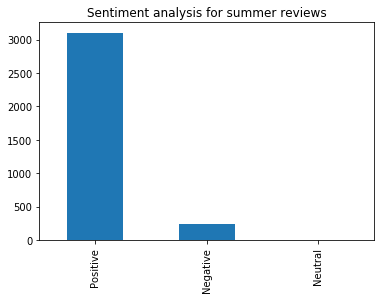

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
summer_data.sentiment.value_counts().plot(kind='bar', title="Sentiment analysis for summer reviews")

In [25]:
print("Number of Positive reviews: {}, which is: {}".format(sum(summer_data['sentiment']=='Positive'),((sum(summer_data['sentiment']=='Positive')/3349)*100)))
print("Number of Negative reviews: {}, which is: {}".format(sum(summer_data['sentiment']=='Negative'),((sum(summer_data['sentiment']=='Negative')/3349)*100)))
print("Number of Neutral reviews: {}, which is: {}".format(sum(summer_data['sentiment']=='Neutral'),((sum(summer_data['sentiment']=='Neutral')/3349)*100)))

Number of Positive reviews: 3102, which is: 92.6246640788295
Number of Negative reviews: 242, which is: 7.226037623171096
Number of Neutral reviews: 5, which is: 0.1492982979994028


In [26]:
neg_rev_summer =  summer_data['sentiment'] == 'Negative'
neg_rev_summer = summer_data[neg_rev_summer]
neg_rev_summer.head(1)

,description,norm_tokens,dataPublished,month,year,polarity_score,sentiment
144,Kimo's is the epitome of a restaurant resting ...,"['kimo', ""'s"", 'epitom', 'restaur', 'rest', 'p...",2018-05-30,5,2018,-0.8947,Negative


In [27]:
#---------------------------------------------------------------------------

# Bi,Tri,Tetra,Penta-Grams on Summer Negatives of TS restaurants

In [28]:
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [29]:
reasons = neg_rev_summer['description'] 
reasons.head()

144    Kimo's is the epitome of a restaurant resting ...
178    Had our reservation at 7:45 waited for over an...
230    Surprised by the overall 4 star Yelp and Trip ...
315    We have been here 1 hour and 20 minutes and St...
329    We used to love this place until two years ago...
Name: description, dtype: object

In [30]:
# # Stopword removal  
# stop_words = set(stopwords.words('english')) 
# your_list = ['the','this','was'] 
# for i, line in enumerate(reasons): 
#     reasons[i] = ' '.join([x for 
#         x in nltk.word_tokenize(line) if 
#         ( x not in stop_words ) and ( x not in your_list )])

In [31]:
reasons.head()

144    Kimo's is the epitome of a restaurant resting ...
178    Had our reservation at 7:45 waited for over an...
230    Surprised by the overall 4 star Yelp and Trip ...
315    We have been here 1 hour and 20 minutes and St...
329    We used to love this place until two years ago...
Name: description, dtype: object

In [32]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(reasons)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) 
X2 = vectorizer.fit_transform(reasons) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



Words : 
               term      rank
9844      the food  3.919829
720        and the  3.693601
3583      food was  3.484574
5239        it was  3.148900
3708       for the  2.977324
4914        in the  2.824626
11791      we were  2.803852
6876        of the  2.621290
10356   this place  2.585670
10031  the service  2.452318
1843       but the  2.393185
8711   service was  2.351529
4252       had the  2.343948
9839      the fish  2.223214
7010        on the  2.178516
10644       to the  1.967405
10092     the view  1.955480
11732       we had  1.948249
1126        at the  1.863421
3536       food is  1.828065


In [34]:
# Getting Trigrams  
vectorizer = CountVectorizer(ngram_range =(3, 3)) 
X1 = vectorizer.fit_transform(reasons)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (3, 3)) 
X2 = vectorizer.fit_transform(reasons) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                   term      rank
13055     the food was  2.082674
13446  the service was  1.103613
13024   the fish tacos  0.996651
13105     the hula pie  0.981416
13040      the food is  0.962177
993       and the food  0.854779
2489      but the food  0.843778
6433         if you re  0.824023
15641     was good but  0.765270
14291       to die for  0.685910
4691       food was ok  0.667019
1588        at the bar  0.664222
14339       to get our  0.620401
14026    this place is  0.618886
13056    the food wasn  0.610961
794         and it was  0.603787
5666      had the fish  0.603489
13104   the hula grill  0.602635
4422    fish and chips  0.598800
4611      food is very  0.5862

In [35]:
# Getting Tetragrams  
vectorizer = CountVectorizer(ngram_range =(4, 4)) 
X1 = vectorizer.fit_transform(neg_rev_summer.description)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (4, 4)) 
X2 = vectorizer.fit_transform(neg_rev_summer.description) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                                  term      rank
13504                the food is very  0.586203
7109         is stupid expensive byoj  0.577350
7505        juice is stupid expensive  0.577350
10836             pog juice is stupid  0.577350
17625              will never go back  0.552186
1028                 and the food was  0.474916
11897        service and pork lettuce  0.447214
926            and pork lettuce wraps  0.447214
515          amazing service and pork  0.447214
3128   complaints amazing service and  0.447214
9034    no complaints amazing service  0.447214
13459              the fish and chips  0.434362
8859                  my wife had the  0.432672
17096             

In [36]:
vectorizer = CountVectorizer(ngram_range = (5,5)) 
X1 = vectorizer.fit_transform(neg_rev_summer.description)  
features = (vectorizer.get_feature_names()) 
print("\n\nFeatures : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (5,5)) 
X2 = vectorizer.fit_transform(neg_rev_summer.description) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
  
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words.head(20)) 



Features : 


 ['00 and all it came', '00 and food didn arrive', '00 and were treated the', '00 bad salesmanship when ordered', '00 dlls for two fish', '00 for two of us', '00 wine list was limited', '00p and the restaurant was', '05ish we got pretty nice', '10 15 for lunch shrimp', '10 15 minute wait when', '10 15 minutes for server', '10 before being sat at', '10 min for waters waited', '10 min to order 45', '10 minutes after already ordering', '10 minutes for anyone to', '10 minutes for drink orders', '10 minutes for someone to', '10 of us but ultimately', '10 our server was rude', '10 people she would not', '10 tip only which was', '10 years but someone should', '10 years ve been coming', '10k bottle of wine or', '12 00 and food didn', '12 95 which is pulled', '12 hrs this place was', '12 people not busy at', '13 then my husband was', '130 on lunch food was', '14 of course when the', '15 00 dlls for two', '15 20 ended up deciding', '15 95 and hubby the', '15 because the wait for', '15 dollars fo



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words head : 
                                             term      rank
10771              pog juice is stupid expensive  0.707107
7452              juice is stupid expensive byoj  0.707107
3105         complaints amazing service and pork  0.500000
11822             service and pork lettuce wraps  0.500000
509             amazing service and pork lettuce  0.500000
8979           no complaints amazing service and  0.500000
5847                     had the spicy tuna last  0.408248
15400                     tuna last week and was  0.408248
13956                   the spicy tuna last week  0.408248
17072                 week and was violently ill  0.408248
7691                 last week and w

In [37]:
# Getting Pentagrams  
vectorizer = CountVectorizer(ngram_range =(5, 5)) 
X1 = vectorizer.fit_transform(neg_rev_summer.description)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (5, 5)) 
X2 = vectorizer.fit_transform(neg_rev_summer.description) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                                             term      rank
10771              pog juice is stupid expensive  0.707107
7452              juice is stupid expensive byoj  0.707107
3105         complaints amazing service and pork  0.500000
11822             service and pork lettuce wraps  0.500000
509             amazing service and pork lettuce  0.500000
8979           no complaints amazing service and  0.500000
5847                     had the spicy tuna last  0.408248
15400                     tuna last week and was  0.408248
13956                   the spicy tuna last week  0.408248
17072                 week and was violently ill  0.408248
7691                 last week and was vi

In [38]:
print("Number of negative reviews : {}".format(len(neg_rev_summer)))
print(neg_rev_summer.description.iloc[0])
# print(neg_rev_summer.description.iloc[1])
# print(neg_rev_summer.description.iloc[2])
# print(neg_rev_summer.description.iloc[3])
# print(neg_rev_summer.description.iloc[4])

Number of negative reviews : 242
Kimo's is the epitome of a restaurant resting on its past laurels and taking its clientele for granted. 
Their happy hour is anything but happy. Only 3 cocktails on special - all vodka based and NO Mai Tai? WTH? also 1 each wine and beer... Bait and switch...only things on special no one wants. 
And, they served my hubs a rotten slice of pineapple in his overpriced Mai Tai...gross 
The place is just dirty. 
High end - not much, just say'in. 
Waste of .


# WordCloud on TS restaurants summer negatives

In [39]:
reasons = neg_rev_summer['description'] 
reasons.head()

144    Kimo's is the epitome of a restaurant resting ...
178    Had our reservation at 7:45 waited for over an...
230    Surprised by the overall 4 star Yelp and Trip ...
315    We have been here 1 hour and 20 minutes and St...
329    We used to love this place until two years ago...
Name: description, dtype: object

In [40]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

l_data = str(reasons)
#l_data
list = [l_data]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

["144 Kimo epitome restaurant resting ... 178 Had reservation 7:45 waited ... 230 Surprised overall star Yelp Trip ... 315 hour minute ... 329 used love place two year ago ... 351 Horrible condescending server incr ... 352 This one restaurant killer ... 537 The food good although order cam ... 593 Great view decent drink terrible service ... 779 Superlatively mediocre 'Murican food ... 920 Not favorite meal kind bland salad ... 921 Prices high Wait time suck Food ... 934 Last night pork wrapped lettuce ... 938 When visiting Maui especially Lahaina town ... 957 Waitstaff bit disorganized ... 976 Was surprisingly whelmed experi ... 983 The food bland got Ono kimo ... 990 came lunch ordered calamari ... 1014 Poor service This place n't Eat ... 1095 Two star seems harsh meh 've experienc ... 1165 Pros \\n-View amazing Right water ... 1186 must stop Maui Dont mind ... 1283 Just ok. try upstairs restauran ... 1394 Food adequate wait staff avera ... 1398 What disappointment Maui least ... 149

In [41]:
token = word_tokenize(l_data)
from nltk import FreqDist
freqd = FreqDist(token)
freqd.items()
import operator
sorted_freq = sorted(freqd.items(), key=operator.itemgetter(1))
sorted_freq
# converting into dictionary 
def listtodict(A, di): 
   di = dict(A) 
   return di 

# Driver Code  
A = sorted_freq 
di = {} 
print ("The Dictionary Is ::>",listtodict(A, di)) 

The Dictionary Is ::> {'144': 1, 'Kimo': 1, 'epitome': 1, 'resting': 1, '178': 1, 'Had': 1, 'reservation': 1, '7:45': 1, 'waited': 1, '230': 1, 'Surprised': 1, 'by': 1, 'overall': 1, '4': 1, 'Yelp': 1, 'Trip': 1, '315': 1, 'been': 1, '1': 1, 'hour': 1, '20': 1, 'minutes': 1, 'St': 1, '329': 1, 'used': 1, 'love': 1, 'until': 1, 'two': 1, 'years': 1, 'ago': 1, '351': 1, 'condescending': 1, 'server': 1, 'who': 1, 'incr': 1, '352': 1, 'those': 1, 'restaurants': 1, 'killer': 1, '537': 1, 'although': 1, 'order': 1, 'cam': 1, '593': 1, 'drinks': 1, '779': 1, 'Superlatively': 1, 'mediocre': 1, "'Murican": 1, '920': 1, 'my': 1, 'favorite': 1, 'meal': 1, 'kind': 1, 'salad': 1, '921': 1, 'Prices': 1, 'high': 1, 'time': 1, 'sucks': 1, 'ch': 1, '934': 1, 'Last': 1, 'night': 1, 'pork': 1, 'wrapped': 1, 'lettuce': 1, 'f': 1, '938': 1, 'When': 1, 'visiting': 1, 'especially': 1, 'town': 1, 'yo': 1, '957': 1, 'Waitstaff': 1, 'bit': 1, 'disorganized': 1, 'as': 1, '976': 1, 'Was': 1, 'surprisingly': 1, 'u

In [42]:
dict_data = {'144': 1, 'Kimo': 1, 'epitome': 1, 'resting': 1, '178': 1, 'Had': 1, 'reservation': 1, '7:45': 1, 'waited': 1, '230': 1, 'Surprised': 1, 'by': 1, 'overall': 1, '4': 1, 'Yelp': 1, 'Trip': 1, '315': 1, 'been': 1, '1': 1, 'hour': 1, '20': 1, 'minutes': 1, 'St': 1, '329': 1, 'used': 1, 'love': 1, 'until': 1, 'two': 1, 'years': 1, 'ago': 1, '351': 1, 'condescending': 1, 'server': 1, 'who': 1, 'incr': 1, '352': 1, 'those': 1, 'restaurants': 1, 'killer': 1, '537': 1, 'although': 1, 'order': 1, 'cam': 1, '593': 1, 'drinks': 1, '779': 1, 'Superlatively': 1, 'mediocre': 1, "'Murican": 1, '920': 1, 'my': 1, 'favorite': 1, 'meal': 1, 'kind': 1, 'salad': 1, '921': 1, 'Prices': 1, 'high': 1, 'time': 1, 'sucks': 1, 'ch': 1, '934': 1, 'Last': 1, 'night': 1, 'pork': 1, 'wrapped': 1, 'lettuce': 1, 'f': 1, '938': 1, 'When': 1, 'visiting': 1, 'especially': 1, 'town': 1, 'yo': 1, '957': 1, 'Waitstaff': 1, 'bit': 1, 'disorganized': 1, 'as': 1, '976': 1, 'Was': 1, 'surprisingly': 1, 'under': 1, 'whelmed': 1, 'experi': 1, '983': 1, 'got': 1, 'Ono': 1, 'kimo': 1, 'st': 1, '990': 1, 'ordered': 1, 'calamari': 1, '1014': 1, 'Poor': 1, "n't": 1, 'same': 1, 'Eat': 1, 's': 1, '1095': 1, 'Two': 1, 'stars': 1, 'seems': 1, 'harsh': 1, 'meh': 1, "'ve": 1, 'experienc': 1, '1165': 1, 'Pros': 1, '\\n-View': 1, '\\': 1, '1186': 1, 'A': 1, 'must': 1, 'stop': 1, 'if': 1, 'you': 1, 'Dont': 1, 'mind': 1, '1283': 1, 'Just': 1, 'ok.': 1, 'did': 1, 'try': 1, 'upstairs': 1, 'restauran': 1, '1394': 1, 'adequate': 1, 'wait': 1, 'above': 1, 'avera': 1, '1398': 1, 'least': 1, 'o': 1, '1490': 1, 'wife': 1, 'during': 1, 'vacation.\\n': 1, '1525': 1, 'Disappointed': 1, 'stopped': 1, 'prior': 1, 'vis': 1, '1582': 1, 'Very': 1, 'Fish': 1, 'cooked': 1, '1588': 1, 'confusing': 1, 'menu': 1, '1591': 1, 'Went': 1, 'upon': 1, 'arrival': 1, '64908': 1, 'hotel': 1, 'America': 1, '64912': 1, 'Good': 1, 'breakfast': 1, '.ha': 1, '64914': 1, 'They': 1, 'service..': 1, '64921': 1, 'there': 1, 'brunch': 1, 'ok': 1, 'gre': 1, '64936': 1, 'It': 1, 'near': 1, '64941': 1, 'die': 1, '65079': 1, '12': 1, '65087': 1, 'waste': 1, 'money': 1, 'l': 1, '65095': 1, 'eat': 1, 'Started': 1, 'Carpaccio': 1, '65097': 1, 'gave': 1, 'it': 1, 'only': 1, 'because': 1, 'setti': 1, '65130': 1, 'Waikiki': 1, 'think': 1, 'pla': 1, '65140': 1, 'Despite': 1, 'gorgeous': 1, 'locations': 1, 'indoor/outd': 1, '65266': 1, 'bartend': 1, '65273': 1, 'POG': 1, 'juice': 1, 'stupid': 1, 'expensive': 1, 'BYOJ': 1, '65359': 1, 'pathetic': 1, 'once': 1, '65373': 1, 'You': 1, 'pay': 1, 'more': 1, 'than': 1, 'or': 1, '65381': 1, 'Made': 1, 'reservations': 1, 'still': 1, 'given': 1, "'buzze": 1, '65383': 1, 'experience': 1, 'First': 1, 'group': 1, 'res': 1, '65385': 1, "'m": 1, 'huge': 1, 'fan': 1, 'Beach': 1, 'House': 1, '65466': 1, 'Appetizers': 1, 'snacks': 1, 'way': 1, 'Meals': 1, 'ar': 1, '65467': 1, 'Nothing': 1, 'special': 1, '``': 1, 'mass': 1, 'produced': 1, "''": 1, 'tas': 1, '65468': 1, 'Nasty': 1, 'rib/': 1, 'chicken': 1, 'combo': 1, 'pl': 1, '65475': 1, 'Sorry': 1, 'say': 1, 'Maybe': 1, '65480': 1, 'Hard': 1, 'Rock': 1, '65484': 1, '2.5': 1, 'foodwise': 1, "'ll": 1, 'bump': 1, "'em": 1, 'up': 1, '65487': 1, 'Average': 1, 'Nice': 1, 'setting': 1, 'Would': 1, '65490': 1, 'Their': 1, 'ambiance': 1, '65491': 1, 'loud': 1, 'fi': 1, '65494': 1, 'Beautiful': 1, 'v': 1, '65557': 1, 'Being': 1, 'new': 1, 'some': 1, 'management': 1, 'issues': 1, 'mos': 1, 'Name': 1, 'description': 1, 'Length': 1, '242': 1, 'dtype': 1, 'object': 1, 'restaurant': 2, 'at': 2, 'over': 2, 'an': 2, 'Horrible': 2, 'This': 2, 'one': 2, 'view': 2, 'decent': 2, 'terrible': 2, 't': 2, 'Not': 2, 'Wait': 2, 'Lahaina': 2, 'they': 2, 'came': 2, 'lunch': 2, 'amazing': 2, 'Right': 2, 'staff': 2, 'What': 2, 'go': 2, 'My': 2, 'disappointed': 2, 'Overpriced': 2, 'Service': 2, 'get': 2, '(': 2, 'Terrible': 2, 'huli': 2, 'Really': 2, 'Atmosphere': 2, 'star': 3, 'have': 3, 'this': 3, 'place': 3, 'with': 3, 'very': 3, 'had': 3, 'bland': 3, 'are': 3, 'were': 3, 'on': 3, 'water': 3, 'disappointment': 3, 'we': 3, 'location': 3, 'Duke': 3, "'s": 4, 'here': 4, 'service': 4, 'Maui': 4, 'our': 5, 'Food': 5, ':': 5, 'not': 5, 'The': 6, 'but': 6, 'of': 7, 'for': 8, 'to': 8, 'I': 8, 'in': 8, 'food': 9, 'We': 11, 'was': 12, ',': 14, '!': 14, 'is': 15, 'a': 15, 'the': 17, 'and': 17, '.': 22, '...': 62}

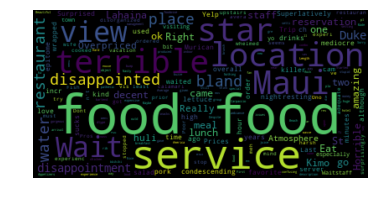

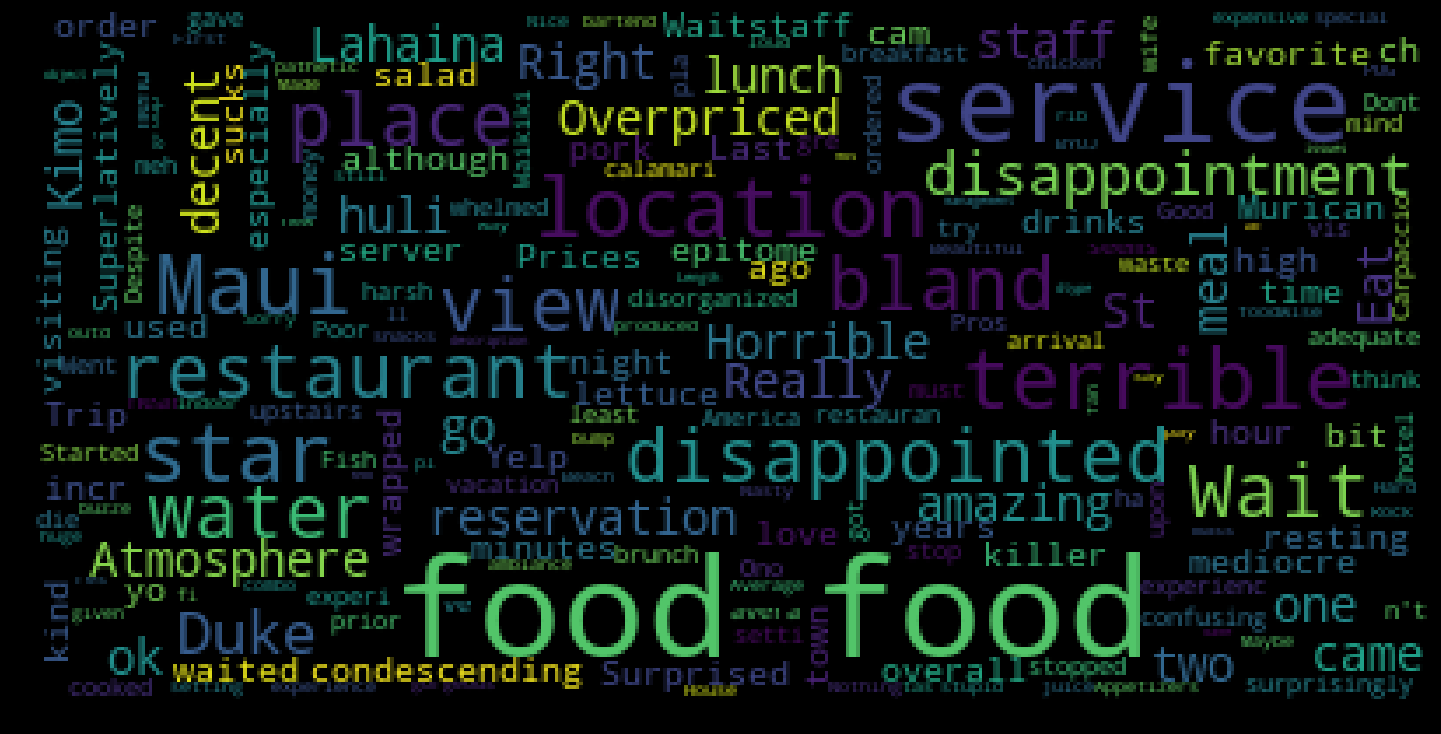

In [43]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
word_freq = dict_data
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Topic Modelling

# TS Summer Negatives

In [44]:
vectorizer = TfidfVectorizer(stop_words='english')

In [45]:
neg_rev_summer['description'].head()

144    Kimo's is the epitome of a restaurant resting ...
178    Had our reservation at 7:45 waited for over an...
230    Surprised by the overall 4 star Yelp and Trip ...
315    We have been here 1 hour and 20 minutes and St...
329    We used to love this place until two years ago...
Name: description, dtype: object

In [46]:
X_ts_s_n = vectorizer.fit_transform(neg_rev_summer['description'])
topics = 10
from sklearn.decomposition import NMF
nmf = NMF(n_components=topics,
         random_state=2017,
         alpha=.1,
         l1_ratio=.5)
nmf.fit(X_ts_s_n)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=10, random_state=2017, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [47]:
feature_names = np.array(vectorizer.get_feature_names())
feature_names

array(['00', '00p', '05ish', ..., 'yup', 'zero', 'zone'], dtype='<U34')

In [61]:

for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic #0:
great decent wasn amazing impressed setting carbonara food reviews beat
Topic #1:
food service table time wait minutes just place drinks didn
Topic #2:
fish tacos wife overpriced portions cooked food overcooked staff turned
Topic #3:
horrible rude unaccommodating condescending incredibly tasteless management run server hostess
Topic #4:
hula grill pie overall sidewalk standard stick food meh forget
Topic #5:
good pricey crowded fine location pay food service spastic combination
Topic #6:
poor disappointed isn eat children hours times really experience place
Topic #7:
bland view favorite ono kind salad quality tourist food meal
Topic #8:
upstairs try did restaurant lower downstairs fact reason stars calamari
Topic #9:
breakfast heard word haven definitely tried mouth worth dinner good


In [62]:
nmf.transform
X_transformed = nmf.transform(X_ts_s_n)
X_transformed[50]

array([0.        , 0.09820046, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [63]:
def get_topic_for_document(doc):
    topic_probs = doc
    max_index = -1
    max_value = 0
    
    for ind, prob in enumerate(topic_probs):
         #print(ind, prob)
        if prob > max_value:
            max_value = prob
            max_index = ind
    return max_index

In [64]:
get_topic_for_document([0.        , 0.04801365, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00589124, 0.        ])

1

In [65]:
X_transformed = nmf.transform(X_ts_s_n)

X_topics = []
for x_transform in X_transformed:
#     print((x_transform))
    X_topics.append(get_topic_for_document(x_transform))
X_transformed.shape, len(X_topics)

((242, 10), 242)

In [66]:
# np.bincount(X_topics)

In [67]:
X_topics

[1,
 1,
 7,
 1,
 7,
 3,
 0,
 1,
 0,
 2,
 7,
 1,
 0,
 1,
 5,
 1,
 7,
 1,
 6,
 1,
 2,
 1,
 8,
 2,
 1,
 4,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 7,
 8,
 1,
 2,
 1,
 1,
 1,
 5,
 7,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 5,
 1,
 5,
 7,
 1,
 1,
 1,
 1,
 1,
 4,
 7,
 1,
 8,
 1,
 4,
 1,
 1,
 1,
 2,
 0,
 2,
 4,
 4,
 1,
 1,
 5,
 1,
 8,
 2,
 4,
 2,
 1,
 2,
 -1,
 5,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 0,
 5,
 0,
 6,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 6,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 4,
 3,
 2,
 1,
 1,
 1,
 7,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 4,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 9,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 9,
 9,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 9,
 7,
 4,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1]

In [68]:
from collections import Counter

recounted = Counter(X_topics)
recounted

Counter({1: 143,
         7: 11,
         3: 3,
         0: 15,
         2: 31,
         5: 8,
         6: 4,
         8: 4,
         4: 16,
         -1: 2,
         9: 5})

# Topic #1: food service table time wait minutes just place drinks didn

## Since in summer most of the restaurants are with full of customers and the service time will take lot of time

# Negative Topics:
## food service table time 
## wait minutes

<BarContainer object of 11 artists>

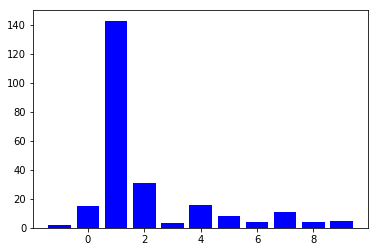

In [69]:
plt.bar(recounted.keys(), recounted.values(),color='b')

# -----------------------------------------------------------------------------------------------------------
# TS Restaurants Non Summer Negatives

# Bi,Tri,Tetra, Penta-Grams on Non Summer Negatives of TS Restaurants

In [ ]:
nonsummer_data = ts_df_1[~ts_df_1.month.isin(months)]
print(nonsummer_data.shape)
nonsummer_data.head()

In [ ]:
for sentences in nonsummer_data['description']:
    s = sentiment.polarity_scores(sentences)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]))
    print(sentences)

In [ ]:
nonsummer_data['polarity_score'] = nonsummer_data['description'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
# summer_data['neutral'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])
# summer_data['negative'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])
# summer_data['positive'] = summer_data['description'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])
nonsummer_data.head()

In [ ]:
nonsummer_data['sentiment']=''
nonsummer_data.head()

In [ ]:
nonsummer_data.loc[nonsummer_data.polarity_score>0,'sentiment']='Positive'
nonsummer_data.loc[nonsummer_data.polarity_score==0,'sentiment']='Neutral'
nonsummer_data.loc[nonsummer_data.polarity_score<0,'sentiment']='Negative'
nonsummer_data.head()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
nonsummer_data.sentiment.value_counts().plot(kind='bar', title="Sentiment analysis for non summer reviews")

In [ ]:
print("Number of Positive reviews: {}, which is: {}".format(sum(nonsummer_data['sentiment']=='Positive'),((sum(nonsummer_data['sentiment']=='Positive')/5748)*100)))
print("Number of Negative reviews: {}, which is: {}".format(sum(nonsummer_data['sentiment']=='Negative'),((sum(nonsummer_data['sentiment']=='Negative')/5748)*100)))
print("Number of Neutral reviews: {}, which is: {}".format(sum(nonsummer_data['sentiment']=='Neutral'),((sum(nonsummer_data['sentiment']=='Neutral')/5748)*100)))

# WordCloud on TS restaurants Non summer negatives

In [ ]:
neg_rev_nonsummer =  nonsummer_data['sentiment'] == 'Negative'
neg_rev_nonsummer = nonsummer_data[neg_rev_nonsummer]

In [ ]:
print("Number of negative reviews : {}".format(len(neg_rev_nonsummer)))
print(neg_rev_nonsummer.description.iloc[0])
# print(neg_rev_nonsummer.description.iloc[1])
# print(neg_rev_nonsummer.description.iloc[2])
# print(neg_rev_nonsummer.description.iloc[3])
# print(neg_rev_nonsummer.description.iloc[4])

In [ ]:
reasons = neg_rev_nonsummer['description'] 
reasons.head()

In [ ]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

l_data = str(reasons)
#l_data
list = [l_data]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

In [ ]:
token = word_tokenize(l_data)
from nltk import FreqDist
freqd = FreqDist(token)
freqd.items()
import operator
sorted_freq = sorted(freqd.items(), key=operator.itemgetter(1))
sorted_freq
# converting into dictionary 
def listtodict(A, di): 
   di = dict(A) 
   return di 

# Driver Code  
A = sorted_freq 
di = {} 
print ("The Dictionary Is ::>",listtodict(A, di)) 

In [ ]:
dict_data = {'7': 1, 'walking': 1, 'through': 1, 'downtown': 1, 'Lahaina': 1, 'w': 1, '17': 1, 'feel': 1, 'overpriced': 1, 'overr': 1, '23': 1, 'Simple': 1, 'decision': 1, 'bother': 1, '\\n\\nWe': 1, 'dined': 1, '41': 1, 'glass': 1, 'wine': 1, 'some': 1, 'app': 1, '43': 1, 'Look': 1, 'you': 1, 'ca': 1, 'ask': 1, 'your': 1, 'kitchen': 1, 'make': 1, '50': 1, 'makes': 1, 'me': 1, 'write': 1, 'because': 1, 'wante': 1, '103': 1, 'As': 1, 'group': 1, 'restaur': 1, '129': 1, 'Highly': 1, 'overrated': 1, 'area': 1, 'g': 1, '162': 1, 'Bad': 1, 'Everyone': 1, 'rushed': 1, 'restau': 1, '181': 1, 'least': 1, 'meal': 1, 'island': 1, '220': 1, 'special': 1, 'sta': 1, '261': 1, 'honestly': 1, 'Even': 1, 'kid': 1, '263': 1, 'Waiter': 1, 'knowledgeable': 1, '282': 1, 'What': 1, 'extremely': 1, 'disappointing': 1, 'experience': 1, 'Ca': 1, '327': 1, 'Very': 1, '336': 1, 'coming': 1, 'he': 1, '358': 1, 'wait': 1, '.waited': 1, '45': 1, 'mins': 1, '6': 1, '436': 1, 'last': 1, 'time': 1, 'went': 1, 'Kim': 1, '472': 1, 'made': 1, 'reservation': 1, '5:30': 1, 'PM': 1, '547': 1, 'would': 1, 'give': 1, 'them': 1, 'zero': 1, 'stars': 1, 'could': 1, 'ma': 1, '571': 1, 'Kimos': 1, 'still': 1, 'winner': 1, 'after': 1, '20': 1, 'goin': 1, '591': 1, 'kind': 1, 'gimmicky': 1, '5': 1, 'star': 1, '623': 1, 'Avoid': 1, 'plague': 1, 'Tourist': 1, 'trap': 1, 'high': 1, '629': 1, 'Was': 1, 'Hamburger': 1, '639': 1, 'veggie': 1, 'salad': 1, 'fish': 1, 'tacos': 1, 'killer': 1, 'h': 1, '640': 1, 'Disappointing': 1, 'server': 1, 'personable': 1, 'bu': 1, '664': 1, '744': 1, 'came': 1, 'hangry': 1, 'halloween': 1, '798': 1, 'U': 1, 'absolutely': 1, 'gross': 1, 'impressive': 1, '811': 1, 'hardest': 1, 'thing': 1, 'do': 1, 'critique': 1, '64960': 1, 'our': 1, 'first': 1, 'night': 1, 'i': 1, 'new': 1, 'york\\nstr': 1, '64969': 1, 'want': 1, 'dukes': 1, 'Seriously': 1, '64985': 1, 'Christmas': 1, 'Eve': 1, 'pork': 1, 'shank': 1, '65017': 1, 'Ambiance': 1, 'Anniversary': 1, '65024': 1, 'returned': 1, 'three': 1, 'times': 1, 'si': 1, '65029': 1, 'son': 1, 'POG': 1, 'while': 1, 'pool': 1, '65034': 1, 'drinking': 1, 'koolaid': 1, 'one': 1, 'Duri': 1, '65048': 1, 'menu': 1, '65053': 1, 'Definitely': 1, 'defines': 1, '65068': 1, 'okay': 1, 'as': 1, 'fan': 1, '65071': 1, 'T': 1, '65147': 1, 'Such': 1, 'waste': 1, 'money': 1, 'Boring': 1, 'dri': 1, '65152': 1, 'HORRIBLE': 1, 'from': 1, 'hostess': 1, '65156': 1, 'Close': 1, '65163': 1, 'Our': 1, 'Kauai': 1, 'Malibu': 1, 'Hun': 1, '65167': 1, 'One': 1, 'main': 1, 'things': 1, 'going': 1, '65178': 1, 'sitting': 1, 'waiting': 1, 'l': 1, '65210': 1, 'travel': 1, 'alone': 1, 'often': 1, 'walk': 1, '65218': 1, 'am': 1, 'eight': 1, 'year': 1, 'resident': 1, 'home': 1, '65309': 1, 'Staying': 1, 'Honua': 1, 'Kai': 1, 'Resort': 1, 'visit': 1, 'D': 1, '65310': 1, 'Location': 1, 'right': 1, 'by': 1, 'fab': 1, '65329': 1, 'Dear': 1, 'Manager': 1, '\\nFor': 1, 'better': 1, 'overall': 1, 'd': 1, '65345': 1, 'no': 1, 'comparison': 1, 'Wa': 1, '65402': 1, 'Over-rated': 1, '\\n\\nCame': 1, 'during': 1, 'their': 1, 'Aloha': 1, 'Ho': 1, '65451': 1, 'Worst': 1, 'along': 1, 'time\\n\\nFood': 1, '65501': 1, 'Although': 1, 'located': 1, 'setting': 1, 'Ka': 1, "'": 1, '65507': 1, 'Had': 1, 'A': 1, '65527': 1, 'recently': 1, 'stayed': 1, 'honua': 1, 'kai': 1, 'resort': 1, '65538': 1, 'ate': 1, 'breakfast': 1, '65565': 1, 'Go': 1, 'drink': 1, 'out': 1, 'view': 1, 'Name': 1, 'description': 1, 'Length': 1, '413': 1, 'dtype': 1, 'object': 1, 'Do': 2, 'stopped': 2, 'if': 2, 'It': 2, 'sad': 2, 'all': 2, 'nothing': 2, 'did': 2, 'an': 2, 'prime': 2, 'rib': 2, 'been': 2, 'years': 2, 'terrible': 2, 'very': 2, 'we': 2, 'lunch': 2, 'th': 2, 'location': 2, 's': 2, 'where': 2, 'has': 2, 'venue': 2, 'b': 2, '-': 3, 'with': 3, 'restaurant': 3, 'but': 3, 'about': 3, 'dinner': 3, 'had': 3, 'have': 3, 'here': 3, 'ordered': 3, 'beach': 3, 'Duke': 3, "'m": 3, 'Dukes': 3, 'Maui': 3, ':': 3, 'were': 4, 'service': 4, 'This': 4, 'my': 4, 'food': 4, 'it': 4, 'this': 5, "n't": 5, "'s": 5, 'place': 9}

In [ ]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
word_freq = dict_data
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Topic Modelling

# TS Non Summer Negatives

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
neg_rev_nonsummer['description'].head()

In [ ]:
X_ts_ns_n = vectorizer.fit_transform(neg_rev_nonsummer['description'])
topics = 10
from sklearn.decomposition import NMF
nmf = NMF(n_components=topics,
         random_state=2017,
         alpha=.1,
         l1_ratio=.5)
nmf.fit(X_ts_ns_n)

In [ ]:
feature_names = np.array(vectorizer.get_feature_names())
feature_names

In [ ]:
for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

In [ ]:
nmf.transform
X_transformed = nmf.transform(X_ts_ns_n)
X_transformed[50]

In [ ]:
get_topic_for_document([1.18770449e-02, 0.00000000e+00, 3.98344691e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.62193584e-02, 6.01420224e-02,
       0.00000000e+00, 4.07932567e-01])

In [ ]:
X_transformed = nmf.transform(X_ts_ns_n)

X_topics = []
for x_transform in X_transformed:
#     print((x_transform))
    X_topics.append(get_topic_for_document(x_transform))
X_transformed.shape, len(X_topics)

In [ ]:
# np.bincount(X_topics)

In [ ]:
X_topics

In [ ]:
len(X_topics)

In [ ]:
from collections import Counter

recounted = Counter(X_topics)
recounted

In [ ]:
plt.bar(recounted.keys(), recounted.values(),color='b')

# Topic #0: food service just place like great didn ordered good came

# WordCloud for TOPIC : 0 to find the most discussed words

In [ ]:
print(neg_rev_nonsummer.shape)
neg_rev_nonsummer.head()

### Created a new column "Topic" for assigning each review to a particular topic

In [ ]:
neg_rev_nonsummer['Topic']=''
neg_rev_nonsummer.head()

In [ ]:
neg_rev_nonsummer['Topic']= X_topics
neg_rev_nonsummer.head()

In [ ]:
neg_rev_nonsummer['Topic'].dtype

In [ ]:
neg_rev_nonsummer_topic_zero =  neg_rev_nonsummer['Topic'] == 0
neg_rev_nonsummer_topic_zero = neg_rev_nonsummer[neg_rev_nonsummer_topic_zero]
print(neg_rev_nonsummer_topic_zero.shape)
neg_rev_nonsummer_topic_zero.head()

In [ ]:
reasons = neg_rev_nonsummer_topic_zero['description'] 
reasons.head()

In [ ]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

l_data = str(reasons)
#l_data
list = [l_data]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

In [ ]:
token = word_tokenize(l_data)
from nltk import FreqDist
freqd = FreqDist(token)
freqd.items()
import operator
sorted_freq = sorted(freqd.items(), key=operator.itemgetter(1))
sorted_freq
# converting into dictionary 
def listtodict(A, di): 
   di = dict(A) 
   return di 

# Driver Code  
A = sorted_freq 
di = {} 
print ("The Dictionary Is ::>",listtodict(A, di)) 

In [ ]:
dict_data = {'50': 1, 'makes': 1, 'me': 1, 'write': 1, 'because': 1, 'wante': 1, '261': 1, 'honestly': 1, 'did': 1, 'Even': 1, 'kid': 1, '263': 1, 'Waiter': 1, 'knowledgeable': 1, '282': 1, 'What': 1, 'extremely': 1, 'disappointing': 1, 'experience': 1, 'Ca': 1, '336': 1, 'coming': 1, 'he': 1, '436': 1, 'very': 1, 'last': 1, 'time': 1, 'Kim': 1, '571': 1, 'still': 1, 'winner': 1, '20': 1, 'goin': 1, '591': 1, 'gimmicky': 1, 'star': 1, '640': 1, 'Disappointing': 1, 'server': 1, 'personable': 1, 'bu': 1, '798': 1, 'U': 1, 'absolutely': 1, 'gross': 1, 'nothing': 1, 'impressive': 1, '811': 1, 'hardest': 1, 'thing': 1, 'do': 1, 'critique': 1, '832': 1, 'such': 1, 'high': 1, 'hopes': 1, '&': 1, '840': 1, 'dining': 1, 'Kimo': 1, 'November': 1, 'vac': 1, '863': 1, 'A+': 1, '\\n\\nTheir': 1, 'Cioppino': 1, 'point': 1, 'Only': 1, 'down': 1, '916': 1, 'Killer': 1, 'view..': 1, 'ca': 1, 'complain': 1, '937': 1, 'Sadly': 1, 'visited': 1, 'Feb': 1, 't': 1, '1142': 1, 'within': 1, 'hour': 1, '1232': 1, 'best': 1, 'bartenders': 1, '1239': 1, 'Updating': 1, 'review': 1, 'second': 1, 'trip': 1, 'back': 1, '1272': 1, 'bit': 1, 'disappointed': 1, 'When': 1, 'wer': 1, '1307': 1, 'Great': 1, 'side': 1, 'location.\\n': 1, 'Advice-': 1, 'Offer': 1, '1326': 1, 'ok.': 1, 'so': 1, 'waitress': 1, '1353': 1, 'least': 1, 'hand': 1, 'full': 1, '1357': 1, 'Poor': 1, 'regulars': 1, 'until': 1, 'yesterda': 1, '1381': 1, 'Gorgeous': 1, 'views': 1, 'your': 1, 'patio': 1, 'ta': 1, '1410': 1, 'Lost': 1, 'touch': 1, 'always': 1, 'loved': 1, '1610': 1, 'now': 1, '1638': 1, 'Small': 1, 'overpriced': 1, 'You': 1, 'pay': 1, 'vi': 1, '1699': 1, 'agree': 1, 'Joe': 1, 'E.': 1, '\\n\\nWe': 1, 'stopped': 1, '1726': 1, '4': 1, '64800': 1, 'Our': 1, 'waiter': 1, 'running': 1, 'credit': 1, 'card': 1, 'scam': 1, 'Aft': 1, '64815': 1, 'husband': 1, 'today': 1, '64822': 1, 'Bar': 1, 'Way': 1, 'understaffed': 1, '64827': 1, 'Update-': 1, 'tonight': 1, 'seated': 1, '64839': 1, 'Rude': 1, '.check\\nOverpriced': 1, 'drinks': 1, '.check\\': 1, '64860': 1, 'ok': 1, 'order': 1, '3': 1, 'rounds': 1, 'which': 1, 'w': 1, '64956': 1, 'minor': 1, 'issue': 1, 'get': 1, 'bec': 1, '64960': 1, 'first': 1, 'night': 1, 'i': 1, 'new': 1, 'york\\nstr': 1, '64969': 1, 'want': 1, 'dukes': 1, 'Seriously': 1, 'location': 1, '65017': 1, 'Ambiance': 1, 'Anniversary': 1, '65029': 1, 'son': 1, 'POG': 1, 'pool': 1, '65034': 1, 'drinking': 1, 'koolaid': 1, 'one': 1, 'Duri': 1, '65048': 1, 'all': 1, '65068': 1, 'okay': 1, 'as': 1, 'fan': 1, '65071': 1, 'Enjoyable': 1, 'T': 1, '65147': 1, 'Such': 1, 'waste': 1, 'money': 1, 'Boring': 1, 'dri': 1, '65152': 1, 'Decent': 1, 'HORRIBLE': 1, '65156': 1, 'perfect': 1, 'Close': 1, 'b': 1, '65167': 1, 'main': 1, 'things': 1, 'going': 1, '65178': 1, 'waiting': 1, 'l': 1, '65210': 1, 'travel': 1, 'often': 1, 'walk': 1, '65218': 1, 'am': 1, 'eight': 1, 'year': 1, 'resident': 1, 'home': 1, '65309': 1, 'Staying': 1, 'Honua': 1, 'Kai': 1, 'Resort': 1, 'had': 1, 'visit': 1, 'D': 1, '65310': 1, 'Location': 1, 'fab': 1, '65329': 1, 'Dear': 1, 'Manager': 1, '\\nFor': 1, 'better': 1, 'overall': 1, 'd': 1, '65345': 1, 'no': 1, 'comparison': 1, 'Wa': 1, '65501': 1, 'Although': 1, 'located': 1, 'beautiful': 1, 'setting': 1, 'Ka': 1, "'": 1, '65527': 1, 'recently': 1, 'stayed': 1, 'honua': 1, 'kai': 1, 'resort': 1, 'where': 1, '65538': 1, 'ate': 1, '65565': 1, 'Go': 1, 'out': 1, '-': 1, 'Do': 1, 'Name': 1, 'description': 1, 'Length': 1, '241': 1, 'dtype': 1, 'object': 1, 'It': 2, 'sad': 2, 'like': 2, 'my': 2, 'years': 2, 'went': 2, 'Kimos': 2, 'after': 2, 'kind': 2, '5': 2, 'Had': 2, 'while': 2, 'that': 2, 'Absolutely': 2, 'One': 2, 'came': 2, 'ocean': 2, 'Food': 2, 'our': 2, 'from': 2, 'sitting': 2, 'restaurant': 2, 'right': 2, 'menu': 2, 'with': 2, 'by': 2, 'view': 2, 'alone': 2, 'stars': 2, 'breakfast': 2, 'hostess': 2, 'but': 2, 'drink': 2, 'ordered': 2, 'great': 2, 'beach': 2, 'has': 2, 'venue': 2, 'check': 2, 'wife': 2, '!': 3, 'about': 3, 'have': 3, 'been': 3, 'th': 3, 'terrible': 3, 's': 3, 'good': 3, 'Service': 3, 'dinner': 3, 'Duke': 3, 'Dukes': 3, 'Maui': 3, ':': 3, "n't": 4, 'food': 4, 'it': 4, 'an': 4, 'here': 4, 'were': 4, 'we': 4, 'This': 4, 'service': 4, 'My': 4, 'this': 5, "'m": 5, 'The': 6, "'s": 6, 'on': 6, 'not': 7, 'We': 7, 'for': 7, 'place': 7, 'in': 7, 'and': 7, 'at': 8, 'is': 11, 'was': 12, 'of': 12, 'I': 13, 'to': 15, ',': 15, 'the': 17, 'a': 20, '.': 23, '...': 63}

In [ ]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
word_freq = dict_data
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Above are the words that are most discussed in Non summers of negative reviews zeroth topic of topic modelling
## Terrible Location 
## Disappointed Venue
## Since Place Place is repeated may be Place is not good

In [ ]:
neg_rev_nonsummer.description.head()

In [ ]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(4, 4)) 
X1 = vectorizer.fit_transform(neg_rev_nonsummer.description)  
features = (vectorizer.get_feature_names()) 
#print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (4, 4)) 
X2 = vectorizer.fit_transform(neg_rev_nonsummer.description) 
scores = (X2.toarray()) 
#print("\n\nScores : \n", scores) 

# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))

In [ ]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(5, 5)) 
X1 = vectorizer.fit_transform(neg_rev_nonsummer.description)  
features = (vectorizer.get_feature_names()) 
#print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (5, 5)) 
X2 = vectorizer.fit_transform(neg_rev_nonsummer.description) 
scores = (X2.toarray()) 
#print("\n\nScores : \n", scores) 

# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(20))